In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA/New_HR_dataset.csv')
df.head(3)

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   

   PerformanceScore  EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0           Exceeds              4.60               5                    0   
1       Fully Meets              4.96               3                    6   
2       Fully Meets              3.02               3                    0   

   LastPerformanceReview_Date DaysLateLast30 Absences Age   WD  \
0                   1/17/2019              0        1  40    0   
1                   2/24/2016              0       17  48  444   
2                   5/15/2012              0        3  35  447   

  LastAssessedDate  
0                0  
1              113  
2              132  

[3 rows x 39 columns]

In [3]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'Age', 'WD', 'LastAssessedDate'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [6]:
df['EmploymentStatus'].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [48]:
# 직원
working = df['EmploymentStatus'] == 'Active'
# 자발적 퇴사자
volutarily_termed = df['EmploymentStatus'] == 'Voluntarily Terminated'
# 비자발적 퇴사자
terminated = df['EmploymentStatus'] == 'Terminated for Cause'

In [21]:
from scipy.stats import pearsonr, f_oneway, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols

def statistic_analysis(df):
  # 상관분석
  correlation, p_value = pearsonr(df['PerformanceScoreNumeric'], df['EmpSatisfaction'])
  print('Pearson Correlation:', correlation)
  print('P-value:', p_value)

  # 회귀 분석
  model = ols('EmpSatisfaction ~ C(PerformanceScoreNumeric)', data=df).fit()
  print(model.summary())

  # ANOVA 테스트
  anova_results = sm.stats.anova_lm(model, typ=2)
  print(anova_results)

  # Kruskal-Wallis 테스트
  kruskal_results = kruskal(*[group['EmpSatisfaction'].values for name, group in df.groupby('PerformanceScoreNumeric')])
  print(kruskal_results)

# 1. 직원 만족도와 성과 간의 관계


## 1-1 가설 : 직원 만족도가 높을수록 성과점수도 높을 것이다.

In [8]:
df['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [18]:
performance_grouped = df.groupby(['PerformanceScore','EmploymentStatus'])['EmpSatisfaction'].mean().reset_index()
print(performance_grouped)

     PerformanceScore        EmploymentStatus  EmpSatisfaction
0             Exceeds                  Active         4.034483
1             Exceeds    Terminated for Cause         5.000000
2             Exceeds  Voluntarily Terminated         4.285714
3         Fully Meets                  Active         3.962963
4         Fully Meets    Terminated for Cause         3.875000
5         Fully Meets  Voluntarily Terminated         3.931507
6   Needs Improvement                  Active         3.500000
7   Needs Improvement    Terminated for Cause         3.600000
8   Needs Improvement  Voluntarily Terminated         3.800000
9                 PIP                  Active         2.375000
10                PIP    Terminated for Cause         3.500000
11                PIP  Voluntarily Terminated         2.333333


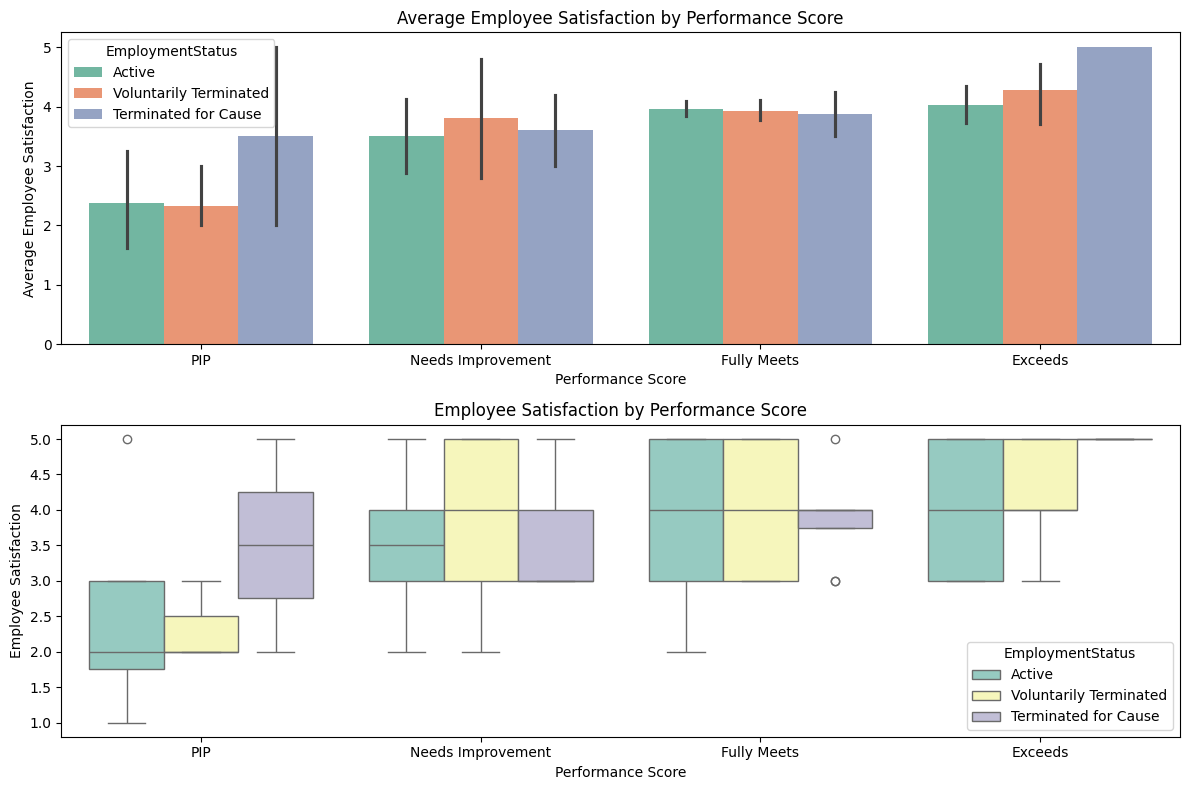

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

sns.barplot(x='PerformanceScore', y='EmpSatisfaction', hue='EmploymentStatus', data=df, order=['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds'], palette='Set2', ax=ax[0])
ax[0].set_title('Average Employee Satisfaction by Performance Score')
ax[0].set_xlabel('Performance Score')
ax[0].set_ylabel('Average Employee Satisfaction')

sns.boxplot(x='PerformanceScore', y='EmpSatisfaction', hue='EmploymentStatus', data=df, order=['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds'], palette='Set3', ax=ax[1])
ax[1].set_title('Employee Satisfaction by Performance Score')
ax[1].set_xlabel('Performance Score')
ax[1].set_ylabel('Employee Satisfaction')

plt.tight_layout()

plt.show()

- 직원만족도가 높을수록 평가점수가 좋은 것을 확인할 수 있다.
- 재징중인 직원들과 자발적 퇴사자들은 직원만족도가 높을수록 평가점수가 높은 것을 확인할 수 있는 반면
- 해고 당한 직원들은 성과점수와 상관없이 직원만족도가 높은 것을 확인할 수 있다. 이는 해고 당한 직원은 자발적 퇴사가 아니기에 이러한 결과를 보이는 것으로 해석된다.

## 1-2 통계검정
- H0(귀무가설) : 직원 만족도가 높다고 성과점수도 높은 것은 아니다.
- H1(대립가설) : 직원 만족도가 높을수록 성과점수도 높을 것이다.

In [24]:
performance_mapping = {'PIP': 1, 'Needs Improvement': 2, 'Fully Meets': 3, 'Exceeds': 4}
df['PerformanceScoreNumeric'] = df['PerformanceScore'].map(performance_mapping)

satisfaction_performance = df[['PerformanceScoreNumeric','EmpSatisfaction']]
statistic_analysis(satisfaction_performance)

Pearson Correlation: 0.29149294735319575
P-value: 1.6594087887056127e-07
                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     12.45
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.05e-07
Time:                        00:39:17   Log-Likelihood:                -393.34
No. Observations:                 311   AIC:                             794.7
Df Residuals:                     307   BIC:                             809.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

- 피어슨 상관계수 약 0.291로 성과점수와 직원만족도 간에 양의 상관관계가 있음
- p-value는, 유의수준(0.05)보다 작으므로 귀무가설 기각, 통계적으로 유의미하다.

\+ EmploymentStatus별로 만족도와 평가점수에 대한 통계성 검정

In [30]:
active = df[working][['PerformanceScoreNumeric','EmpSatisfaction']]
voluntary = df[volutarily_termed][['PerformanceScoreNumeric','EmpSatisfaction']]
fire = df[terminated][['PerformanceScoreNumeric','EmpSatisfaction']]

statistic_analysis(active)

Pearson Correlation: 0.2834465780843339
P-value: 3.49450146723723e-05
                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     8.977
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.30e-05
Time:                        00:53:13   Log-Likelihood:                -266.17
No. Observations:                 207   AIC:                             540.3
Df Residuals:                     203   BIC:                             553.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [32]:
statistic_analysis(voluntary)

Pearson Correlation: 0.32228721230628565
P-value: 0.002196844260890136
                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     4.298
Date:                Sun, 21 Jan 2024   Prob (F-statistic):            0.00716
Time:                        00:53:29   Log-Likelihood:                -104.63
No. Observations:                  88   AIC:                             217.3
Df Residuals:                      84   BIC:                             227.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [33]:
statistic_analysis(fire)

Pearson Correlation: 0.3138350877635542
P-value: 0.2365266677030689
                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.7045
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.567
Time:                        00:53:37   Log-Likelihood:                -19.390
No. Observations:                  16   AIC:                             46.78
Df Residuals:                      12   BIC:                             49.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 1-3 결론
"성과점수가 높을수록 직원 만족도가 높을 것이다"라는 가설은 데이터에 의해 지지된다. 성과점수가 높은 그룹은 낮은 그룹에 비해 직원 만족도가 더 높은 경향을 보이고, 이러한 차이는 통계적으로 유의미하다.  

하지만, 직원의 재직상태로 분리해서 통계성 검정을 진행했을 때, 재직자와 자발적 퇴사자의 경우 두 변수간의 유의미한 관계를 보이지만, 해고당한 직원의 경우 유의미한 관계를 보이지 않는다.  

이는 앞서 말했듯이 해고당한 직원들은 자신의 의사와 상관없이 통보받은 것으로 직원들의 만족도가 반영되지 않는 것으로 보인다.

## 1-4. 회사 만족도가 높은데도 불구하고 퇴사한 원인 분석
### 1-4-1 만족도별 퇴사한 직원 수

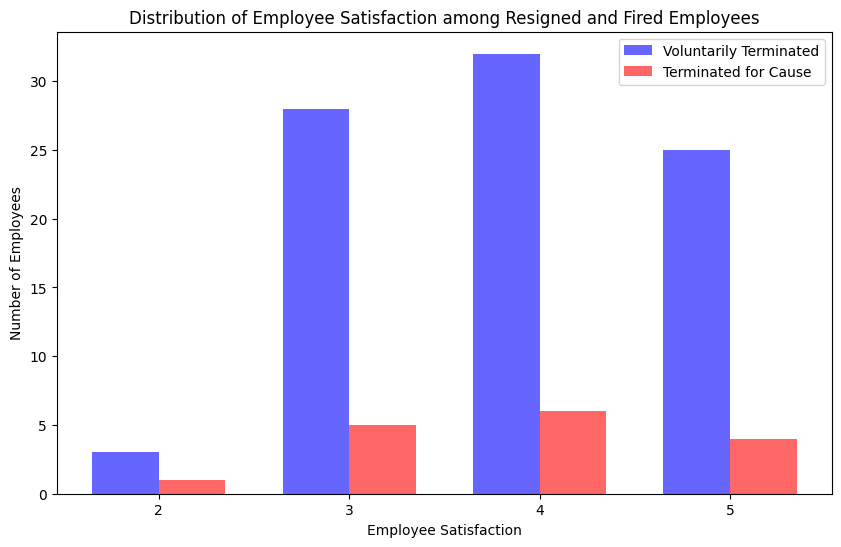

In [49]:
import numpy as np

voluntarily = df[volutarily_termed]
terminated = df[terminated]

resign_satisfaction = voluntarily['EmpSatisfaction'].value_counts().sort_index()
fire_satisfaction = terminated['EmpSatisfaction'].value_counts().sort_index()

x = np.arange(len(resign_satisfaction))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, resign_satisfaction, width=bar_width, label='Voluntarily Terminated', color='blue', alpha=0.6)
plt.bar(x + bar_width/2, fire_satisfaction, width=bar_width, label='Terminated for Cause', color='red', alpha=0.6)

plt.xlabel('Employee Satisfaction')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Satisfaction among Resigned and Fired Employees')
plt.xticks(x, resign_satisfaction.index)

plt.legend()
plt.show()

- 만족도가 높은데도 불구하고 퇴사하는 직원이 많다.

### 1-4-2-1 만족도가 퇴사에 영향을 미치는지
- H0(귀무가설) : 회사의 만족도가 퇴사하는 것에 영향을 미치지 않는다.
- H1(대립가설) : 회사의 만족도가 퇴사하는 것에 영향을 미칠 것이다.

In [45]:
status_mapping = {'Active': 1, 'Voluntarily Terminated': 2, 'Terminated for Cause': 3}
df['StatusNumeric'] = df['EmploymentStatus'].map(status_mapping)

satisfaction_termd = df[['StatusNumeric','EmpSatisfaction']]
print(satisfaction_termd[['StatusNumeric', 'EmpSatisfaction']].isnull().sum())

StatusNumeric      0
EmpSatisfaction    0
dtype: int64


In [46]:
# 상관분석
correlation, p_value = pearsonr(satisfaction_termd['StatusNumeric'], satisfaction_termd['EmpSatisfaction'])
print('Pearson Correlation:', correlation)
print('P-value:', p_value)

# 회귀 분석
model = ols('EmpSatisfaction ~ C(StatusNumeric)', data=satisfaction_termd).fit()
print(model.summary())

# ANOVA 테스트
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

# Kruskal-Wallis 테스트
kruskal_results = kruskal(*[group['EmpSatisfaction'].values for name, group in df.groupby('StatusNumeric')])
print(kruskal_results)

Pearson Correlation: -0.01142885554011951
P-value: 0.8408979485495018
                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.06257
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.939
Time:                        01:17:48   Log-Likelihood:                -411.14
No. Observations:                 311   AIC:                             828.3
Df Residuals:                     308   BIC:                             839.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### 1-4-2-2 결론
- 상관계수가 매우 작은 음의 수로, 두 변수간의 매우 약한 음의 상관관계가 있다. 그러나 0에 매우 가까운 숫자로 두 변수간에 거의 관련이 없다고 볼 수 있다.
- p-value값이 유의수준(0.05)보다 크다. 귀무가설 채택
- OLS 회귀분석
  - R-squared: 0.000. 이 모델의 설명력은 매우 낮다. StatusNumeric가 EmpSatisfaction을 설명하는 데 거의 기여하지 않음을 의미한다.
  - F-statistic과 Prob (F-statistic): F 통계량은 0.06257이고, 이에 대한 p-value는 0.939. 이는 모델이 통계적으로 유의미하지 않음을 나타낸다.
- ANOVA 테스트
  - F 값과 PR(>F): F 값은 0.06257이고, 이에 대한 p-value는 0.939. 이는 StatusNumeric의 다른 범주 간에 EmpSatisfaction의 평균에 유의미한 차이가 없음을 나타낸다.
- Kruskal-Wallis 테스트
  - 통계량과 p-value: 통계량은 0.1153이고, p-value는 0.944. 이는 비모수적인 관점에서 봤을 때 StatusNumeric의 다른 범주 간에 EmpSatisfaction의 분포에 유의미한 차이가 없음을 나타낸다.
- 따라서 만족도는 직원이 퇴사하는 것에 영향을 미치지 않는다.

### 1-4-3 만족도 별 퇴사 원인 분석
### 1-4-3-1 자발적/비자발적 퇴사자, 퇴사이유

In [36]:
# 자발적 퇴사자
for satisfaction_level in [5, 4, 3, 2]:
    print(f"Satisfaction level {satisfaction_level}:")
    print(voluntarily[voluntarily['EmpSatisfaction'] == satisfaction_level]['TermReason'].value_counts())
    print("\n")

Satisfaction level 5:
Another position                    8
more money                          5
unhappy                             3
relocation out of area              3
career change                       2
hours                               2
maternity leave - did not return    2
Name: TermReason, dtype: int64


Satisfaction level 4:
Another position                    7
unhappy                             4
return to school                    3
career change                       3
hours                               3
more money                          3
relocation out of area              2
military                            2
retiring                            2
performance                         1
medical issues                      1
maternity leave - did not return    1
Name: TermReason, dtype: int64


Satisfaction level 3:
unhappy             5
career change       4
Another position    4
hours               3
more money          3
retiring            2
military      

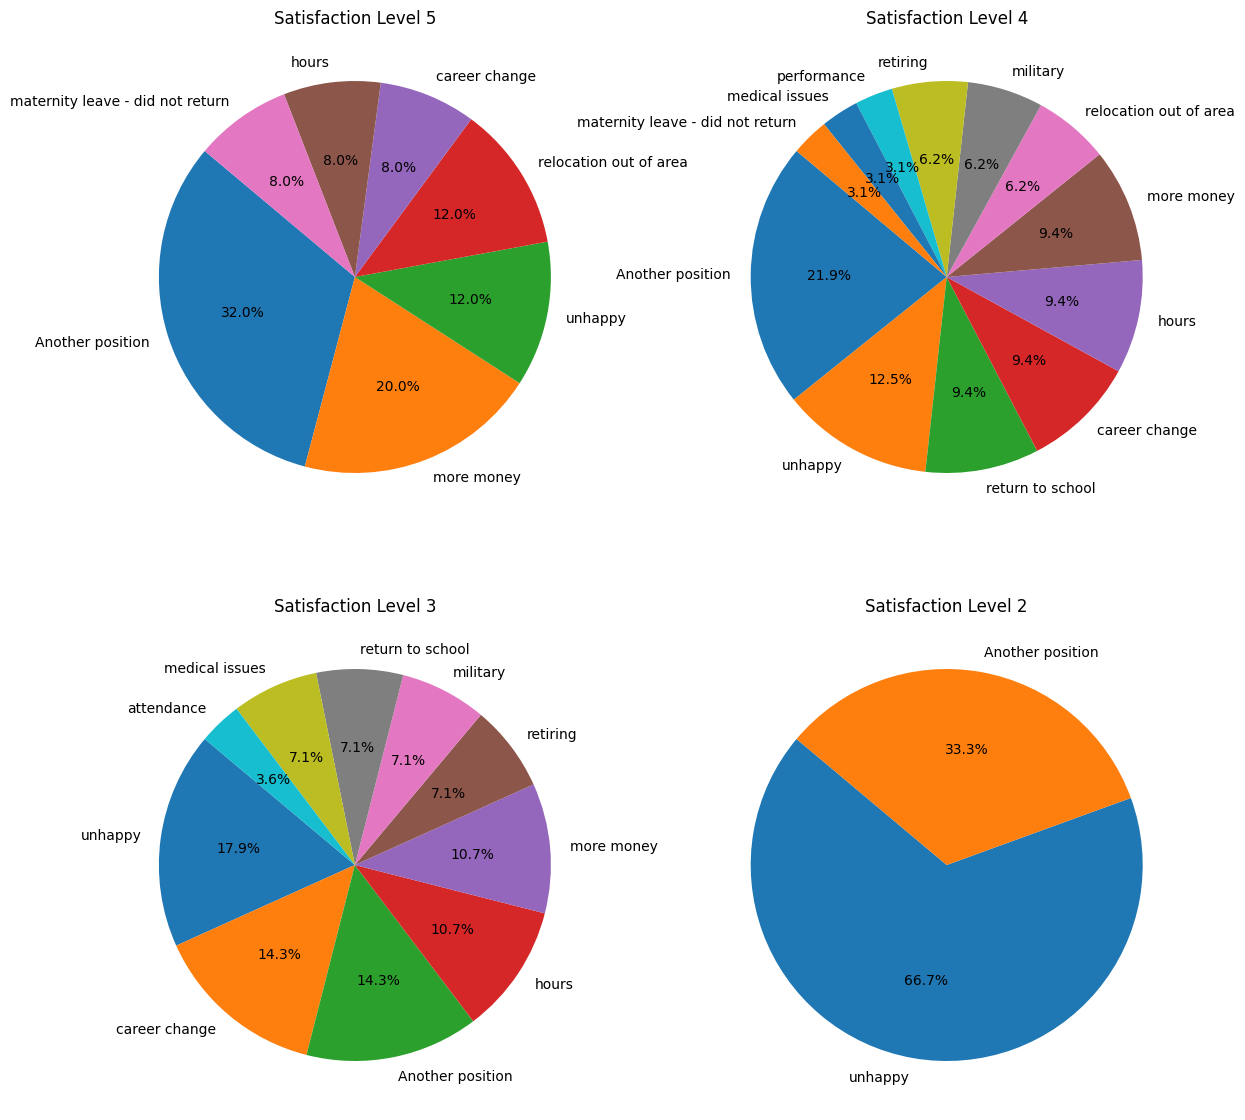

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.ravel()

for i, satisfaction_level in enumerate([5, 4, 3, 2]):
    term_reasons = voluntarily[voluntarily['EmpSatisfaction'] == satisfaction_level]['TermReason'].value_counts()
    axes[i].pie(term_reasons, labels=term_reasons.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Satisfaction Level {satisfaction_level}')

plt.show()

- 만족도가 5, 4인 경우 another position의 이유가 가장 컸다. ➡️ 만족도가 큰 경우, 회사는 만족하나 부서에 대한 불만이 커보인다.
- 만족도가 3, 2인 경우 unhappy의 이유가 가장 컸다 ➡️  만족도가 작은 경우, 회사에 대해서도 만족스럽지가 않고 unhappy인 걸로 보아 회사 생활이 행복하지 않아서 그만둔 것으로 보인다.

In [38]:
# 비자발적 퇴사자

for satisfaction_level in [5, 4, 3, 2]:
    print(f"Satisfaction level {satisfaction_level}:")
    print(terminated[terminated['EmpSatisfaction'] == satisfaction_level]['TermReason'].value_counts())
    print("\n")

Satisfaction level 5:
Learned that he is a gangster    1
attendance                       1
Fatal attraction                 1
gross misconduct                 1
Name: TermReason, dtype: int64


Satisfaction level 4:
attendance          4
performance         1
no-call, no-show    1
Name: TermReason, dtype: int64


Satisfaction level 3:
no-call, no-show    3
performance         1
attendance          1
Name: TermReason, dtype: int64


Satisfaction level 2:
performance    1
Name: TermReason, dtype: int64




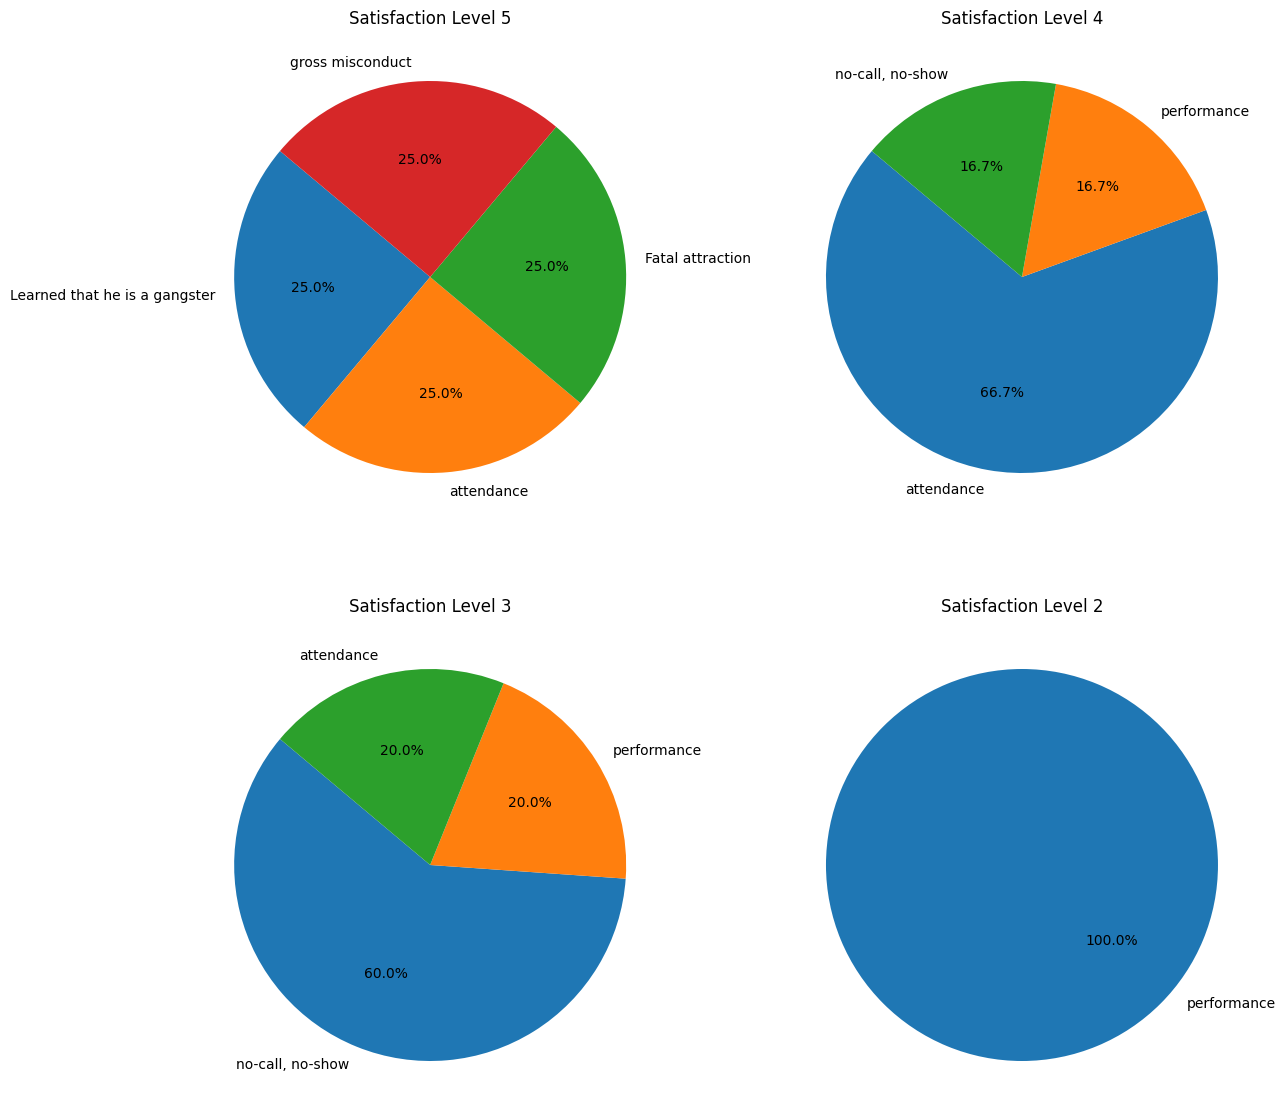

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.ravel()

for i, satisfaction_level in enumerate([5, 4, 3, 2]):
    term_reasons = terminated[terminated['EmpSatisfaction'] == satisfaction_level]['TermReason'].value_counts()
    axes[i].pie(term_reasons, labels=term_reasons.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Satisfaction Level {satisfaction_level}')

plt.show()

- 만족도가 가장 높지만, 해고당한 원인을 보면 50%가 범죄를 저지른 것이고, 25%는 치명적인 실수, 25%는 출근에 대한 것으로 볼 수 있다. 이는 모두 직원 개인의 잘못으로 분석된다.- 만족도가 4,3인 경우 대부분 출근(no-call, no-show)에 관한 문제가 있고 만족도가 가장 낮은 2인 경우 팀에서의 performance로 인해 해고당한 것으로 보인다.
- 만족도가 높은데도 불구하고 해고 당한 것을 보아 직원 개인에게 문제가 있는 것으로 확인되었고, 만족도가 중간인 경우 불성실함이 원인인 것으로 보인다. 그리고 만족도가 가장 낮은 경우 Performance의 부족함이 원인인 것으로 보인다.

### 1-4-3-2 성별, 만족도에 따른 퇴사 이유 분석

In [50]:
# 자발적 퇴사자
gender_voluntarily = voluntarily.groupby(['Sex','EmpSatisfaction'])['TermReason'].value_counts()
gender_voluntarily

Sex  EmpSatisfaction  TermReason                      
F    2                Another position                    1
     3                Another position                    4
                      unhappy                             3
                      career change                       2
                      hours                               2
                      military                            2
                      return to school                    1
     4                Another position                    7
                      return to school                    3
                      unhappy                             3
                      more money                          2
                      relocation out of area              2
                      career change                       1
                      hours                               1
                      maternity leave - did not return    1
                      medical issues         

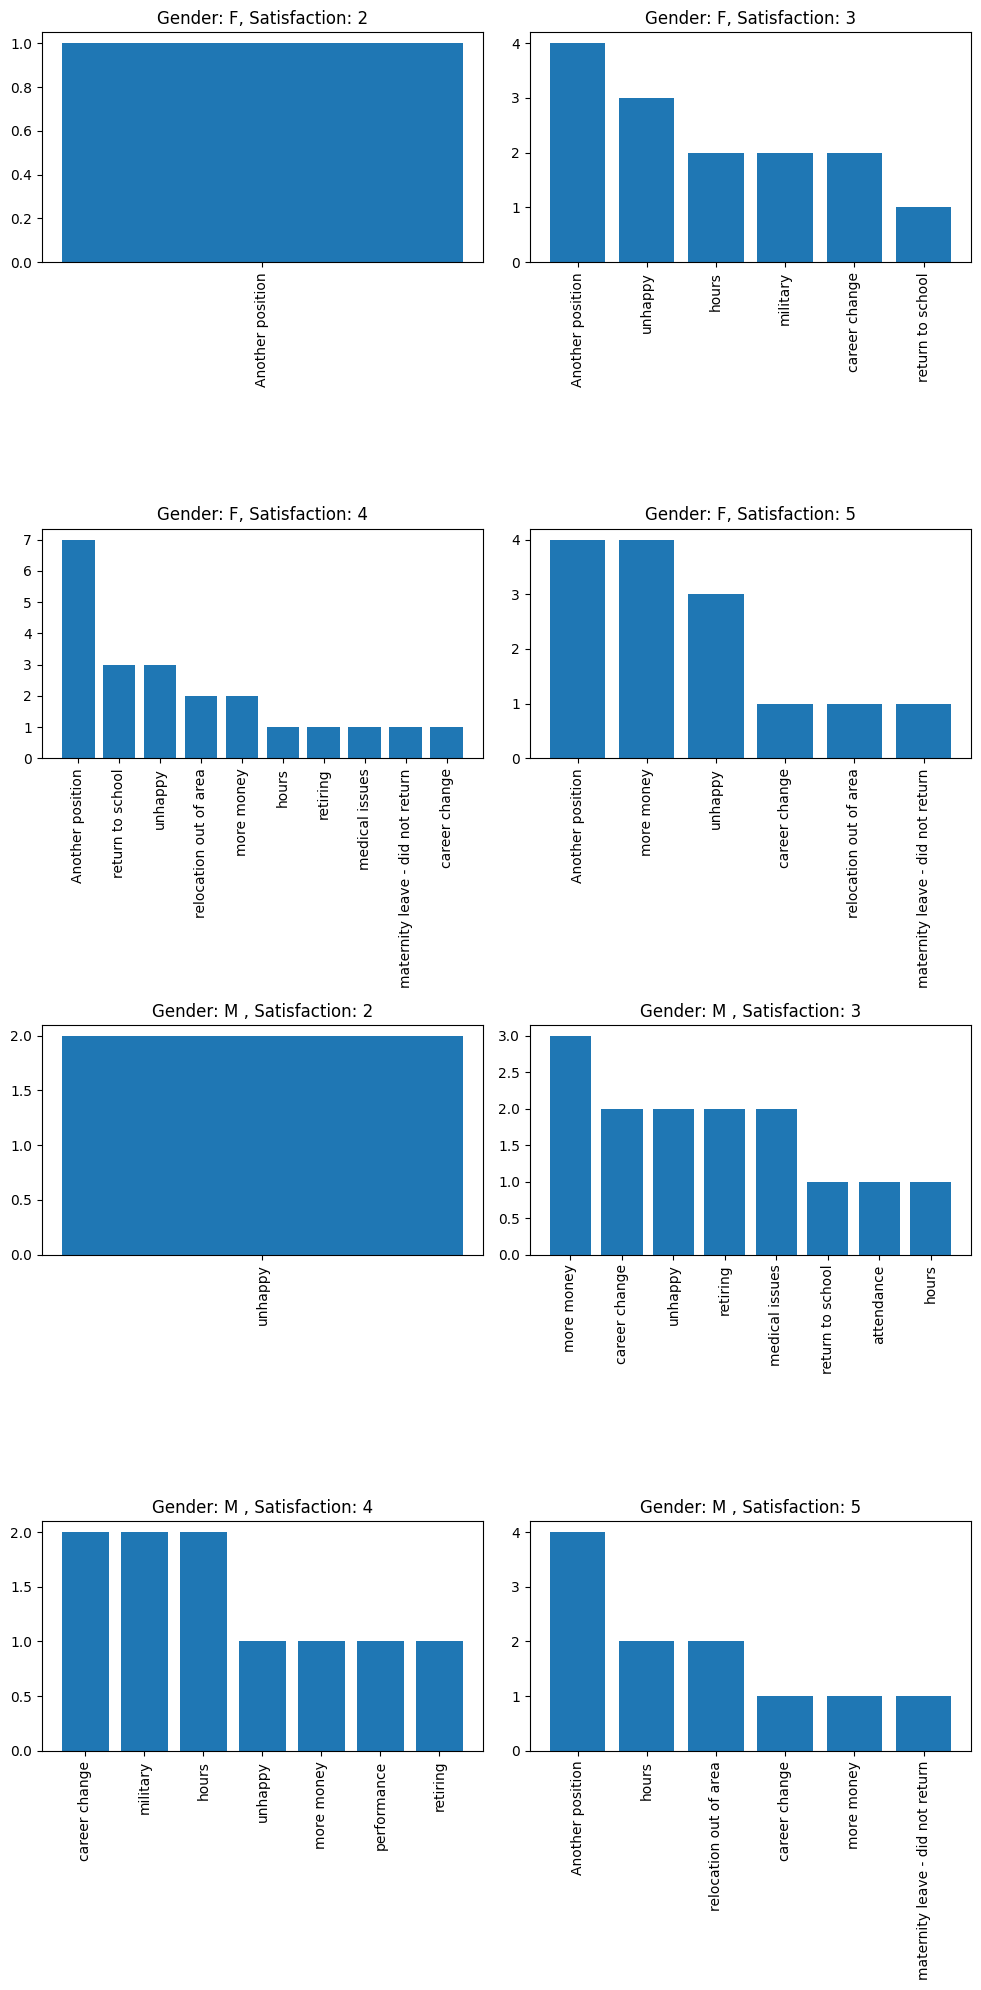

In [51]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(voluntarily.groupby(['Sex', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()
    axes[i].bar(term_reason_counts.index, term_reason_counts.values)
    axes[i].set_title(f'Gender: {group_name[0]}, Satisfaction: {group_name[1]}')
    axes[i].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

- 자발적 여성 퇴사자의 경우 만족도와 상관없이 Another Position으로 인해 퇴사한 것으로 보인다.
- 자발적 남성 퇴사자의 경우 여성과 달리 다양한 이유가 나왔다
  - 만족도가 가장 낮은 남성의 경우 행복하지 않아서, 만족도가 3인 경우 연봉을 더 높이기 위해서, 만족도가 4인 경우 커리어 변화를 위해서, 만족도가 가장 높은 경우 Another Position으로 인해 퇴사한 것으로 보인다.
- 자발적 퇴사자의 만족도가 가장 높은 경우 여성, 남성 모두 position으로 인해 퇴사한 것으로 보인다.

In [52]:
# 비자발적 퇴사자
gender_terminated = terminated.groupby(['Sex','EmpSatisfaction'])['TermReason'].value_counts()
gender_terminated

Sex  EmpSatisfaction  TermReason                   
F    2                performance                      1
     3                no-call, no-show                 2
                      attendance                       1
     4                attendance                       1
                      no-call, no-show                 1
                      performance                      1
     5                attendance                       1
                      gross misconduct                 1
M    3                no-call, no-show                 1
                      performance                      1
     4                attendance                       3
     5                Fatal attraction                 1
                      Learned that he is a gangster    1
Name: TermReason, dtype: int64

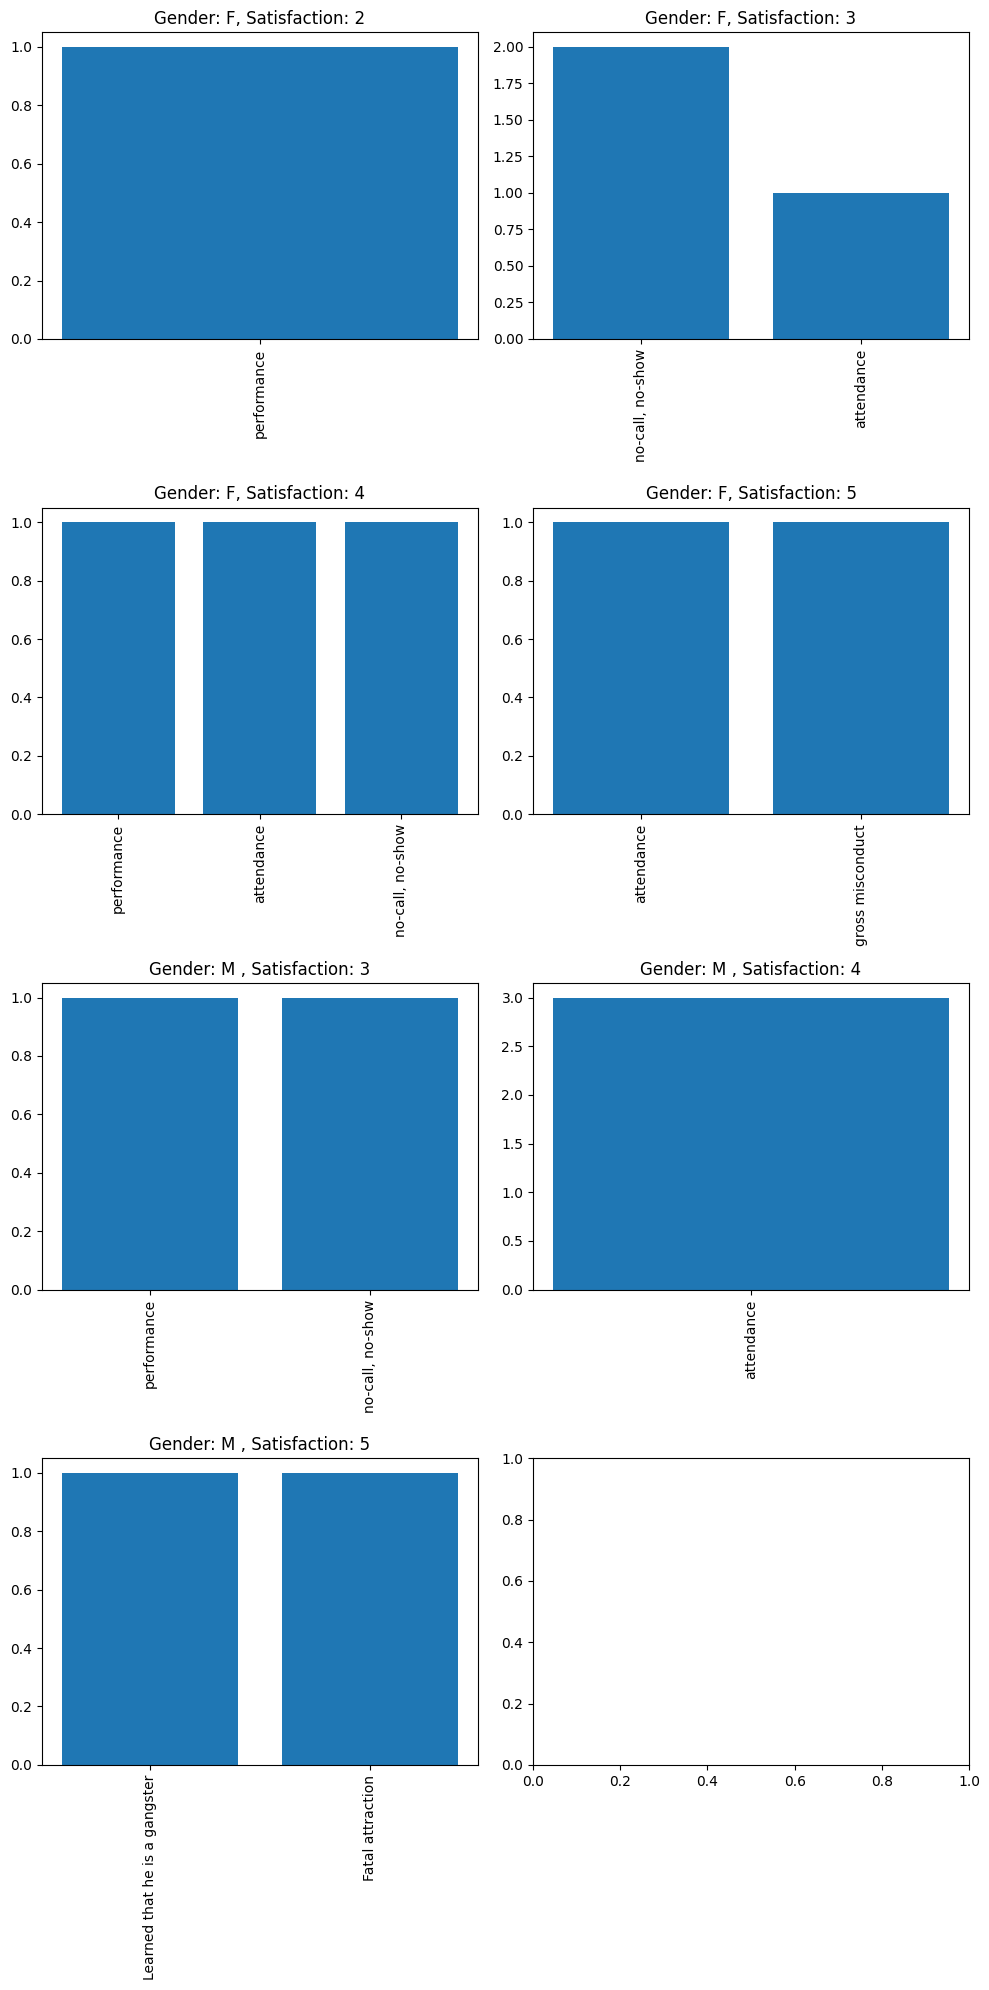

In [55]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(terminated.groupby(['Sex', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()
    axes[i].bar(term_reason_counts.index, term_reason_counts.values)
    axes[i].set_title(f'Gender: {group_name[0]}, Satisfaction: {group_name[1]}')
    axes[i].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

- 해고당한 여성의 만족도가 가장 낮은 경우 performance 능력 부족으로, 만족도가 3인경우 no-call, no-show, attendance의 불성실함으로, 만족도가 3인경우 performance, attendance, no-call, no-show 등의 불성실함으로, 만족도가 5인 경우 attendance, gross misconduct의 원인으로 해고 되었다.
- 자발적 퇴사가 아니기 때문에 performance 능력 부족, 불성실함으로 인해 해고당한 것으로 보인다.
- 해고당한 남성의 만족도가 가장 낮은 경우 performance, no-call, no-show의 이유로, 만족도가 4인 경우 attendance의 불성실함으로, 만족도가 5인 경우 Learned that he is a gangster, Fatal attraction의 개인의 이유로 해고당한 것으로 보인다.
- 여성과 다르게 남성도 또한 불성실함의 원인이 크지만 만족도가 높은 경우 범법자인 경우가 많다.

### 1-4-3-3 결혼상태별, 만족도에 따른 퇴사 이유 분석

In [58]:
# 자발적 퇴사자
married_voluntarily = voluntarily.groupby(['MaritalDesc','EmpSatisfaction'])['TermReason'].value_counts()
married_voluntarily

MaritalDesc  EmpSatisfaction  TermReason                      
Divorced     3                Another position                    1
                              hours                               1
                              unhappy                             1
             4                hours                               2
                              return to school                    2
                              Another position                    1
                              retiring                            1
                              unhappy                             1
             5                Another position                    2
                              more money                          2
                              maternity leave - did not return    1
                              unhappy                             1
Married      2                unhappy                             1
             3                career change          

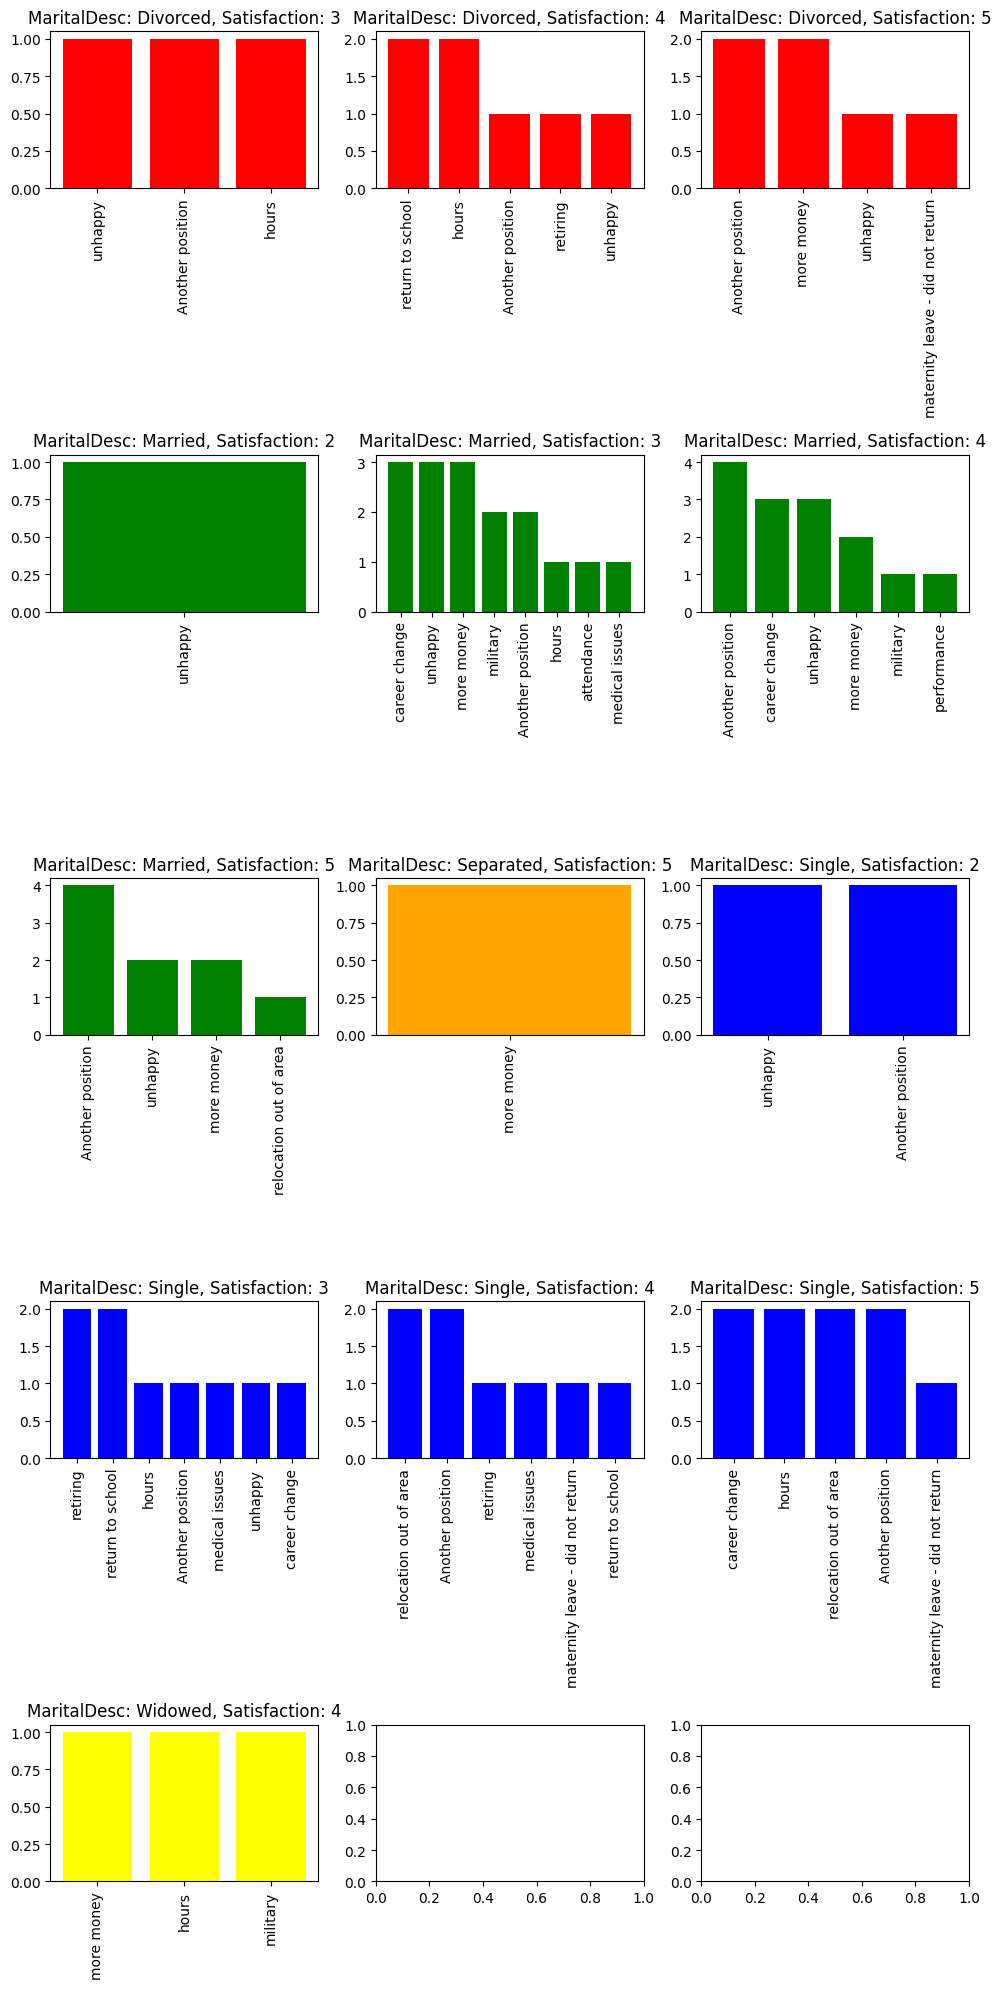

In [62]:
marital_colors = {
    'Single': 'blue',
    'Married': 'green',
    'Divorced': 'red',
    'Separated': 'orange',
    'Widowed' : 'yellow',
}

fig, axes = plt.subplots(5, 3, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(voluntarily.groupby(['MaritalDesc', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    color = marital_colors.get(group_name[0], 'gray')

    axes[i].bar(term_reason_counts.index, term_reason_counts.values, color=color)
    axes[i].set_title(f'MaritalDesc: {group_name[0]}, Satisfaction: {group_name[1]}')
    axes[i].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

- Married의 경우 만족도가 3~5인 경우, Another position, Career change의 이유가 가장 컸다. 자신의 커리어를 생각해서 회사를 그만둔 것으로 보인다.
- Divorced의 경우 만족도별로 이유가 다르게 나왔다. 만족도가 가장 높은 경우는 Another position, more money의 이유이고, 만족도가 4인 경우 return to school, hours, 만족도가 3인 경우 unhappy, another position, hours로 나왔다.
만족도와 상관없이 이유를 봤을 때 자신의 커리어를 위해 그만둔 것으로 보인다. Another position, more money, return to school 모두 커리어를 high시키기 위한 것으로 볼 수 있기 때문이다.
- Seperated의 경우 만족도가 5인 경우 밖에 없었고, more money의 이유로 인해 회사를 그만뒀다.
- Single의 경우 다양한 이유가 나왔다. Single의 경우도 대부분 Career를 위해서 회사를 그만둔 것으로 보인다.
- Widowed의 경우 more money, hours, military의 이유로 회사를 그만두었다.그래프를 분석해보자면 이유가 너무나 다양하고, 어느 하나 압도적인 이유가 없었다.
- 따라서 결혼상태에 따라 만족도별, 회사를 그만두는 이유는 너무나 다양하고 결혼상태에 상관이 없는 것으로 보인다.


In [60]:
# 비자발적 퇴사자
married_terminated = terminated.groupby(['MaritalDesc','EmpSatisfaction'])['TermReason'].value_counts()
married_terminated

MaritalDesc  EmpSatisfaction  TermReason                   
Married      3                no-call, no-show                 2
                              attendance                       1
             4                attendance                       1
             5                Fatal attraction                 1
                              attendance                       1
                              gross misconduct                 1
Single       2                performance                      1
             3                no-call, no-show                 1
                              performance                      1
             4                attendance                       2
                              no-call, no-show                 1
                              performance                      1
             5                Learned that he is a gangster    1
Widowed      4                attendance                       1
Name: TermReason, dtype: int64

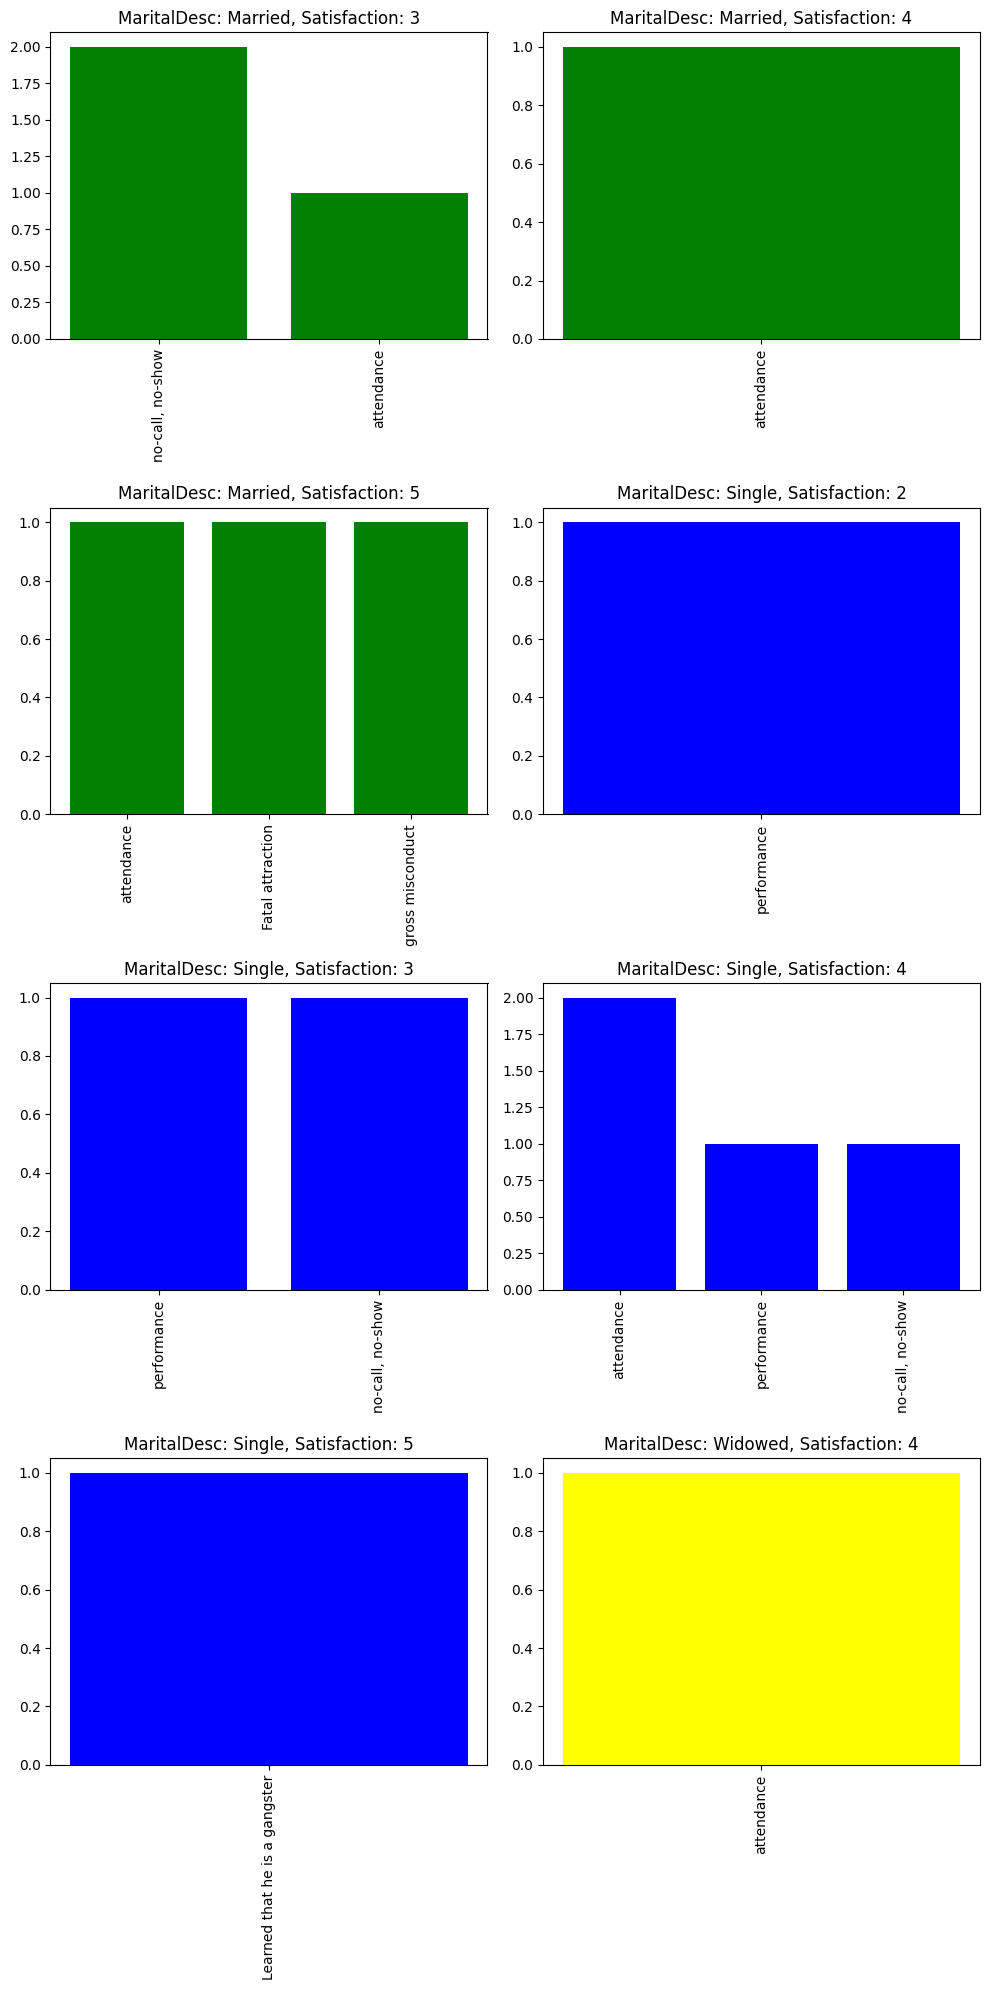

In [63]:
marital_colors = {
    'Single': 'blue',
    'Married': 'green',
    'Divorced': 'red',
    'Separated': 'orange',
    'Widowed' : 'yellow',
}

fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(terminated.groupby(['MaritalDesc', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    color = marital_colors.get(group_name[0], 'gray')

    axes[i].bar(term_reason_counts.index, term_reason_counts.values, color=color)
    axes[i].set_title(f'MaritalDesc: {group_name[0]}, Satisfaction: {group_name[1]}')
    axes[i].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

- 비자발적 퇴사자의 경우 만족도, 결혼상태 별 퇴사이유는 no-call, no-show, attendance, performance 이유로 나왔고, 이유들도 별 차이가 없다. 모두 동일하게 불성실함으로 인해 회사를 그만둔 것으로 보인다.

### 1-4-3-4 인종별, 만족도에 따른 퇴사 이유 분석

In [64]:
# 자발적 퇴사자
race_voluntarily  = voluntarily.groupby(['RaceDesc','EmpSatisfaction'])['TermReason'].value_counts()
race_voluntarily

RaceDesc                   EmpSatisfaction  TermReason                      
Asian                      2                Another position                    1
                                            unhappy                             1
                           3                Another position                    1
                                            more money                          1
                                            retiring                            1
                                            return to school                    1
                                            unhappy                             1
                           4                Another position                    1
                           5                unhappy                             1
Black or African American  3                Another position                    1
                                            attendance                          1
                     

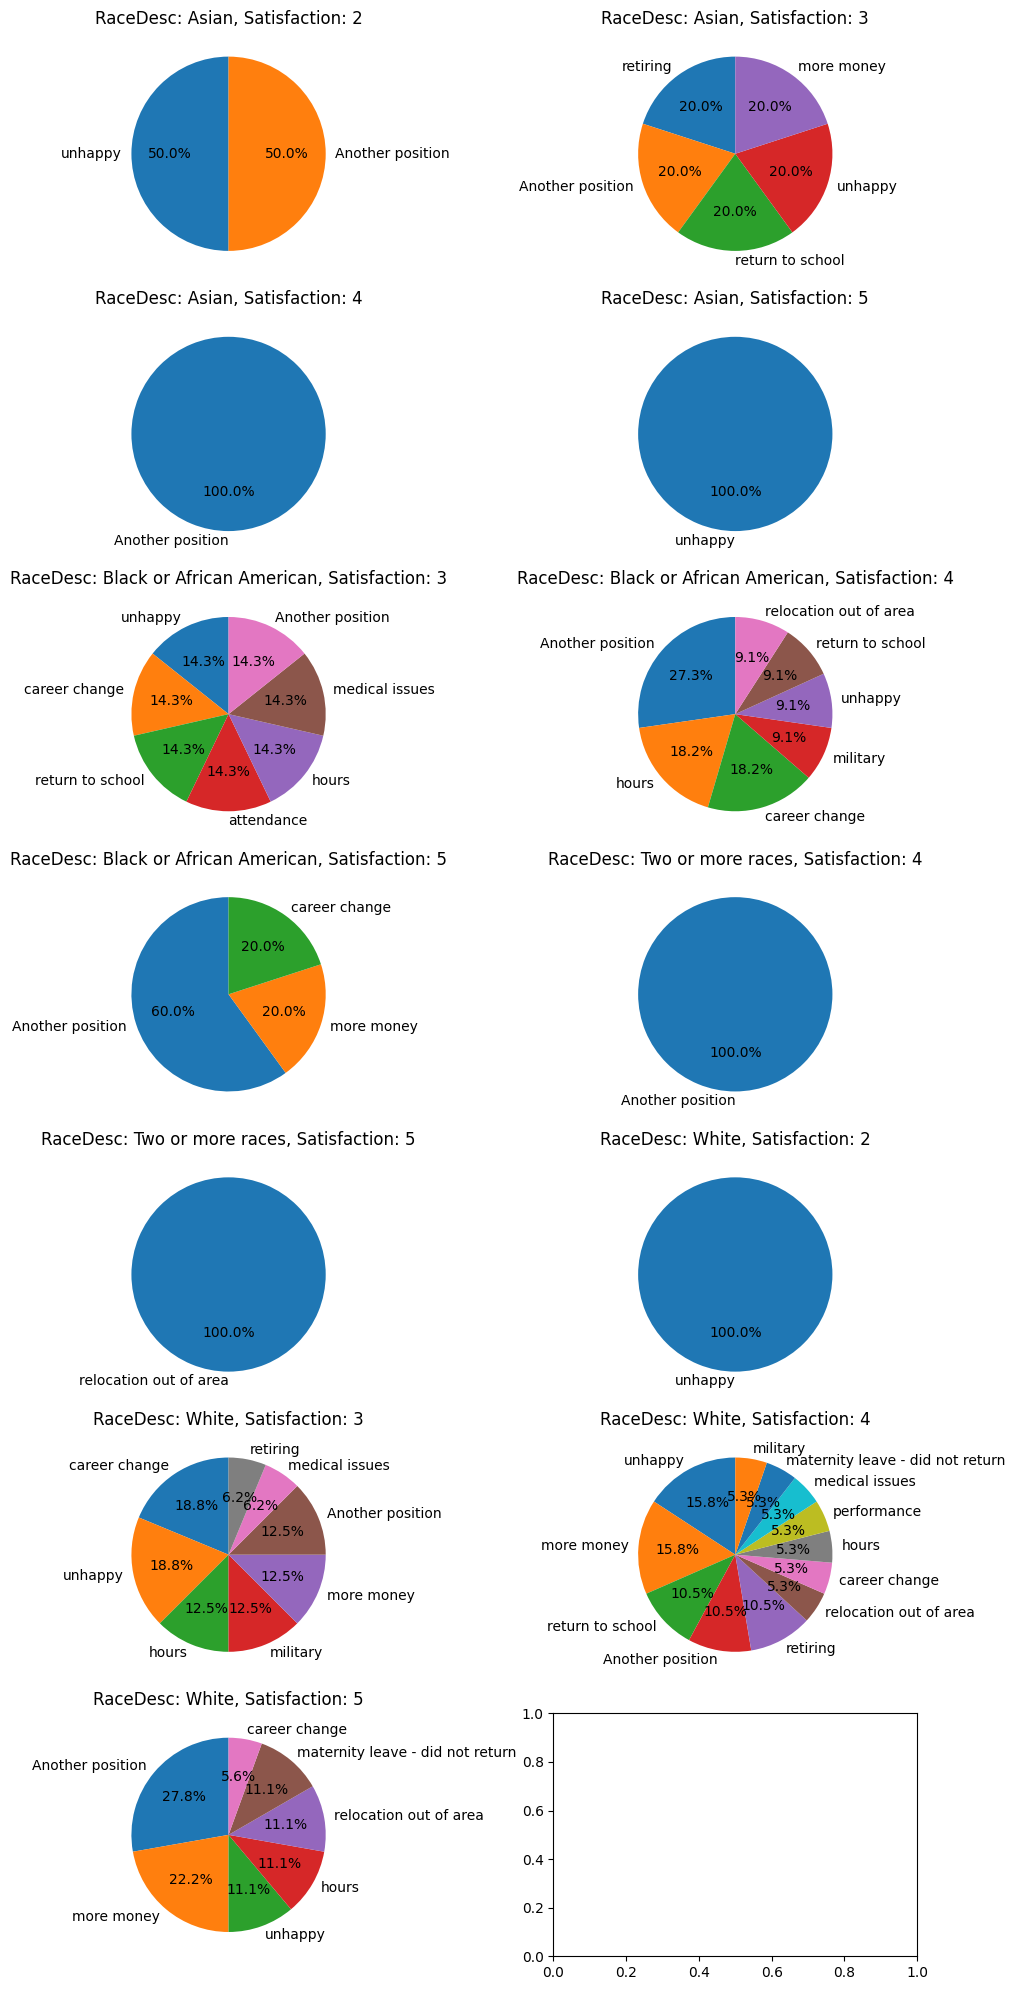

In [65]:
fig, axes = plt.subplots(7, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(voluntarily.groupby(['RaceDesc', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    axes[i].pie(term_reason_counts, labels=term_reason_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'RaceDesc: {group_name[0]}, Satisfaction: {group_name[1]}')

plt.tight_layout()
plt.show()

In [66]:
# 비자발적 퇴사자
race_terminated = terminated.groupby(['RaceDesc','EmpSatisfaction'])['TermReason'].value_counts()
race_terminated

RaceDesc                   EmpSatisfaction  TermReason                   
Black or African American  3                no-call, no-show                 2
                                            performance                      1
                           4                attendance                       1
                           5                Learned that he is a gangster    1
                                            attendance                       1
Two or more races          2                performance                      1
White                      3                attendance                       1
                                            no-call, no-show                 1
                           4                attendance                       3
                                            no-call, no-show                 1
                                            performance                      1
                           5                Fatal attract

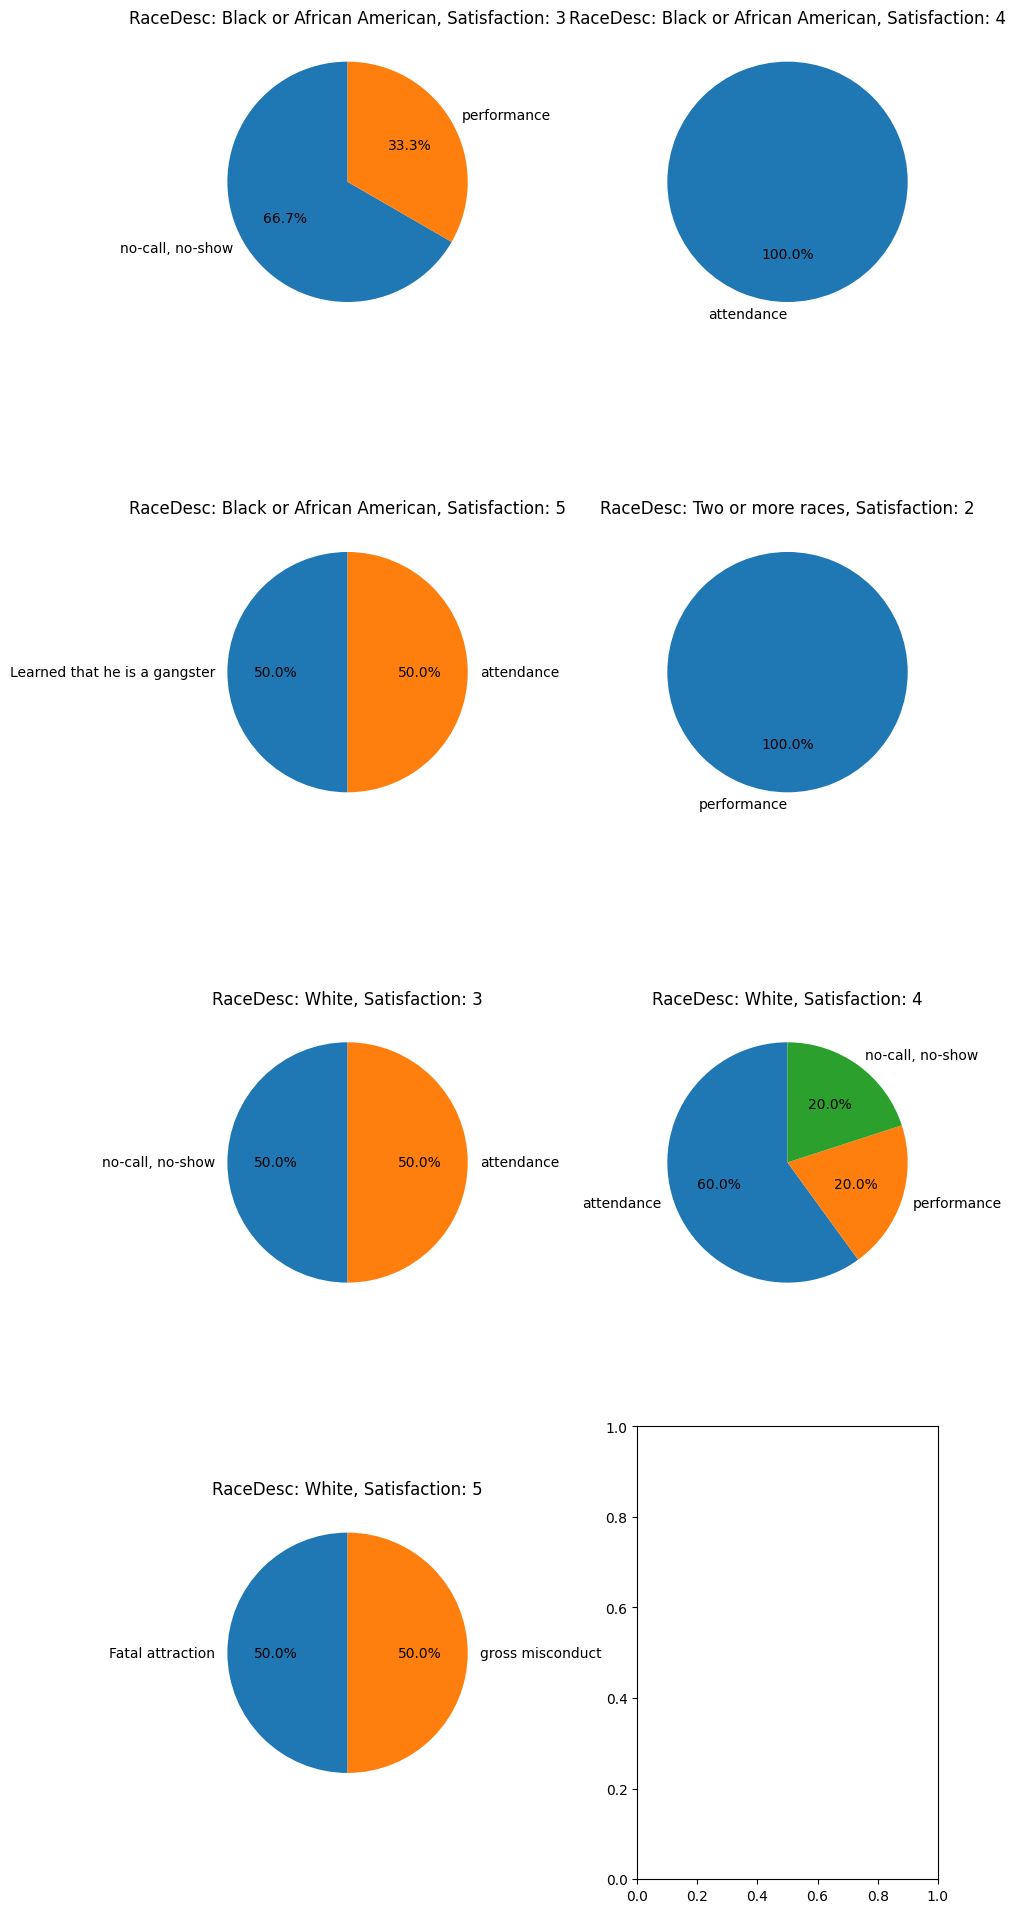

In [67]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(terminated.groupby(['RaceDesc', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    axes[i].pie(term_reason_counts, labels=term_reason_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'RaceDesc: {group_name[0]}, Satisfaction: {group_name[1]}')

plt.tight_layout()
plt.show()

### 1-4-3-5 시민권 유무 별, 만족도에 따른 퇴사 이유 분석

In [68]:
city_voluntarily = voluntarily.groupby(['CitizenDesc','EmpSatisfaction'])['TermReason'].value_counts()
city_voluntarily

CitizenDesc          EmpSatisfaction  TermReason                      
Eligible NonCitizen  3                unhappy                             1
                     4                Another position                    1
                                      career change                       1
                                      return to school                    1
                     5                Another position                    1
Non-Citizen          3                medical issues                      1
                     5                Another position                    1
                                      relocation out of area              1
US Citizen           2                unhappy                             2
                                      Another position                    1
                     3                Another position                    4
                                      career change                       4
                 

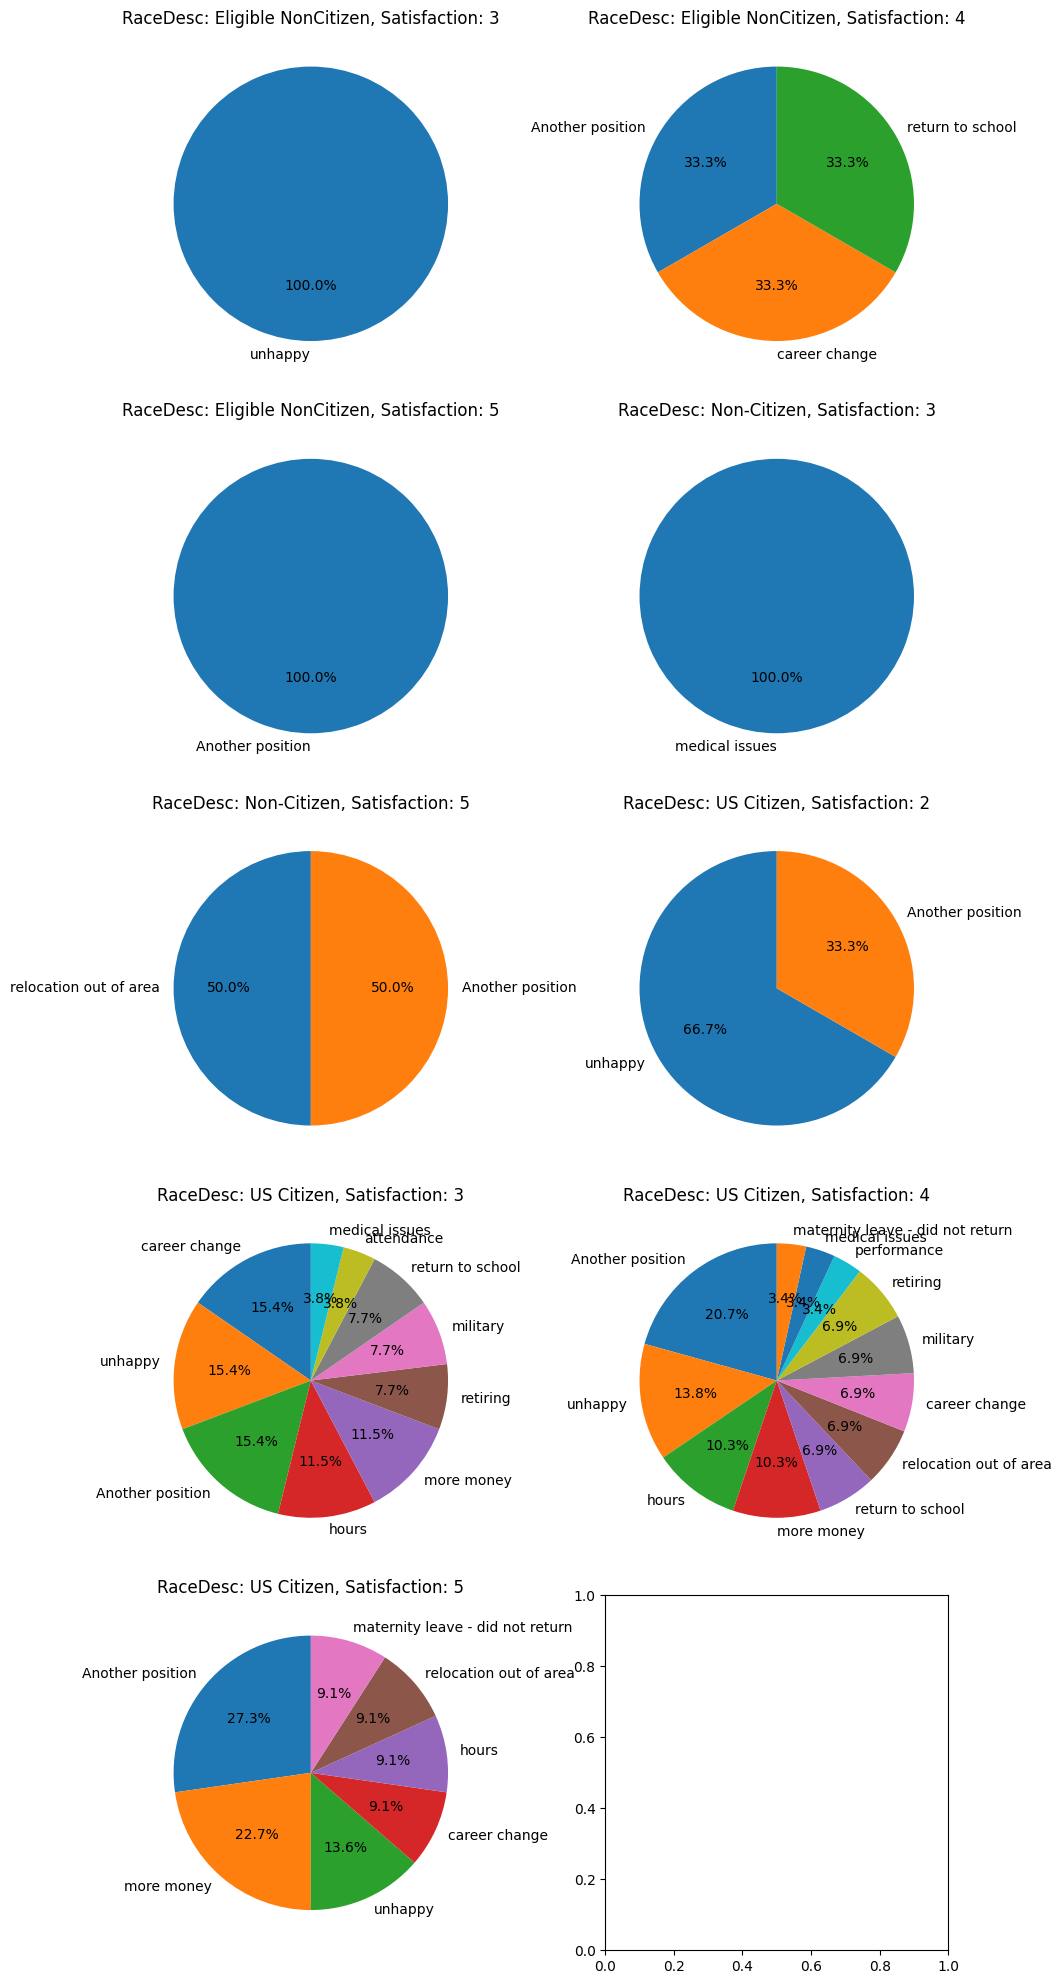

In [69]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(voluntarily.groupby(['CitizenDesc', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    axes[i].pie(term_reason_counts, labels=term_reason_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'RaceDesc: {group_name[0]}, Satisfaction: {group_name[1]}')

plt.tight_layout()
plt.show()

In [70]:
# 비자발적 퇴사자
city_terminated = terminated.groupby(['CitizenDesc','EmpSatisfaction'])['TermReason'].value_counts()
city_terminated

CitizenDesc  EmpSatisfaction  TermReason                   
US Citizen   2                performance                      1
             3                no-call, no-show                 3
                              attendance                       1
                              performance                      1
             4                attendance                       4
                              no-call, no-show                 1
                              performance                      1
             5                Fatal attraction                 1
                              Learned that he is a gangster    1
                              attendance                       1
                              gross misconduct                 1
Name: TermReason, dtype: int64

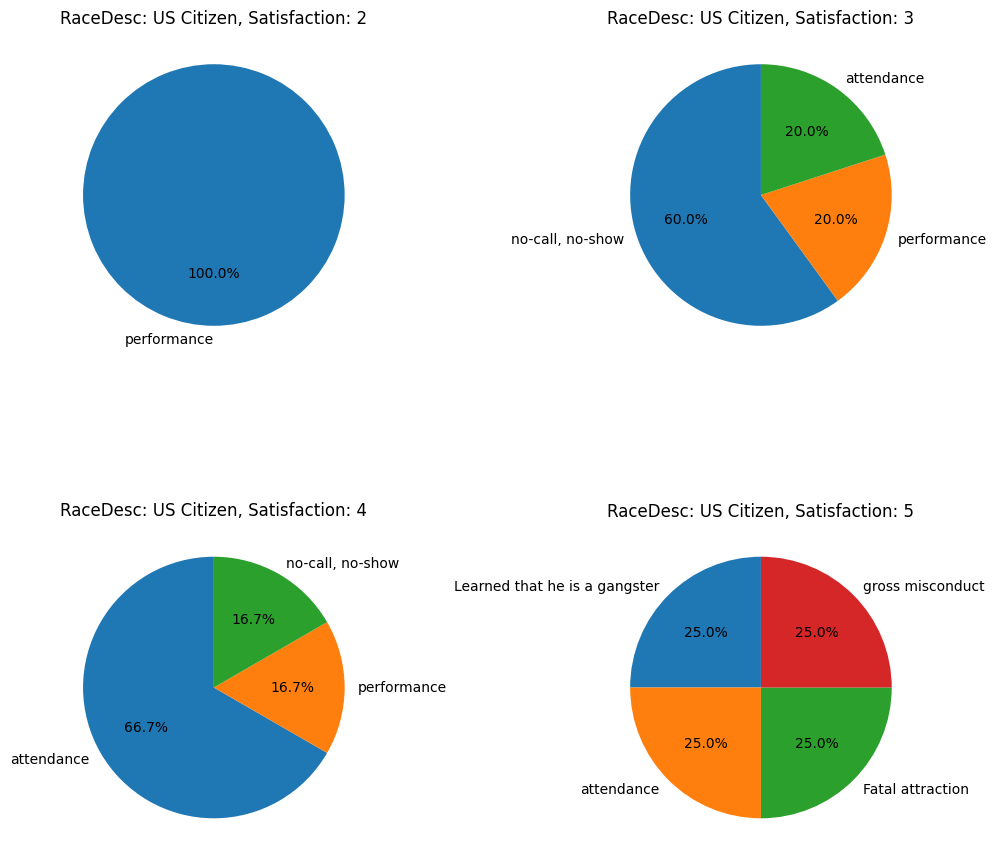

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(terminated.groupby(['CitizenDesc', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    axes[i].pie(term_reason_counts, labels=term_reason_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'RaceDesc: {group_name[0]}, Satisfaction: {group_name[1]}')

plt.tight_layout()
plt.show()

### 1-4-3-6 프로젝트 참여수 별 만족도에 따른 퇴사 이유

In [90]:
# 자발적 퇴사자
project_voluntarily = voluntarily.groupby(['SpecialProjectsCount','EmpSatisfaction'])['TermReason'].value_counts()
project_voluntarily

SpecialProjectsCount  EmpSatisfaction  TermReason                      
0                     2                unhappy                             2
                                       Another position                    1
                      3                unhappy                             5
                                       Another position                    3
                                       career change                       3
                                       more money                          3
                                       hours                               2
                                       military                            2
                                       retiring                            2
                                       return to school                    2
                                       attendance                          1
                      4                Another position                    7
    

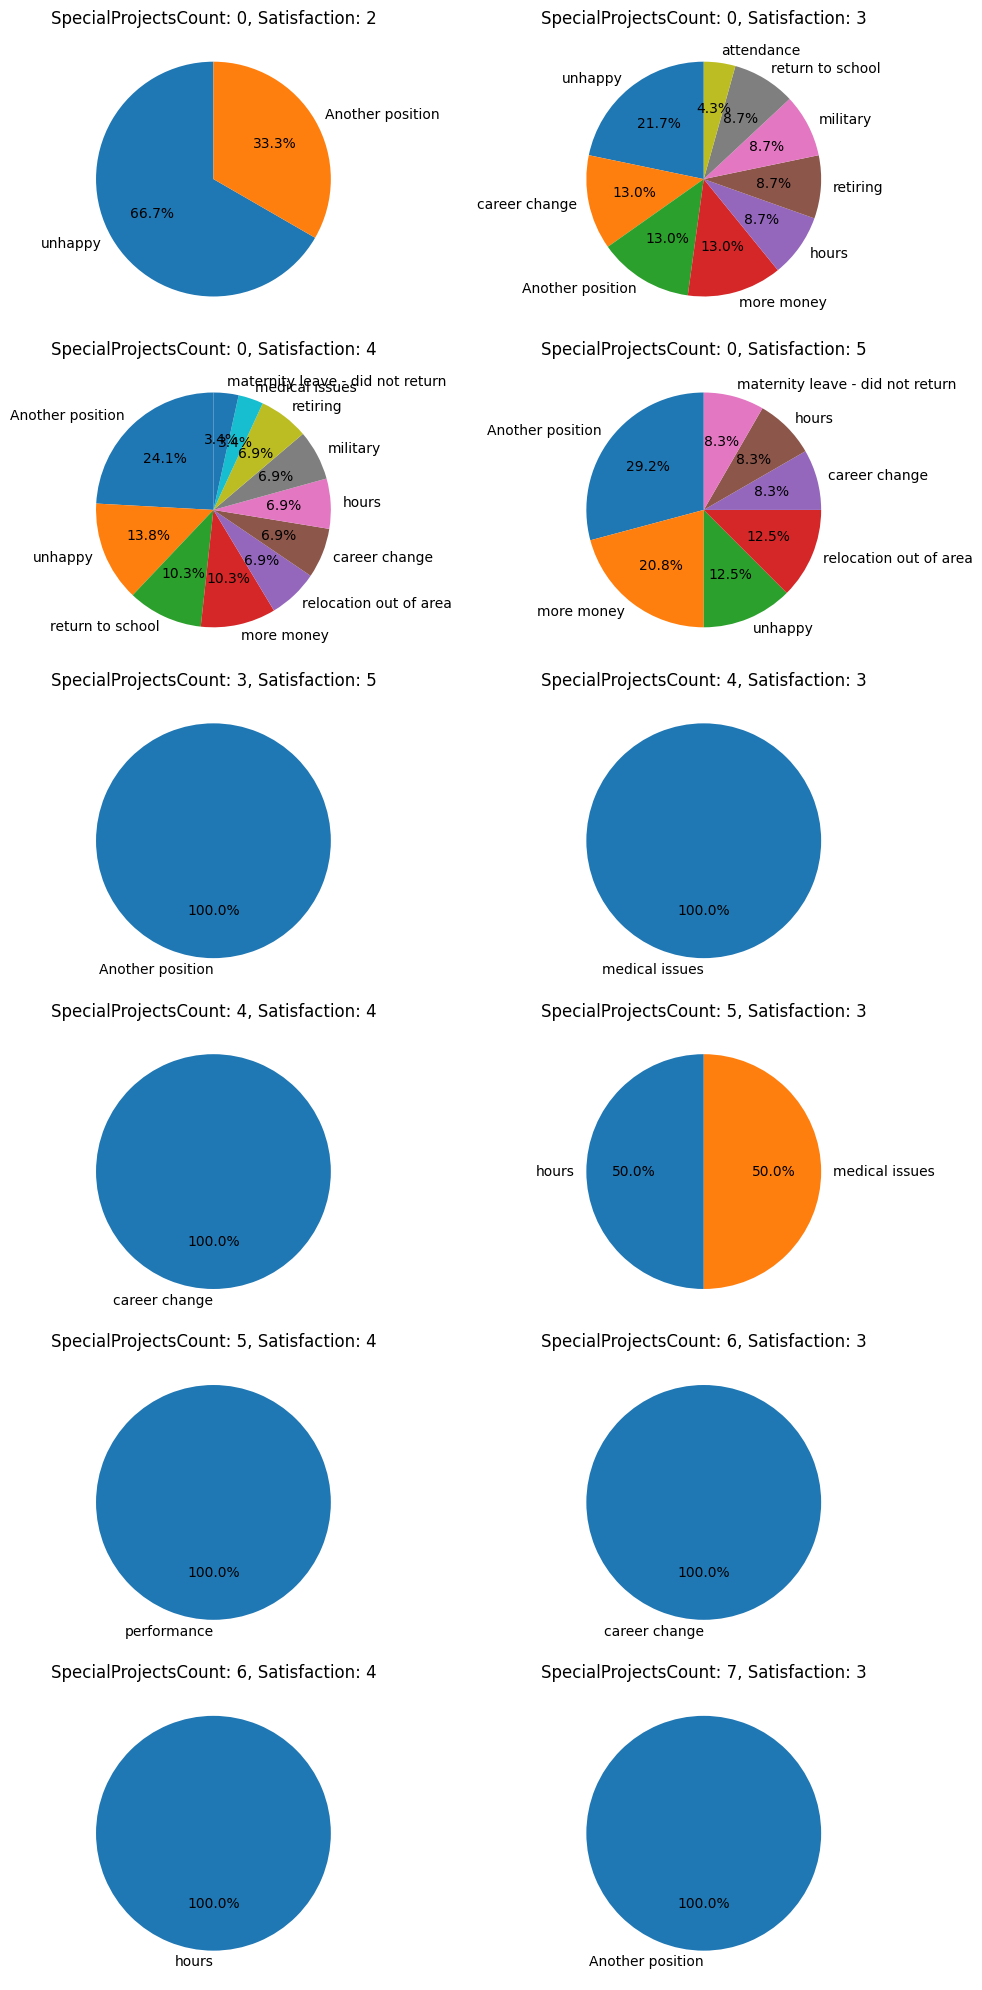

In [92]:
fig, axes = plt.subplots(6, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(voluntarily.groupby(['SpecialProjectsCount', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    axes[i].pie(term_reason_counts, labels=term_reason_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'SpecialProjectsCount: {group_name[0]}, Satisfaction: {group_name[1]}')

plt.tight_layout()
plt.show()

- 프로젝트 참여수가 많고 만족도가 높을 수록, career change, hours, another position, performance 등의 커리어를 높이기 위해 회사를 그만둔 것으로 보인다.
- 프로젝트 참여수가 적든, 많든 자발적 퇴사자의 경우 position의 문제와 career change의 문제로 회사를 그만둔 것으로 보인다.

In [93]:
# 비자발적 퇴사자
project_terminated = terminated.groupby(['SpecialProjectsCount','EmpSatisfaction'])['TermReason'].value_counts()
project_terminated

SpecialProjectsCount  EmpSatisfaction  TermReason                   
0                     2                performance                      1
                      3                attendance                       1
                                       no-call, no-show                 1
                                       performance                      1
                      4                attendance                       4
                      5                Fatal attraction                 1
                                       gross misconduct                 1
4                     3                no-call, no-show                 1
                      4                no-call, no-show                 1
                      5                attendance                       1
5                     4                performance                      1
7                     3                no-call, no-show                 1
                      5                Lear

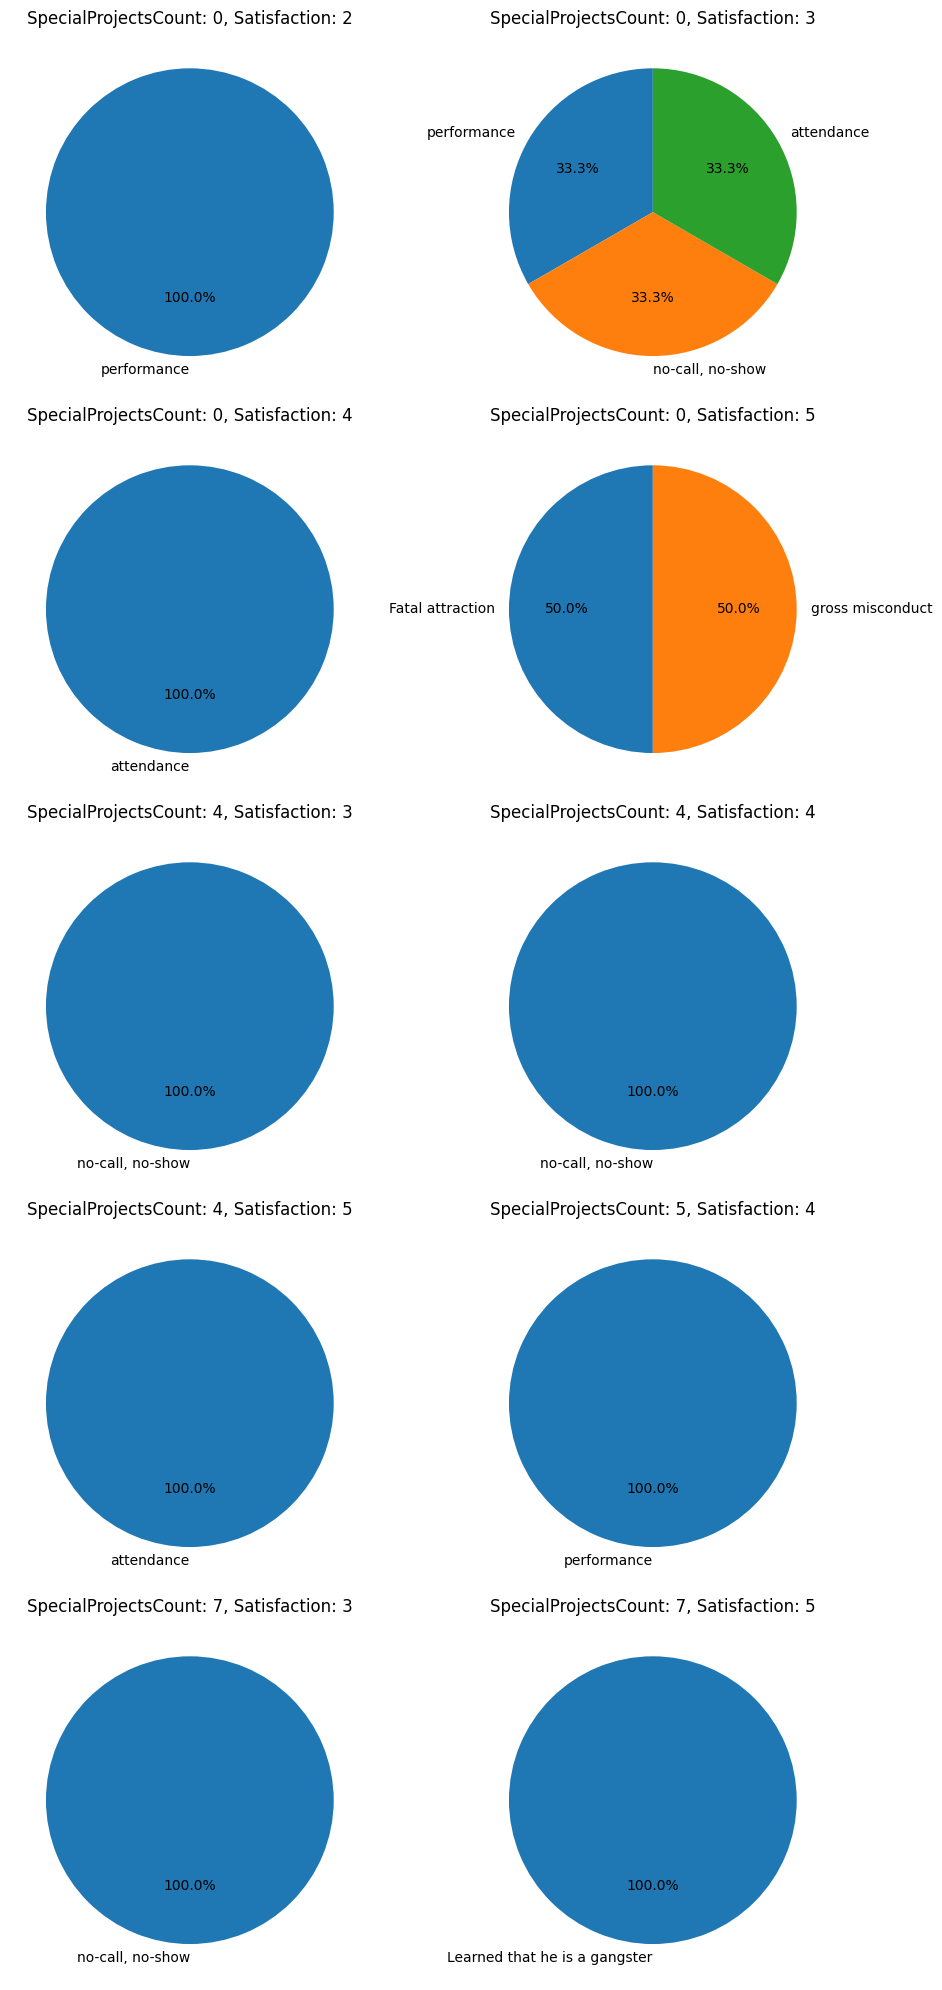

In [94]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(terminated.groupby(['SpecialProjectsCount', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    axes[i].pie(term_reason_counts, labels=term_reason_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'SpecialProjectsCount: {group_name[0]}, Satisfaction: {group_name[1]}')

plt.tight_layout()
plt.show()

- 비자발자 퇴사자의 경우 프로젝트 참여수가 많든, 적든 개인의 불성실함으로 인해 회사를 그만둔 것으로 보인다.

### 1-4-3-7 직원상태 별 만족도에 따른 퇴사 이유 분석

In [74]:
df2 = df[~working]
statifaction_termed_reasoan = df2.groupby(['EmploymentStatus','EmpSatisfaction'])['TermReason'].value_counts()
statifaction_termed_reasoan

EmploymentStatus        EmpSatisfaction  TermReason                      
Terminated for Cause    2                performance                         1
                        3                no-call, no-show                    3
                                         attendance                          1
                                         performance                         1
                        4                attendance                          4
                                         no-call, no-show                    1
                                         performance                         1
                        5                Fatal attraction                    1
                                         Learned that he is a gangster       1
                                         attendance                          1
                                         gross misconduct                    1
Voluntarily Terminated  2                unhappy         

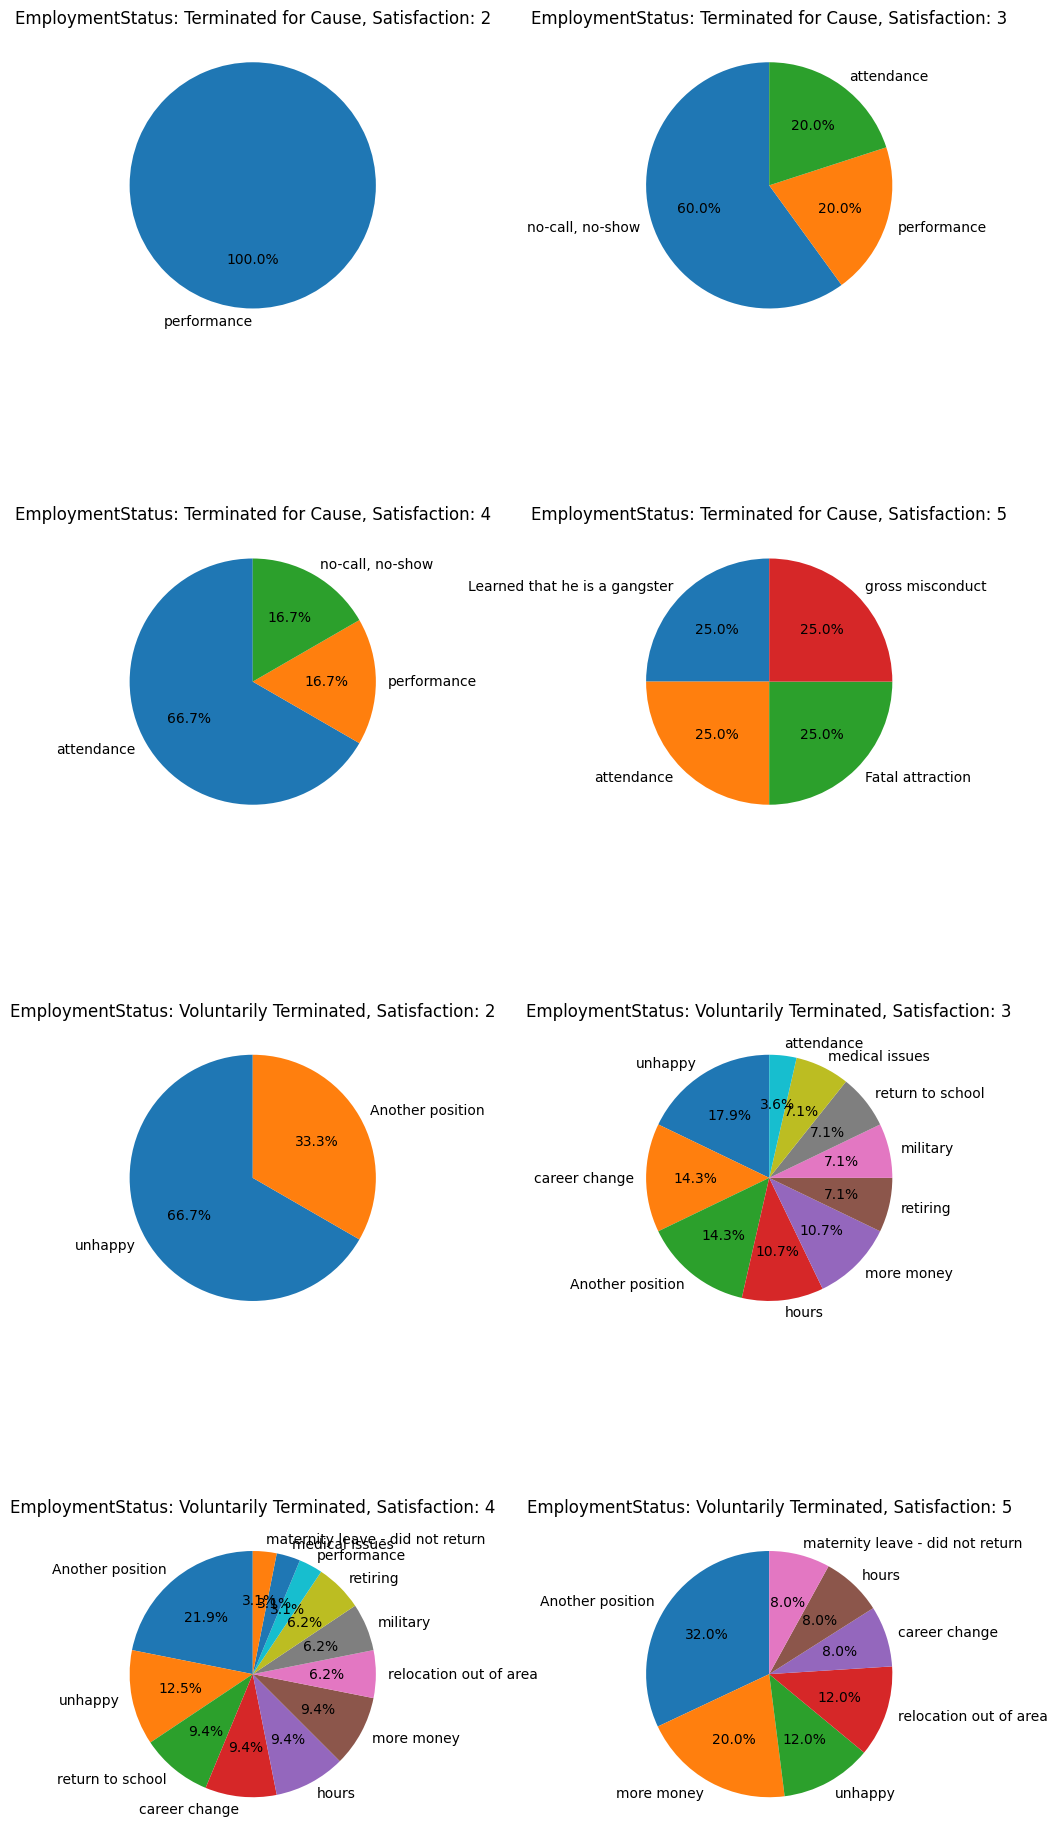

In [77]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(df2.groupby(['EmploymentStatus', 'EmpSatisfaction'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    axes[i].pie(term_reason_counts, labels=term_reason_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'EmploymentStatus: {group_name[0]}, Satisfaction: {group_name[1]}')

plt.tight_layout()
plt.show()

### 1-4-3-8 통계검정
- 자발적 퇴사자와 비자발적 퇴사자의 성별, 결혼상태, 인종, 시민권 유무가 만족도에 영향을 끼치는지

In [82]:
df3 = df.copy()

In [83]:
# 'GenderID', 'MaritalDesc', 'CitizenDesc', 'RaceDesc'에 대한 더미 변수 생성
gender_dummies = pd.get_dummies(df3['GenderID'], prefix='Gender')
marital_dummies = pd.get_dummies(df3['MaritalDesc'], prefix='Marital')
citizen_dummies = pd.get_dummies(df3['CitizenDesc'], prefix='City')
race_dummies = pd.get_dummies(df3['RaceDesc'], prefix='Race')

# 원래 데이터프레임에 더미 변수를 추가
df3 = pd.concat([df3, gender_dummies, marital_dummies, citizen_dummies, race_dummies], axis=1)

# 원래 범주형 열을 제거할 수 있습니다.
df3.drop(['GenderID','MaritalDesc', 'CitizenDesc', 'RaceDesc'], axis=1, inplace=True)

In [84]:
df3.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'HispanicLatino', 'DateofHire', 'DateofTermination', 'TermReason',
       'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'Age', 'WD', 'LastAssessedDate',
       'PerformanceScoreNumeric', 'StatusNumeric', 'Gender_0', 'Gender_1',
       'Marital_Divorced', 'Marital_Married', 'Marital_Separated',
       'Marital_Single', 'Marital_Widowed', 'City_Eligible NonCitizen',
       'City_Non-Citizen', 'City_US Citizen',
       'Race_American Indian or Alaska Native', 'Race_Asian',
       'Race_Black or African American', 'Race_Hispanic',
       'Race_Two or more races', 'Race_

In [85]:
df3.columns = df3.columns.str.replace(' ', '_')
df3.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'HispanicLatino', 'DateofHire', 'DateofTermination', 'TermReason',
       'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'Age', 'WD', 'LastAssessedDate',
       'PerformanceScoreNumeric', 'StatusNumeric', 'Gender_0', 'Gender_1',
       'Marital_Divorced', 'Marital_Married', 'Marital_Separated',
       'Marital_Single', 'Marital_Widowed', 'City_Eligible_NonCitizen',
       'City_Non-Citizen', 'City_US_Citizen',
       'Race_American_Indian_or_Alaska_Native', 'Race_Asian',
       'Race_Black_or_African_American', 'Race_Hispanic',
       'Race_Two_or_more_races', 'Race_

In [86]:
df3.columns = df3.columns.str.replace('-', '_')
df3.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'HispanicLatino', 'DateofHire', 'DateofTermination', 'TermReason',
       'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'Age', 'WD', 'LastAssessedDate',
       'PerformanceScoreNumeric', 'StatusNumeric', 'Gender_0', 'Gender_1',
       'Marital_Divorced', 'Marital_Married', 'Marital_Separated',
       'Marital_Single', 'Marital_Widowed', 'City_Eligible_NonCitizen',
       'City_Non_Citizen', 'City_US_Citizen',
       'Race_American_Indian_or_Alaska_Native', 'Race_Asian',
       'Race_Black_or_African_American', 'Race_Hispanic',
       'Race_Two_or_more_races', 'Race_

In [87]:
filter_v = df3[df3['EmploymentStatus']=='Voluntarily Terminated']
filter_t = df3[df3['EmploymentStatus']=='Terminated for Cause']

In [88]:
import scipy.stats as stats

def statistic_analysis(df, categorical_prefix):
    # 회귀 분석에 사용될 모든 더미 변수를 선택
    dummy_variables = [col for col in df.columns if col.startswith(categorical_prefix)]
    formula = 'EmpSatisfaction ~ ' + ' + '.join(dummy_variables)

    # 회귀 분석 수행
    model = ols(formula, data=df).fit()
    print(f'회귀 분석 결과 ({categorical_prefix}):')
    print(model.summary())
    print()

    # ANOVA 테스트
    anova_results = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA 테스트 결과 ({categorical_prefix}):')
    print(anova_results)
    print()

    # Kruskal-Wallis 테스트
    groups = [df[df[col] == 1]['EmpSatisfaction'].values for col in dummy_variables]
    kruskal_results = stats.kruskal(*groups)
    print(f'Kruskal-Wallis 테스트 결과 ({categorical_prefix}):')
    print(kruskal_results)
    print('---------------------------------------------------------')

# 자발적 퇴사자
for prefix in ['Gender', 'Marital', 'City', 'Race']:
    statistic_analysis(filter_v, prefix)

회귀 분석 결과 (Gender):
                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6522
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.422
Time:                        02:02:54   Log-Likelihood:                -110.58
No. Observations:                  88   AIC:                             225.2
Df Residuals:                      86   BIC:                             230.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5905      0.062 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1925: RuntimeWarning: invalid value encountered in divide
  F /= J


**성별**
- 회귀 분석: 성별과 직원 만족도 사이에는 유의미한 관계가 없는 것으로 나타났다. R-squared 값이 매우 낮아 (0.008) 성별이 직원 만족도의 변동성을 거의 설명하지 못한다.
- ANOVA 테스트: 성별에 따른 만족도 차이가 통계적으로 유의미하다는 결과가 나왔다. 하지만 이는 더미 변수의 특성상 하나의 변수가 다른 변수에 의존적일 수 있기 때문에 주의 깊게 해석해야 한다.
- Kruskal-Wallis 테스트: 이 테스트 결과는 성별에 따른 만족도의 중앙값 차이가 유의미하지 않음을 보여준다 (p-value = 0.440).

**결혼상태**
- 회귀 분석: 결혼 상태와 직원 만족도 사이에 약간의 관계가 있을 수 있으나, R-squared 값이 여전히 낮다 (0.051).
- ANOVA 테스트: 결혼 상태에 따른 만족도 차이가 일부 범주에서 유의미한 것으로 나타났다 (특히 'Married'와 'Single').
- Kruskal-Wallis 테스트: 이 테스트 결과는 결혼 상태에 따른 만족도의 중앙값 차이가 유의미하지 않음을 보여준다 (p-value = 0.390).

**시민권 유무 상태**
- 회귀 분석: 시민권 상태와 직원 만족도 사이의 관계는 매우 약하며, R-squared 값이 매우 낮다 (0.010).
- ANOVA 테스트: 시민권 상태에 따른 만족도 차이가 일부 범주에서 유의미한 것으로 나타났다.
- Kruskal-Wallis 테스트: 이 테스트 결과는 시민권 상태에 따른 만족도의 중앙값 차이가 유의미하지 않음을 보여준다 (p-value = 0.653).

**인종**
- 회귀 분석: 인종과 직원 만족도 사이에는 일정한 관계가 있는 것으로 보이며, R-squared 값이 0.107로 다른 범주에 비해 높다.
- ANOVA 테스트: 인종에 따른 만족도 차이가 몇몇 범주에서 유의미한 것으로 나타났다 (특히 'American Indian or Alaska Native', 'Black or African American', 'White').
- Kruskal-Wallis 테스트: 이 테스트 결과는 NaN 값을 반환했다. 이는 테스트 수행 과정에서 데이터 처리 또는 입력 오류가 있었을 가능성을 나타낸다.

**결론**  
직원 만족도에 영향을 미치는 요인들 중 일부에서 유의미한 차이가 있음을 나타내지만, 이러한 차이가 실질적으로 중요하거나 큰 영향을 미치는 것은 아니다. 특히 R-squared 값이 대체로 낮아, 이 변수들이 직원 만족도의 변동을 크게 설명하지 못함을 보인다. R-squared 값은 회귀 모델이 데이터의 변동성을 얼마나 잘 설명하는지를 나타내는 지표로, 이 값이 낮다는 것은 모델이 직원 만족도의 변동을 잘 설명하지 못한다는 것을 의미한다. 따라서, 이러한 결과는 **성별, 결혼 상태, 시민권 상태, 인종이 직원 만족도에 미치는 영향이 전반적으로 제한적임을 시사한다.**

- 성별과 결혼 상태: 이 두 범주는 직원 만족도에 미치는 영향이 상대적으로 작거나 전혀 없는 것으로 보인다. 이는 성별과 결혼 상태가 직원 만족도에 크게 영향을 미치지 않음을 나타낸다.

- 시민권 상태: 시민권 상태 또한 직원 만족도에 미치는 영향이 제한적이다. 하지만 일부 범주에서는 유의미한 차이가 나타났으며, 이는 특정 그룹에서 만족도가 다를 수 있음을 시사한다.

- 인종: 인종은 다른 범주에 비해 직원 만족도에 더 큰 영향을 미칠 가능성이 있다. 특히 'American Indian or Alaska Native', 'Black or African American', 'White' 범주에서 만족도 차이가 유의미하게 나타났다. 이는 직장 내 다양성과 포용성이 직원 만족도에 영향을 미칠 수 있음을 나타내며, 이에 대한 추가적인 조사와 분석이 필요할 수 있다.




In [89]:
# 비자발적 퇴사자
for prefix in ['Gender', 'Marital', 'City', 'Race']:
    statistic_analysis(filter_t, prefix)

회귀 분석 결과 (Gender):
                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.5104
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.487
Time:                        02:08:35   Log-Likelihood:                -20.402
No. Observations:                  16   AIC:                             44.80
Df Residuals:                      14   BIC:                             46.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5556      0.156 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1925: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n

ANOVA 테스트 결과 (Race):
                                          sum_sq    df          F    PR(>F)
Race_American_Indian_or_Alaska_Native   4.582018   1.0   6.743347  0.022140
Race_Asian                              0.996604   1.0   1.466700  0.247424
Race_Black_or_African_American         11.585106   1.0  17.049779  0.001187
Race_Hispanic                                NaN   1.0        NaN       NaN
Race_Two_or_more_races                  0.362275   1.0   0.533160  0.478234
Race_White                             17.551282   1.0  25.830189  0.000210
Residual                                8.833333  13.0        NaN       NaN

Kruskal-Wallis 테스트 결과 (Race):
KruskalResult(statistic=nan, pvalue=nan)
---------------------------------------------------------


**성별**  
- 회귀 분석 결과:
  - R-squared 값은 0.035로 매우 낮으며, 모델이 데이터의 변동성을 제한적으로 설명한다는 것을 나타낸다.
  - Gender_0 (남성) 및 Gender_1 (여성)의 계수는 양수로, 성별이 직원 만족도에 어느 정도 영향을 미친다는 것을 시사한다. 여성의 경우 약간 더 높은 만족도를 보인다.
- ANOVA 테스트 결과:
  - F-statistic 값이 0.5104로, 성별이 직원 만족도에 유의미한 영향을 미치지 않는 것으로 나타났다.
- Kruskal-Wallis 테스트 결과:
  - Kruskal-Wallis 테스트는 성별 간의 유의미한 차이를 보이지 않으며, p-value는 0.5042로 높다.  

성별 (Gender)은 직원 만족도에 대한 유의미한 영향을 미치지 않는 것으로 나타났다.  
  

**결혼상태**  
- 회귀 분석 결과:
  - R-squared 값은 0.045로 낮으며, 모델이 데이터의 변동성을 제한적으로 설명한다는 것을 나타낸다.
  - MaritalStatusID, Marital_Married, Marital_Single의 계수가 양수로, 이 범주들이 직원 만족도에 어느 정도 양의 영향을 미친다는 것을 시사한다.
  - Marital_Divorced와 Marital_Widowed의 계수는 0 또는 매우 작아, 해당 범주들이 만족도에 큰 영향을 미치지 않는 것을 나타낸다.
- ANOVA 테스트 결과:
  - Marital_Married와 Marital_Single의 p-value 값이 낮아, 이 두 범주는 직원 만족도에 유의미한 영향을 미치는 것으로 나타났다.
- Kruskal-Wallis 테스트 결과:
  - Kruskal-Wallis 테스트는 결혼 상태 (Marital) 간의 유의미한 차이를 보이지 않습니다. 그러나, p-value가 0.05에 가까운 값으로 어느 정도 의미가 있을 수 있다.  

결혼 상태 (Marital)는 일부 범주에서 직원 만족도에 양의 영향을 미칠 수 있으나, 전반적으로는 유의미하지 않은 것으로 나타났다.  

**시민권 유무**  

- 회귀 분석 결과:
  - R-squared 값은 0으로, 모델이 데이터의 변동성을 설명하지 못한다는 것을 나타낸다.
  - City_US_Citizen의 계수가 양수로, 이 범주가 직원 만족도에 어느 정도 양의 영향을 미친다는 것을 시사한다.
- ANOVA 테스트 결과:
  - City_US_Citizen의 p-value 값이 매우 낮아, 이 범주는 직원 만족도에 유의미한 영향을 미치는 것으로 나타났다.
- Kruskal-Wallis 테스트 결과:
  - Kruskal-Wallis 테스트는 도시 (City) 간의 유의미한 차이를 보이지 않다.  

도시 (City)는 주로 City_US_Citizen 범주에서만 유의미한 양의 영향을 미치는 것으로 나타났다.  


**인종**  
- 회귀 분석 결과:
  - R-squared 값은 0.29로, 모델이 데이터의 변동성을 어느 정도 설명하는 것으로 나타났다.
  - Race_American_Indian_or_Alaska_Native, Race_Black_or_African_American, Race_White의 계수가 양수로, 이 범주들이 직원 만족도에 양의 영향을 미치는 것을 시사한다.
- ANOVA 테스트 결과:
  - Race_American_Indian_or_Alaska_Native, Race_Black_or_African_American, Race_White의 p-value 값이 낮아, 이 범주들은 직원 만족도에 유의미한 영향을 미치는 것으로 나타났다.
- Kruskal-Wallis 테스트 결과:
  - Kruskal-Wallis 테스트는 인종 (Race) 간의 유의미한 차이를 보이지 않는다.  

인종 (Race)은 일부 범주에서 직원 만족도에 양의 영향을 미치는 것으로 나타났으며, 특히 Race_Black_or_African_American와 Race_White 범주에서 유의미한 영향을 미치는 것으로 나타났다.  


**결론**  
성별과 결혼 상태는 직원 만족도에 큰 영향을 미치지 않으며, 시민권 유무와 인종은 일부 범주에서 영향을 미칠 수 있다. 다만, 모델의 설명력 (R-squared)이 낮은 경우가 많아 다른 변수들이 직원 만족도에 미치는 영향을 완전히 설명하지는 못하고 있다. 따라서 추가적인 변수나 다른 통계 모델을 고려할 필요가 있을 것이다.  

또한, ANOVA 테스트와 Kruskal-Wallis 테스트 결과를 종합하여 보면, 특정 범주에서는 유의미한 영향을 미칠 수 있지만, 전반적으로는 다양한 변수 간에 직원 만족도에 대한 유의미한 차이가 없는 것으로 나타났다.

마지막으로, 모델의 설명력을 높이고 미치는 영향을 더 자세히 이해하기 위해 추가적인 분석과 변수 선택이 필요하다. 또한, 데이터셋의 크기가 작기 때문에 미묘한 영향을 파악하기 어려울 수 있으며, 더 많은 데이터가 수집되면 미치는 영향을 더 정확하게 평가할 수 있을 것이다.





In [95]:
# 프로젝트 참여수, 만족도 통계검정
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm

pearson_corr, p_value_pearson = pearsonr(df['SpecialProjectsCount'], df['EmpSatisfaction'])
spearman_corr, p_value_spearman = spearmanr(df['SpecialProjectsCount'], df['EmpSatisfaction'])

print(f"Pearson correlation: {pearson_corr}, P-value: {p_value_pearson}")
print(f"Spearman correlation: {spearman_corr}, P-value: {p_value_spearman}")

X = sm.add_constant(df['SpecialProjectsCount'])
Y = df['EmpSatisfaction']

model = sm.OLS(Y, X).fit()
print(model.summary())

Pearson correlation: 0.03387713965441497, P-value: 0.5517131059268051
Spearman correlation: 0.011738246374262585, P-value: 0.8366504880270881
                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3550
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.552
Time:                        02:26:05   Log-Likelihood:                -411.02
No. Observations:                 311   AIC:                             826.0
Df Residuals:                     309   BIC:                             833.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|    

**상관분석**  
- 피어슨 상관계수는 약 0.0339이며, 이는 두 변수 사이에 매우 약한 양의 선형 관계가 있음을 나타낸다.   
- 스피어만 상관계수는 약 0.0117로, 이 역시 매우 약한 양의 관계를 나타낸다.   
- 두 분석 모두에서 p-value는 0.05보다 훨씬 높으므로 (각각 약 0.552와 0.837), 두 변수 사이의 관계가 통계적으로 유의하지 않다.  
  

**회귀분석**
- R-squared 값이 0.001로 매우 낮으며, 이는 SpecialProjectsCount 변수가 EmpSatisfaction의 변동성을 거의 설명하지 못함을 의미한다.
- F-통계량에 대한 p-value는 약 0.552로, 이는 모델이 데이터에 대해 통계적으로 유의미하지 않다는 것을 나타낸다.
- SpecialProjectsCount의 회귀계수(기울기)는 약 0.0131로, 이는 프로젝트 수가 많을수록 만족도가 약간 증가한다는 것을 나타낸다. 그러나 이 계수의 p-value도 0.552로, 통계적으로 유의미하지 않다.
- 종합적으로, 이러한 결과들은 SpecialProjectsCount와 EmpSatisfaction 간에는 통계적으로 유의미한 관계가 없다는 것을 지지한다. 이는 ProjectCount가 EmpSatisfaction을 예측하는 데 유용한 변수가 아닐 수 있음을 시사한다.

# 2. 다양성 채용 박람회를 통한 채용이 직원 퇴사율에 미치는 영향


## 2-1 가설 : 다양성 채용 박람회를 통해 채용된 직원들은 그렇지 않은 직원에 비해 퇴사율이 더 낮을 것이다.

In [96]:
working = df[df['EmploymentStatus'] == 'Active']
voluntarily = df[df['EmploymentStatus'] == 'Voluntarily Terminated']
terminated = df[df['EmploymentStatus'] == 'Terminated for Cause']

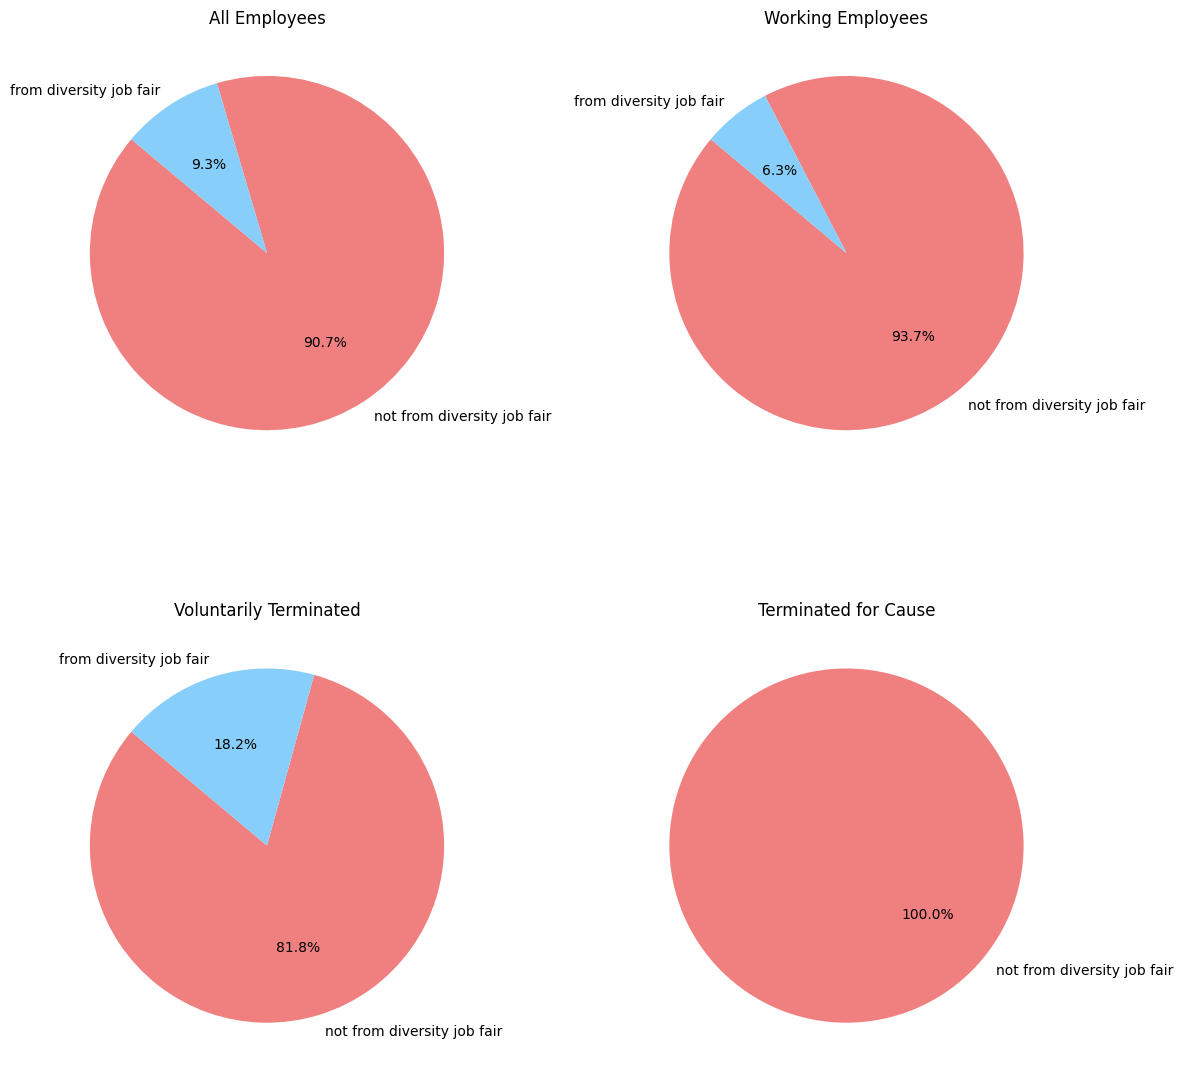

In [98]:
cnt = df['FromDiversityJobFairID'].value_counts()
cnt1 = working['FromDiversityJobFairID'].value_counts()
cnt2 = voluntarily['FromDiversityJobFairID'].value_counts()
cnt3 = terminated['FromDiversityJobFairID'].value_counts()

label_mapping = {0: 'not from diversity job fair', 1: 'from diversity job fair'}
colors = ['lightcoral', 'lightskyblue']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].pie(cnt, labels=cnt.index.map(label_mapping), colors=colors, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('All Employees')

axes[0, 1].pie(cnt1, labels=cnt1.index.map(label_mapping), colors=colors, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Working Employees')

axes[1, 0].pie(cnt2, labels=cnt2.index.map(label_mapping), colors=colors, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Voluntarily Terminated')

axes[1, 1].pie(cnt3, labels=cnt3.index.map(label_mapping), colors=colors, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Terminated for Cause')


plt.tight_layout()

plt.show()

- 모두 압도적으로 Job-Fair가 아닌 곳에서 구직함

## 2-2 통계검정
- H0(귀무가설) : "FromDiversityJobFairID"와 "EmploymentStatus" 간에는 관계가 없다 (독립적이다).
- H1(대립가설) : "FromDiversityJobFairID"와 "EmploymentStatus" 간에는 관계가 있다 (독립적이지 않다).

In [99]:
# 범주형 변수 간의 관계 파악 -> 카이제곱 검정
from scipy.stats import chi2_contingency

observed = pd.crosstab(df['FromDiversityJobFairID'],df['EmploymentStatus'])

chi2, p, _, _ = chi2_contingency(observed)
print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")

Chi-squared: 12.079314737645149
p-value: 0.0023823750497604106


- Chi-squared값을 보면 두 변수 간의 관계가 독립적이지 않다
- p-value값이 유의수준(0.05)보다 작으므로, 귀무가설 기각, 따라서 대립가설 지지

## 2-3 결론
다양성 채용 박람회를 통해 채용된 직원들은 그렇지 않은 직원에 비해 EmploymentStatus (퇴사 상태)가 다를 가능성이 있다"는 것을 시사한다. 다양성 채용 박람회를 통해 채용된 직원과 그렇지 않은 직원 간의 퇴사율에 차이가 있을 수 있다.

## 2-4 재직 상태 별 구직 경로 비교

### 2-4-1 재직 상태 별 구직 경로 비교 분석

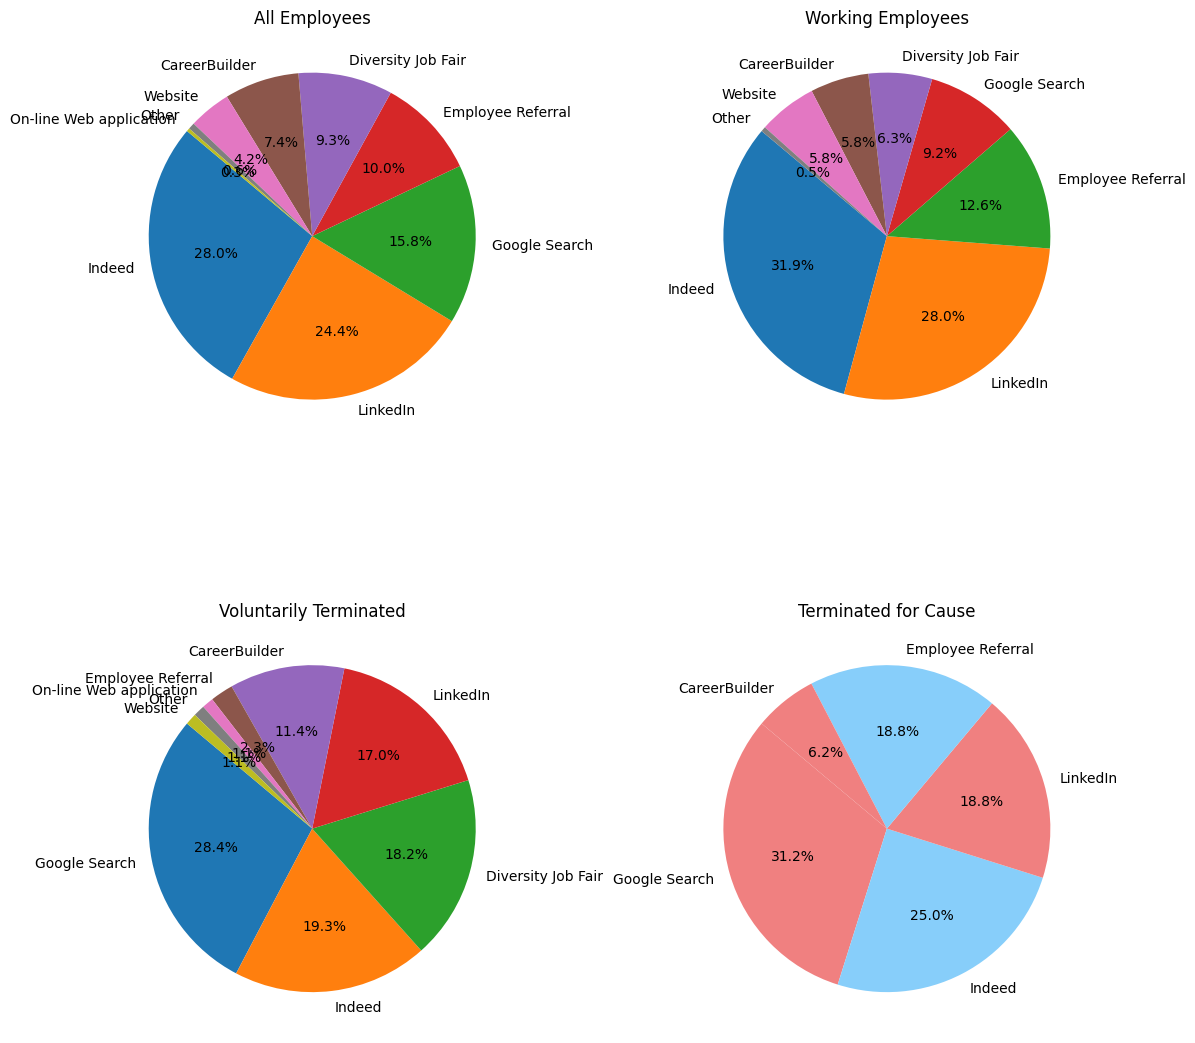

In [100]:
cnt = df['RecruitmentSource'].value_counts()
cnt1 = working['RecruitmentSource'].value_counts()
cnt2 = voluntarily['RecruitmentSource'].value_counts()
cnt3 = terminated['RecruitmentSource'].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].pie(cnt, labels=cnt.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('All Employees')

axes[0, 1].pie(cnt1, labels=cnt1.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Working Employees')

axes[1, 0].pie(cnt2, labels=cnt2.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Voluntarily Terminated')

axes[1, 1].pie(cnt3, labels=cnt3.index, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Terminated for Cause')


plt.tight_layout()

plt.show()

In [102]:
recruitment_counts = df.groupby('EmploymentStatus')['RecruitmentSource'].value_counts()
recruitment_counts

EmploymentStatus        RecruitmentSource      
Active                  Indeed                     66
                        LinkedIn                   58
                        Employee Referral          26
                        Google Search              19
                        Diversity Job Fair         13
                        CareerBuilder              12
                        Website                    12
                        Other                       1
Terminated for Cause    Google Search               5
                        Indeed                      4
                        Employee Referral           3
                        LinkedIn                    3
                        CareerBuilder               1
Voluntarily Terminated  Google Search              25
                        Indeed                     17
                        Diversity Job Fair         16
                        LinkedIn                   15
                        CareerBuil

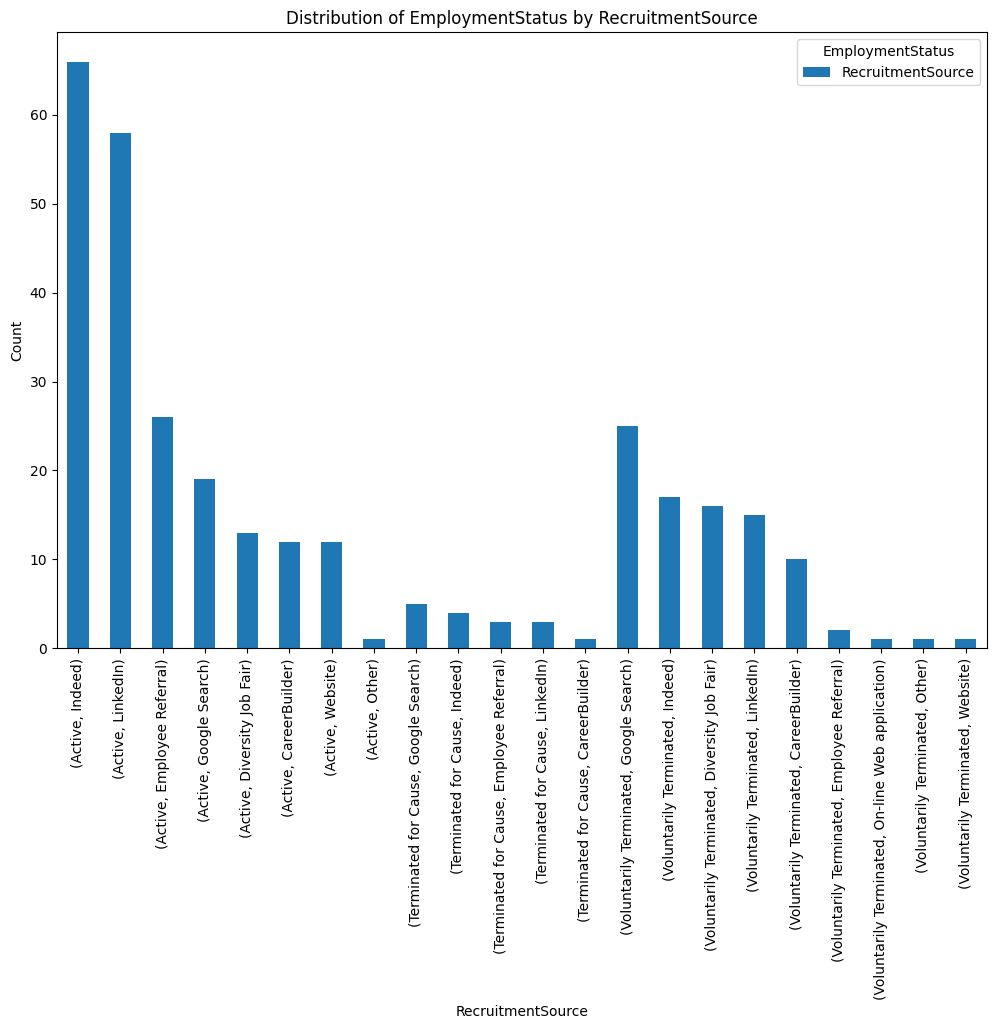

In [110]:
fig, ax = plt.subplots(figsize=(12, 8))
recruitment_counts.plot(kind='bar', stacked=True, ax=ax)

plt.title('Distribution of EmploymentStatus by RecruitmentSource')
plt.xlabel('RecruitmentSource')
plt.ylabel('Count')
plt.legend(title='EmploymentStatus')

plt.show()

- 재직중인 사람들은 Indeed > LinkedIn > EmployeeReferral > Google Search > Diversity job Fair > CareerBuilder > Website > Other > On-line Web application순으로 취업경로를 보인다.

- 자발적 퇴사자의 경우 Google Search > Indeed > Diversity Job Fair > LinkedIn > CareerBuilder > Employee Referral > 그 외 순으로 취업한 경로를 나타낸다.

- 비자발적 퇴사자의 경우 Google Search > Indeed > LinkedIn, Employee Referral > CareerBuilder순으로 취업한 경로를 나타낸다.

- Diversity Job Fair를 제외하고 나머지들의 비율이 큰 것을 봤을 때, 사람들은 Job-Fair보다는 편한 경로를 통해 취업하는 것으로 보인다.



### 2-4-2 통계검정

In [101]:
observed = pd.crosstab(df['RecruitmentSource'],df['EmploymentStatus'])

chi2, p, _, _ = chi2_contingency(observed)
print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")

Chi-squared: 52.2665516541429
p-value: 9.920012686262753e-06


- H0(귀무가설) : "RecruitmentSource"와 "EmploymentStatus" 간에는 관계가 없다 (독립적이다).
- H1(대립가설) : "FromDiversityJobFairID"와 "EmploymentStatus" 간에는 관계가 있다 (독립적이지 않다).
- Chi-squared 값이 52.2666로 나왔습니다. 이 값은 두 변수 간의 관계가 독립적이지 않다는 방향으로 향하는 강력한 증거를 나타낸다.
- p-value가 9.92e-06 (약 0.00000992)로 매우 작게 나왔습니다. 이 값은 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각할 충분한 통계적 증거가 있다. 따라서, "RecruitmentSource"와 "EmploymentStatus" 간에는 통계적으로 유의한 관계가 있다고 할 수 있다.
- H1(대립가설)을 지지하며, "RecruitmentSource"간에는 통계적으로 유의한 관계가 있음을 시사한다.

## 2-5 취업경로와 퇴사원인 사이 관계

### 2-5-1 취업경로와 퇴사원인 사이 관계 분석

In [104]:
working = df['EmploymentStatus'] == 'Active'
# 자발적 퇴사자
volutarily_termed = df['EmploymentStatus'] == 'Voluntarily Terminated'
# 비자발적 퇴사자
terminated = df['EmploymentStatus'] == 'Terminated for Cause'

df4 = df[~working]

group_counts = df4.groupby(['RecruitmentSource','EmploymentStatus'])['TermReason'].value_counts()
group_counts

RecruitmentSource        EmploymentStatus        TermReason                      
CareerBuilder            Terminated for Cause    attendance                          1
                         Voluntarily Terminated  more money                          2
                                                 unhappy                             2
                                                 career change                       1
                                                 hours                               1
                                                 maternity leave - did not return    1
                                                 medical issues                      1
                                                 retiring                            1
                                                 return to school                    1
Diversity Job Fair       Voluntarily Terminated  Another position                    6
                                                

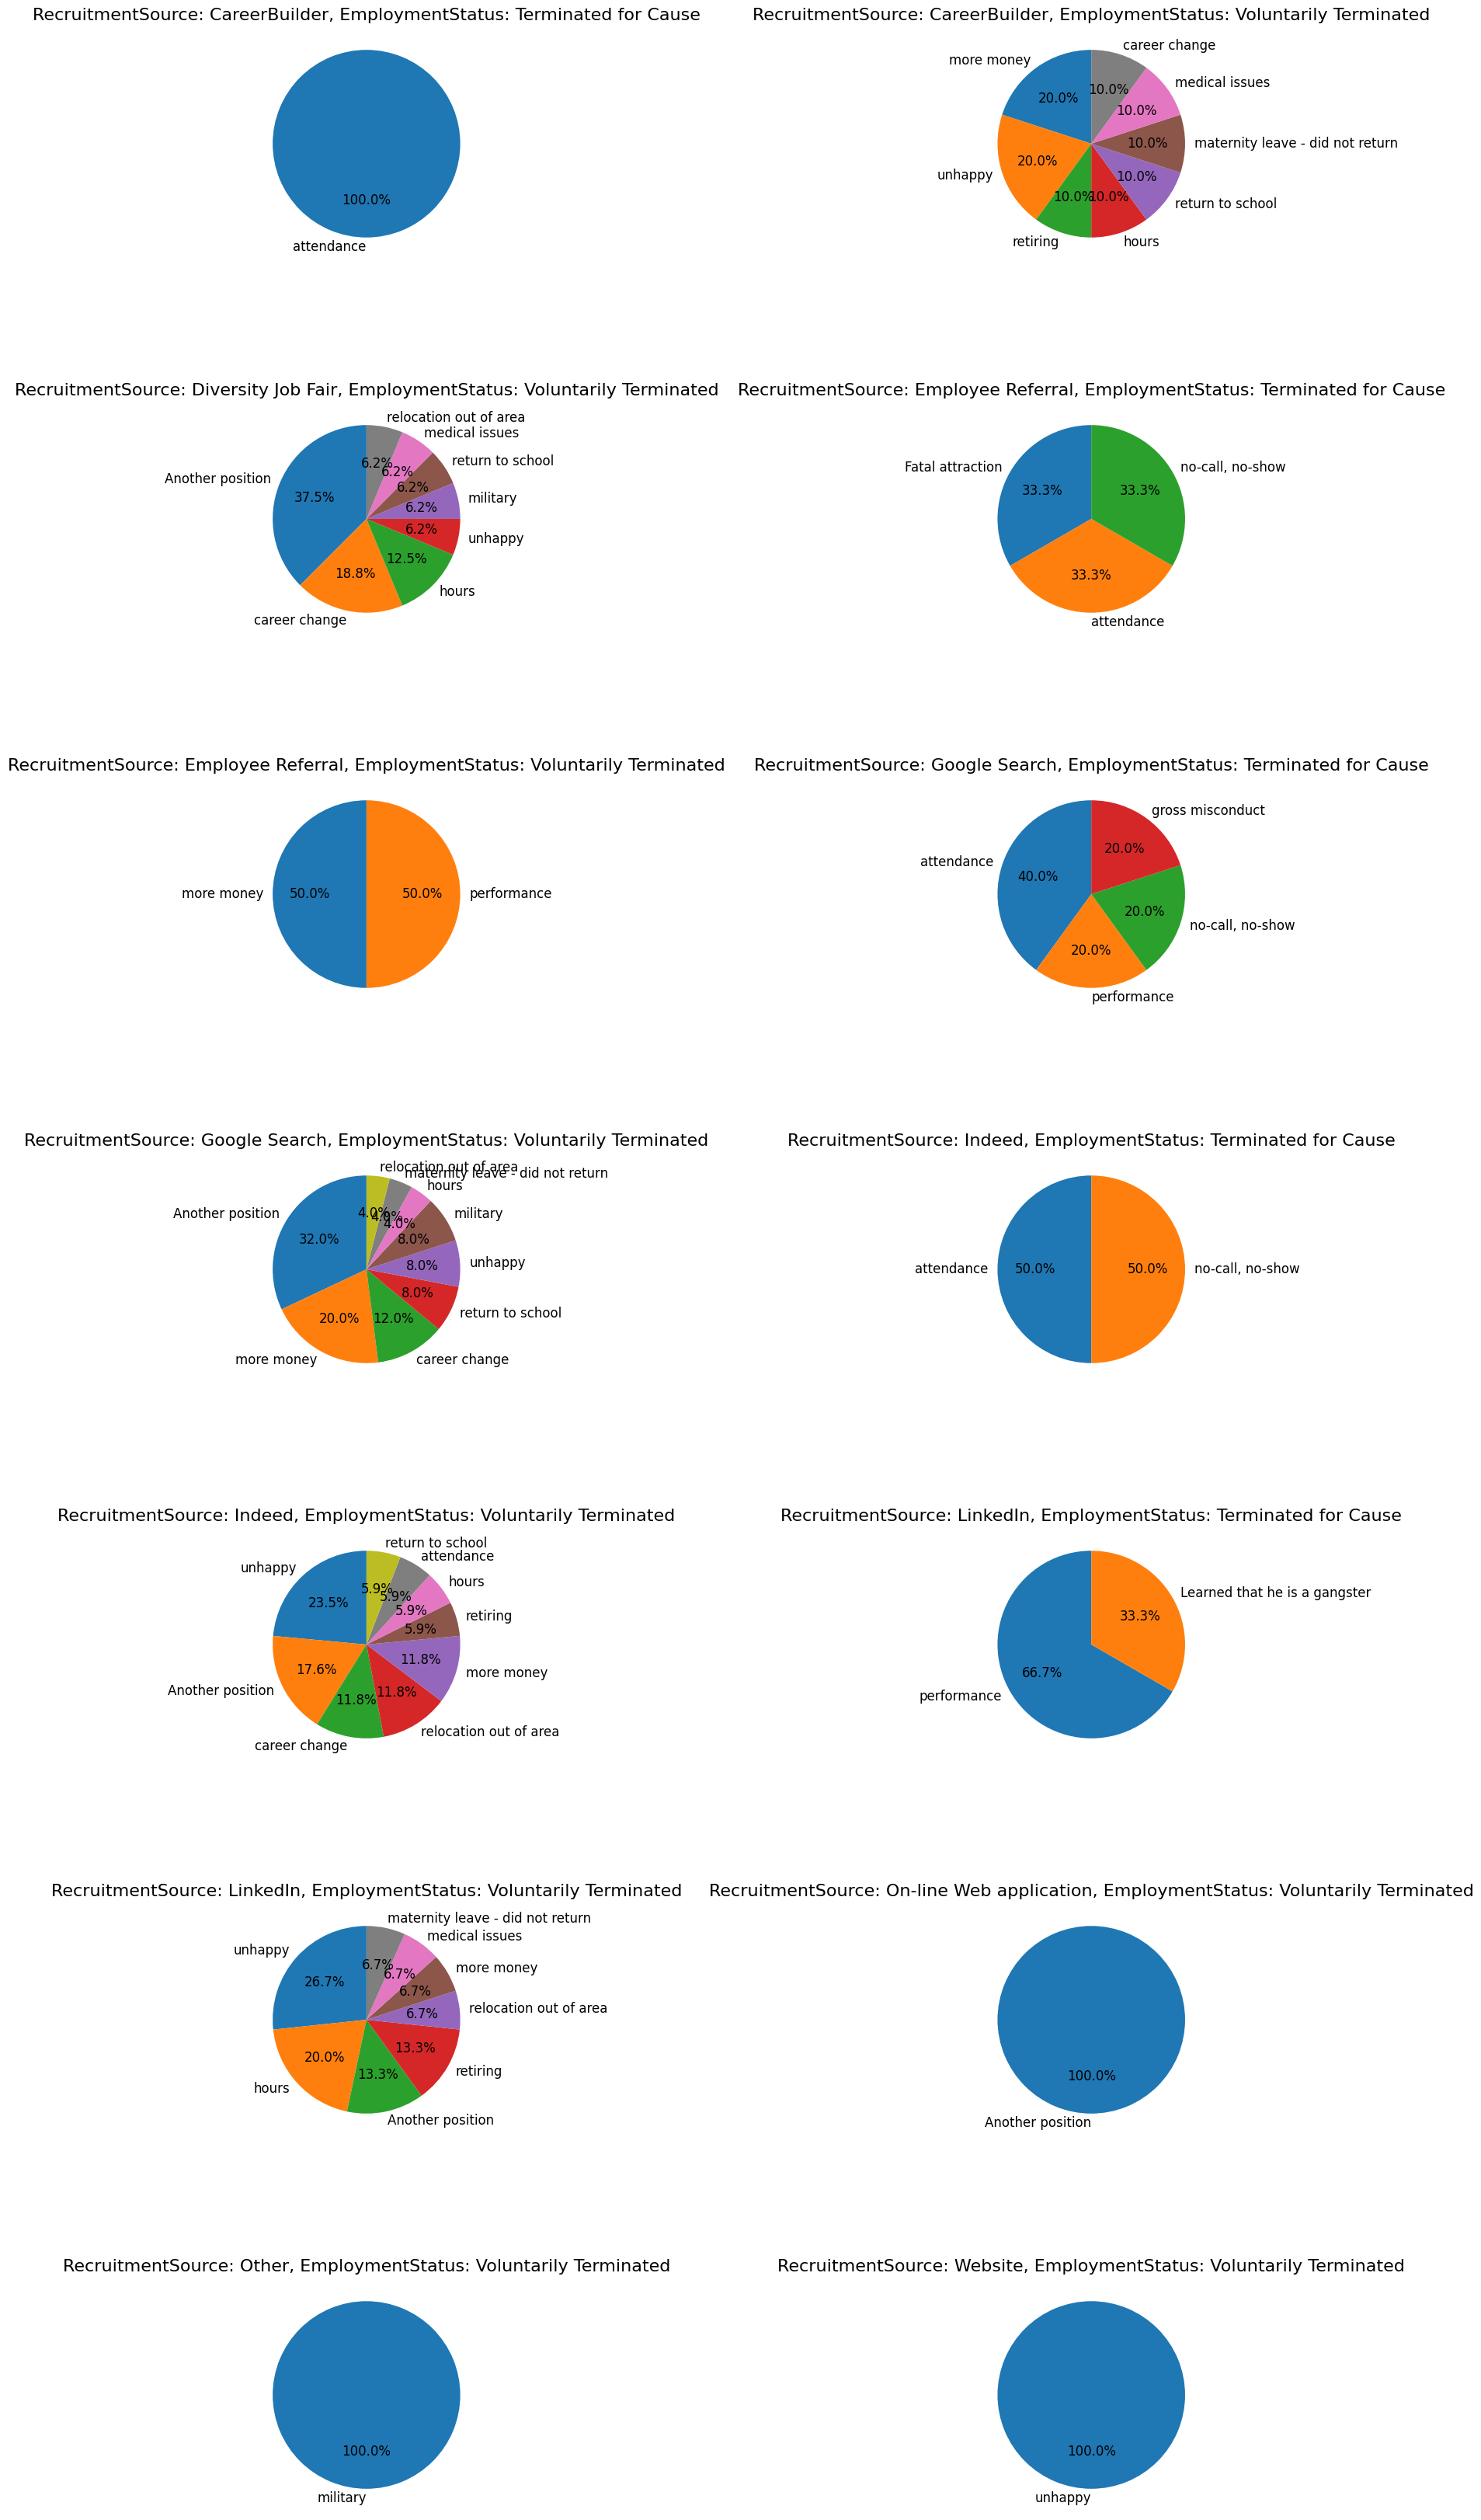

In [105]:
fig, axes = plt.subplots(7, 2, figsize=(20, 40))
axes = axes.flatten()

for i, (group_name, group_df) in enumerate(df4.groupby(['RecruitmentSource', 'EmploymentStatus'])):
    term_reason_counts = group_df['TermReason'].value_counts()

    wedges, texts, autotexts = axes[i].pie(term_reason_counts, labels=term_reason_counts.index, autopct='%1.1f%%', startangle=90)

    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(12)

    axes[i].set_title(f'RecruitmentSource: {group_name[0]}, EmploymentStatus: {group_name[1]}', fontsize=16)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

plt.show()

### 2-5-2 통계검정

- H0(귀무가설) : 취업경로와 퇴사원인 사이는 관계가 없다.
- H1(대립가설) : 취업경로와 퇴사원인 사이는 관계가 있을 것이다.

In [107]:
observed = pd.crosstab(df4['RecruitmentSource'], df4['TermReason'])

chi2, p, _, _ = chi2_contingency(observed)
print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")

Chi-squared: 125.55349821655018
p-value: 0.5446448616100513


- p-value 값이 유의수준 (0.05)보다 크므로 귀무가설 기각할 수 없다. 따라서 귀무가설 채택
두 변수는 독립적으로 서로 연관성이 없다.
- 취업경로와 퇴사원인은 연관이 없다.

# 3. 결근이 퇴사율에 미치는 영향


## 3-1 가설 : 결근 횟수가 많은 직원들은 결근 횟수가 적은 직원들보다 퇴사(해고)될 확률이 더 높을 것이다.

In [111]:
df.groupby('EmploymentStatus')['Absences'].value_counts().sort_index()

EmploymentStatus        Absences
Active                  1           11
                        2           15
                        3           12
                        4           18
                        5            8
                        6            9
                        7           14
                        8            8
                        9            8
                        10           6
                        11          10
                        12           5
                        13          13
                        14          14
                        15          13
                        16          12
                        17           8
                        18           5
                        19          10
                        20           8
Terminated for Cause    2            1
                        3            1
                        6            1
                        7            2
                        8      

In [ ]:
active = df[working]
voluntarily = df[volutarily_termed]
terminated = df[terminated]

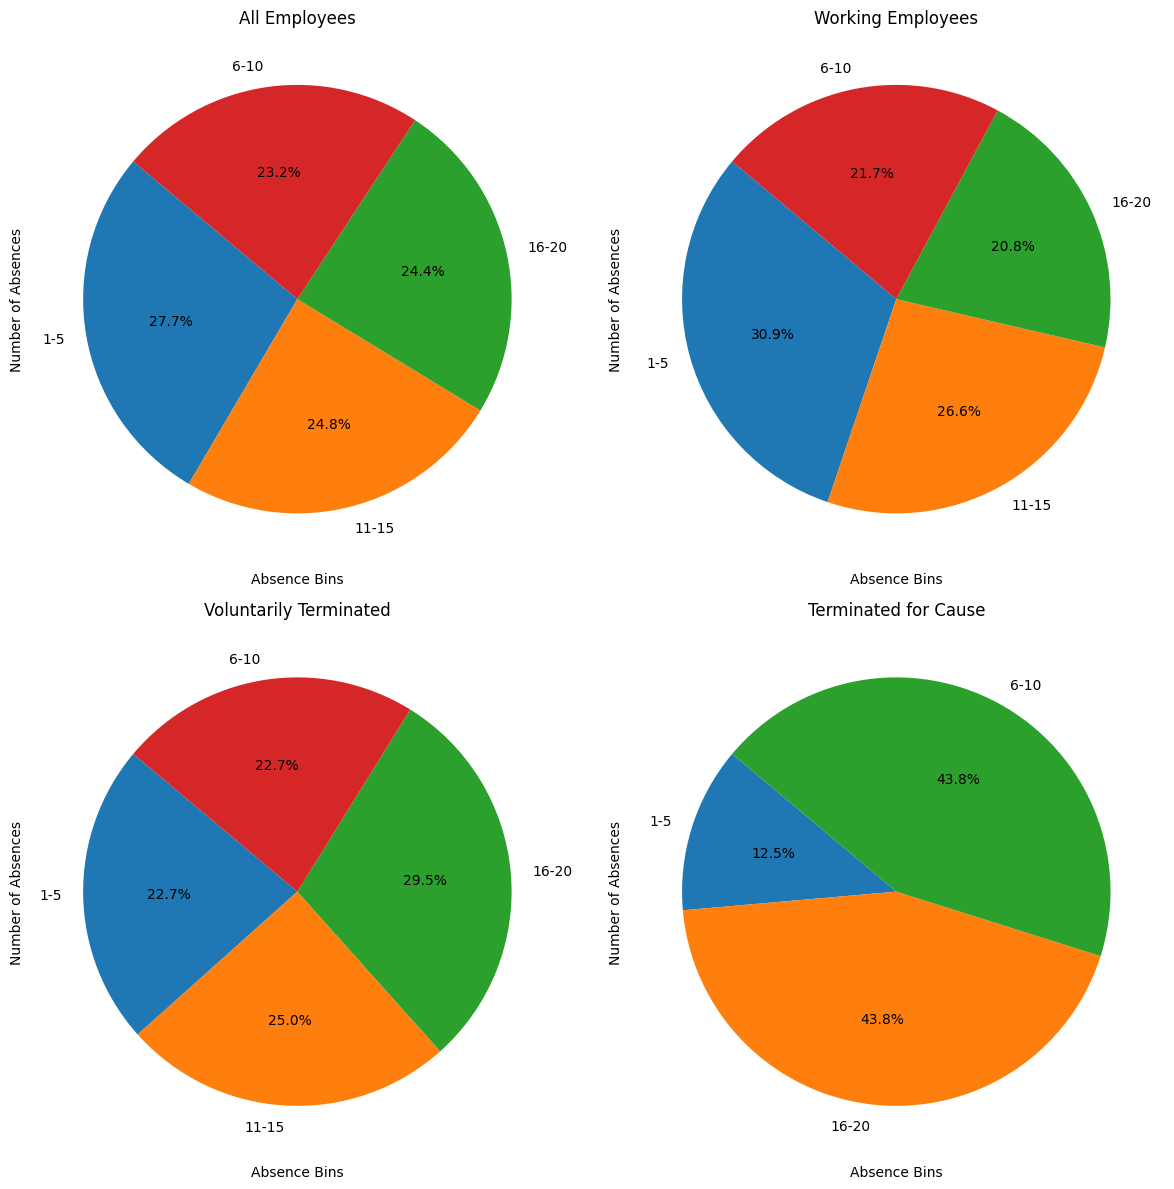

In [113]:
def attendance_bins(row):
  if 1<= row <= 5 : return '1-5'
  if 6<= row <= 10 : return '6-10'
  if 11<= row <= 15 : return '11-15'
  if 16<= row <= 20 : return '16-20'

df5 = df.copy()
df5['Absence_Bins'] = df5['Absences'].apply(attendance_bins)

working_copy = df5[df5['EmploymentStatus']=='Active']
voluntarily_copy = df5[df5['EmploymentStatus']=='Voluntarily Terminated']
terminated_copy = df5[df5['EmploymentStatus']=='Terminated for Cause']

cnt = df5['Absence_Bins'].value_counts().sort_index()
cnt1 = working_copy['Absence_Bins'].value_counts().sort_index()
cnt2 = voluntarily_copy['Absence_Bins'].value_counts().sort_index()
cnt3 = terminated_copy['Absence_Bins'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].pie(cnt.values, labels=cnt.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('All Employees')

axes[0, 1].pie(cnt1.values, labels=cnt1.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Working Employees')

axes[1, 0].pie(cnt2.values, labels=cnt2.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Voluntarily Terminated')

axes[1, 1].pie(cnt3.values, labels=cnt3.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Terminated for Cause')

for ax in axes.flat:
    ax.set(xlabel='Absence Bins', ylabel='Number of Absences')

plt.tight_layout()

plt.show()

- 퇴사자의 경우 결근 횟수가 더 많다.
- 위의 그래프를 보면 해고당한 사람의 경우 결근일수가 많은 것을 확인할 수 있다.

## 3-2 통계검정


In [114]:
# ANOVA
groups = df.groupby('EmploymentStatus')['Absences'].apply(list)
anova_result = stats.f_oneway(groups['Active'], groups['Voluntarily Terminated'], groups['Terminated for Cause'])
anova_result_statistic = anova_result.statistic
anova_result_pvalue = anova_result.pvalue

# 선형 회귀 모델 사용하여 ANOVA 수행
model = ols('Absences ~ C(EmploymentStatus)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('ANOVA statistic:', anova_result_statistic)
print('ANOVA p-value:', anova_result_pvalue)
print('ANOVA table:\n', anova_table)

ANOVA statistic: 1.5758391039838497
ANOVA p-value: 0.20849689596912402
ANOVA table:
                            sum_sq     df         F    PR(>F)
C(EmploymentStatus)    107.554476    2.0  1.575839  0.208497
Residual             10510.837807  308.0       NaN       NaN


In [115]:
df.groupby('EmploymentStatus')['Absences'].mean()

EmploymentStatus
Active                     9.830918
Terminated for Cause      11.562500
Voluntarily Terminated    10.954545
Name: Absences, dtype: float64

- H0(귀무가설) : 재직상태에 따라 결근일수의 평균이 같다.
- H1(대립가설) : 재직상태에 따라 결근일수의 평균이 다르다.
- 유의수준(0.05)보다 크다, 귀무가설 기각 못함
- 재직 상태에 따른 결근일수의 평균에는 통계적으로 유의미한 차이가 없다.

In [116]:
import numpy as np
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [117]:
# Kruskal-Wallis H-test 수행

kruskal_result = kruskal(*groups)
kruskal_result_statistic = kruskal_result.statistic
kruskal_result_pvalue = kruskal_result.pvalue

print(kruskal_result_statistic)
print(kruskal_result_pvalue)

3.522127728606208
0.17186192876019227


In [118]:
df.groupby('EmploymentStatus')['Absences'].median()

EmploymentStatus
Active                    10.0
Terminated for Cause       9.5
Voluntarily Terminated    11.0
Name: Absences, dtype: float64

- H0(귀무가설) : 재직상태에 따라 결근일수의 중앙값이 같다.
- H1(대립가설) : 재직상태에 따라 결근일수의 중앙값이 다르다.
- p-value, 유의수준(0.05)보다 크다 -> 귀무가설 기각 못함
- 결근일수의 중앙값에 통계적으로 유의미한 차이가 없다.

In [119]:
# 선형회귀
# One-Hot-Encoding
ct = ColumnTransformer([("encoder", OneHotEncoder(), ['EmploymentStatus'])], remainder='passthrough')
linear_model = Pipeline([('transform', ct), ('linear_regression', LinearRegression())])

# 독립변수, 종속변수 나누기
X = df[['EmploymentStatus']]
y = df['Absences']
linear_model.fit(X, y)

# 회귀 계수 추출
coefs = linear_model.named_steps['linear_regression'].coef_
print(coefs)
print()

# t-test
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_encoded_with_constant = sm.add_constant(X_encoded)
model = sm.OLS(y,X_encoded_with_constant).fit()

model_summary = model.summary()
print(model_summary)

t_test_results = model.t_test(np.eye(len(model.params)))
t_test_results_summary = t_test_results.summary_frame()
print(t_test_results_summary)

[-9.03993047e+14 -9.03993047e+14 -9.03993047e+14]

                            OLS Regression Results                            
Dep. Variable:               Absences   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.576
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.208
Time:                        03:40:13   Log-Likelihood:                -988.71
No. Observations:                 311   AIC:                             1983.
Df Residuals:                     308   BIC:                             1995.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- 모델 전체 : p-value가 0.208로, 일반적인 0.05의 유의 수준에서는 'EmploymentStatus'가 'Absences'를 예측하는 데 유의미한 영향을 미치지 않는다.
- 계수에 대한 p-value값은 0.05 이하로 'EmploymentStatus' 범주가 'Absences'에 통계적으로 유의미한 영향을 미친다. (즉, 각각의 범주에 대해 영향을 미친다는 것으로 볼 수 있음)
- 개별적인 'EmploymentStatus' 범주는 'Absences'에 영향을 미칠 수 있지만, 모델 전체로는 충분히 설명력이 있는 것으로 나타나지 않는다.


## 3-3 결론

- 위의 그래프를 보면 해고당한 사람의 경우 결근일수가 많은 것을 확인할 수 있다.
- 시각화자료와 통계자료를 보면 결근일수가 어느정도 퇴사에 영향을 미친 것으로 볼 수 있다. 특히 해고당한 사람들의 퇴사 이유를 봤을 때, 출근일수와 no-call, no-show 이유가 많았던것을 보아 불성실함이 해고에 어느정도 영향을 끼친다고 볼 수 있다.

# 4. 최근 한달 간의 지각일수가 퇴사율에 영향을 미치는지


## 4-1 가설 : 최근 30일 동안 지각한 일수가 많은 사람들은 안그런 사람들보다 퇴사할 확률이 더 높을 것이다.

In [120]:
df.groupby('EmploymentStatus')['DaysLateLast30'].value_counts().sort_index()

EmploymentStatus        DaysLateLast30
Active                  0                 190
                        2                   6
                        3                   3
                        4                   4
                        5                   1
                        6                   3
Terminated for Cause    0                   9
                        4                   3
                        5                   3
                        6                   1
Voluntarily Terminated  0                  79
                        1                   1
                        3                   3
                        4                   1
                        5                   2
                        6                   2
Name: DaysLateLast30, dtype: int64

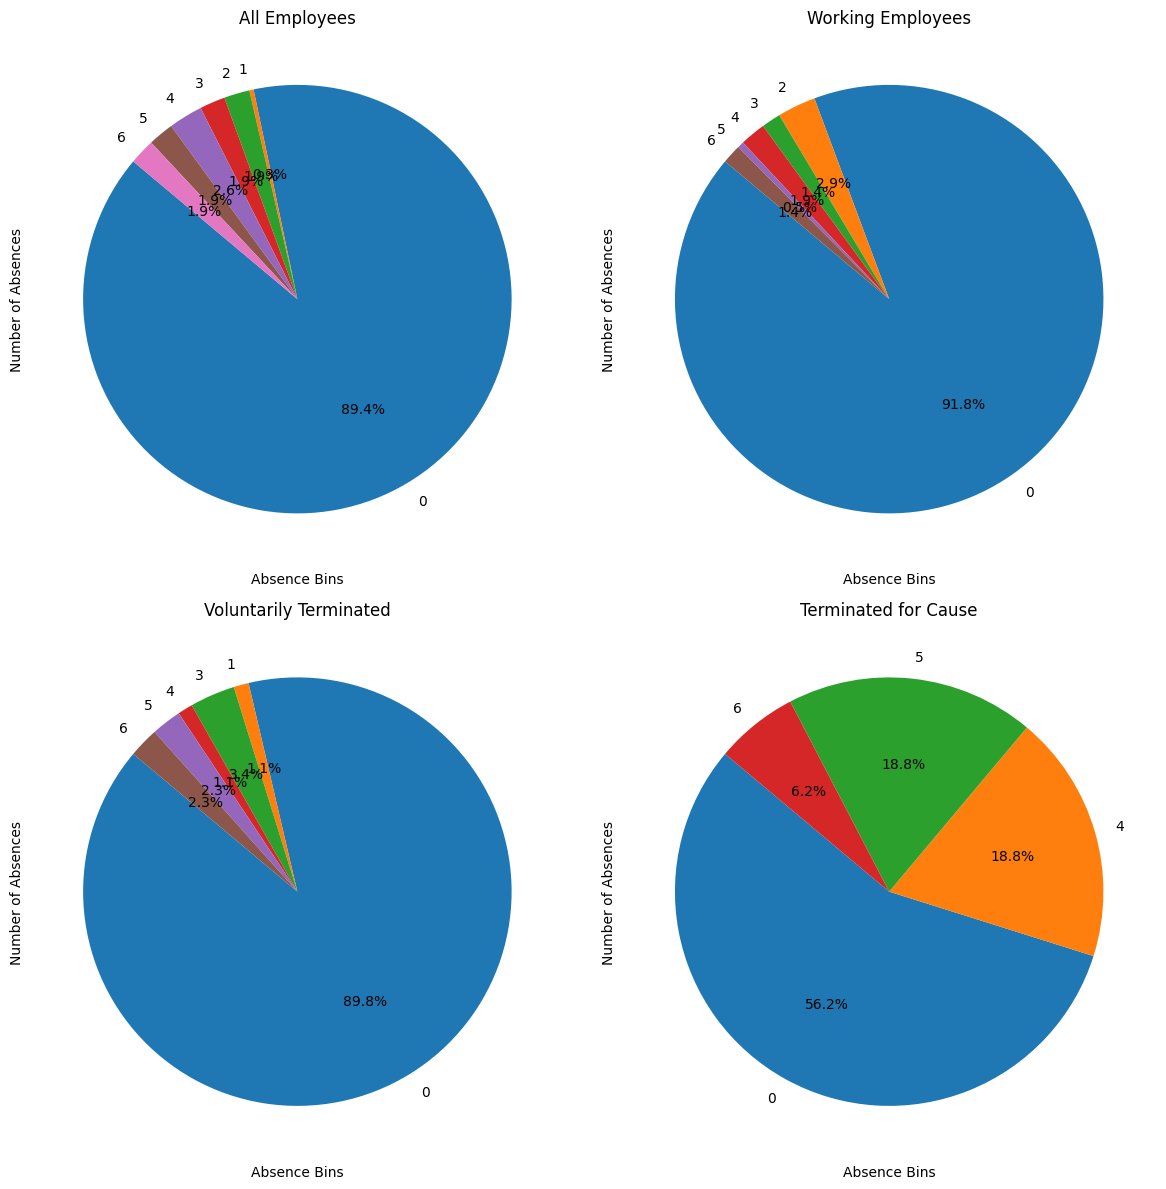

In [121]:
df6 = df.copy()

working_copy = df6[df6['EmploymentStatus']=='Active']
voluntarily_terminated_copy = df6[df6['EmploymentStatus']=='Voluntarily Terminated']
terminated_for_cause_copy = df6[df6['EmploymentStatus']=='Terminated for Cause']

cnt = df3['DaysLateLast30'].value_counts().sort_index()
cnt1 = working_copy['DaysLateLast30'].value_counts().sort_index()
cnt2 = voluntarily_terminated_copy['DaysLateLast30'].value_counts().sort_index()
cnt3 = terminated_for_cause_copy['DaysLateLast30'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].pie(cnt.values, labels=cnt.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('All Employees')

axes[0, 1].pie(cnt1.values, labels=cnt1.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Working Employees')

axes[1, 0].pie(cnt2.values, labels=cnt2.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Voluntarily Terminated')

axes[1, 1].pie(cnt3.values, labels=cnt3.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Terminated for Cause')

for ax in axes.flat:
    ax.set(xlabel='Absence Bins', ylabel='Number of Absences')

plt.tight_layout()

plt.show()

## 4-2 통계검정

In [122]:
# ANOVA
groups = df.groupby('EmploymentStatus')['DaysLateLast30'].apply(list)
anova_result = stats.f_oneway(groups['Active'], groups['Voluntarily Terminated'], groups['Terminated for Cause'])
anova_result_statistic = anova_result.statistic
anova_result_pvalue = anova_result.pvalue

# 선형 회귀 모델 사용하여 ANOVA 수행
model = ols('DaysLateLast30 ~ C(EmploymentStatus)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('ANOVA statistic:', anova_result_statistic)
print('ANOVA p-value:', anova_result_pvalue)
print('ANOVA table:\n', anova_table)

ANOVA statistic: 15.201692612003727
ANOVA p-value: 5.056694499338382e-07
ANOVA table:
                          sum_sq     df          F        PR(>F)
C(EmploymentStatus)   46.673038    2.0  15.201693  5.056694e-07
Residual             472.818923  308.0        NaN           NaN


In [123]:
df.groupby('EmploymentStatus')['DaysLateLast30'].mean()

EmploymentStatus
Active                    0.289855
Terminated for Cause      2.062500
Voluntarily Terminated    0.409091
Name: DaysLateLast30, dtype: float64

- 유의수준(0.05)보다 작으므로 재직상태에 따라 평균 최근결근 일수는 차이가 있다.

In [124]:
# Kruskal-Wallis H-test 수행

kruskal_result = kruskal(*groups)
kruskal_result_statistic = kruskal_result.statistic
kruskal_result_pvalue = kruskal_result.pvalue

print(kruskal_result_statistic)
print(kruskal_result_pvalue)

21.506647595039272
2.137424645094931e-05


In [125]:
df.groupby('EmploymentStatus')['DaysLateLast30'].median()

EmploymentStatus
Active                    0.0
Terminated for Cause      0.0
Voluntarily Terminated    0.0
Name: DaysLateLast30, dtype: float64

In [126]:
# 선형회귀
# One-Hot-Encoding
ct = ColumnTransformer([("encoder", OneHotEncoder(), ['EmploymentStatus'])], remainder='passthrough')
linear_model = Pipeline([('transform', ct), ('linear_regression', LinearRegression())])

# 독립변수, 종속변수 나누기
X = df[['EmploymentStatus']]
y = df['DaysLateLast30']
linear_model.fit(X, y)

# 회귀 계수 추출
coefs = linear_model.named_steps['linear_regression'].coef_
print(coefs)
print()

# t-test
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_encoded_with_constant = sm.add_constant(X_encoded)
model = sm.OLS(y,X_encoded_with_constant).fit()

model_summary = model.summary()
print(model_summary)

t_test_results = model.t_test(np.eye(len(model.params)))
t_test_results_summary = t_test_results.summary_frame()
print(t_test_results_summary)

[-3.42153593e+13 -3.42153593e+13 -3.42153593e+13]

                            OLS Regression Results                            
Dep. Variable:         DaysLateLast30   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     15.20
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           5.06e-07
Time:                        03:44:30   Log-Likelihood:                -506.43
No. Observations:                 311   AIC:                             1019.
Df Residuals:                     308   BIC:                             1030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- F-statistic: 15.20. 모델이 통계적으로 유의미하다
- Prob (F-statistic): 5.06e-07. 이 값은 모델 전체가 통계적으로 유의미하다는 것을 나타내며, 일반적인 유의 수준 0.05에서 통계적으로 유의미하다.
- 회귀 계수
  - x1, x2, x3의 계수 모두 통계적으로 유의미
- EmploymentStatus'의 각 범주는 'DaysLateLast30'에 통계적으로 유의미한 영향을 미친다. 계수 값에 따라, 각 범주가 'DaysLateLast30'에 미치는 영향의 방향과 크기가 다르다. (x2 혼자 양수)

In [127]:
df[(df['DaysLateLast30']>=4) & (df['EmploymentStatus']=='Terminated for Cause')]['TermReason'].value_counts()

attendance          3
performance         2
no-call, no-show    1
Fatal attraction    1
Name: TermReason, dtype: int64

- 해고당한 사람 중 최근 한달 동안 결근일수가 많았던 사람들의 퇴사 이유를 보면 결근 원인이 대다수이다.

# 5. 자발적 퇴사와 급여 관계


## 5-1 가설 : 자발적으로 퇴사한 직원들은 부서 평균 급여보다 낮은 급여를 받을 것이다.



### 5-1-1 자발적 퇴사자와 재직중인 사람들의 연봉 비교

In [128]:
def age_bins(row):
  if 30 <= row <= 39 : return '30s'
  if 40 <= row <= 49 : return '40s'
  if 50 <= row <= 59 : return '50s'
  if 60 <= row <= 69 : return '60s'
  if 70 <= row <= 79 : return '70s'

def salary_bins(row):
  if 40000 <= row < 50000 : return '40T$'
  if 50000 <= row < 60000 : return '50T$'
  if 60000 <= row < 70000 : return '60T$'
  if 70000 <= row < 80000 : return '70T$'
  if 80000 <= row < 90000 : return '80T$'
  if 90000 <= row < 100000 : return '90T$'
  if 100000 <= row < 150000 : return '100T$ more'

In [129]:
employee = df[(df['EmploymentStatus']=='Active')|(df['EmploymentStatus']=='Voluntarily Terminated')]
employee['Age_Bins'] = df['Age'].apply(age_bins)
employee['Salary_Bins'] = df['Salary'].apply(salary_bins)

<ipython-input-129-389aa24a060d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee['Age_Bins'] = df['Age'].apply(age_bins)
<ipython-input-129-389aa24a060d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee['Salary_Bins'] = df['Salary'].apply(salary_bins)


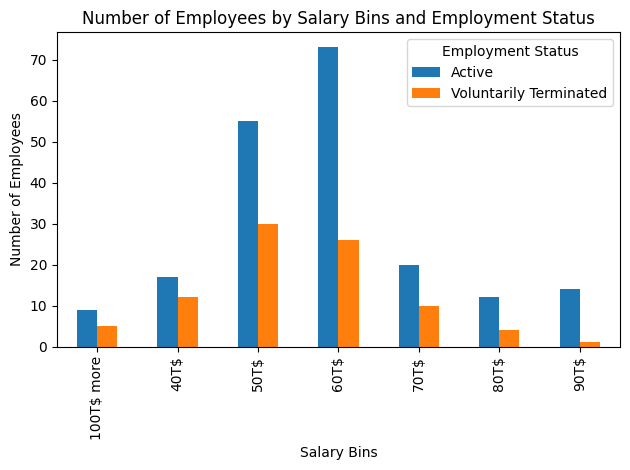

In [130]:
grouped = employee.groupby('Salary_Bins')['EmploymentStatus'].value_counts().unstack()
grouped.plot(kind='bar',stacked=False)
plt.title('Number of Employees by Salary Bins and Employment Status')
plt.xlabel('Salary Bins')
plt.ylabel('Number of Employees')
plt.legend(title='Employment Status', loc='upper right')
plt.tight_layout()
plt.show()

- 재직중인 사람들도 50000~60000$대에 많이 분포한다.
- Salaray와 Employment Status 사이의 연관성은 없어보인다.

### 5-1-2 통계검정

In [131]:
model = ols('Salary ~ C(EmploymentStatus)', data=employee[['EmploymentStatus','Salary']]).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

                           sum_sq     df         F    PR(>F)
C(EmploymentStatus)  2.809137e+09    1.0  4.480729  0.035122
Residual             1.836927e+11  293.0       NaN       NaN


- p-value가 0.05보다 작으므로, 통계적으로 유의미한 수준에서 'EmploymentStatus' 범주 간에 'Salary' 평균에 유의미한 차이가 있다고 볼 수 있다.


### 5-1-3 부사별 자발적 퇴사자와 재직자의 평균 연봉 비교

In [132]:
grouped = employee.groupby(['EmploymentStatus','Department'])['Salary'].mean()
grouped

EmploymentStatus        Department          
Active                  Admin Offices            77315.285714
                        Executive Office        250000.000000
                        IT/IS                    94512.075000
                        Production               60419.261905
                        Sales                    69088.846154
                        Software Engineering     93262.571429
Voluntarily Terminated  Admin Offices            55000.000000
                        IT/IS                   105056.166667
                        Production               59125.266667
                        Sales                    71677.333333
                        Software Engineering     97588.666667
Name: Salary, dtype: float64

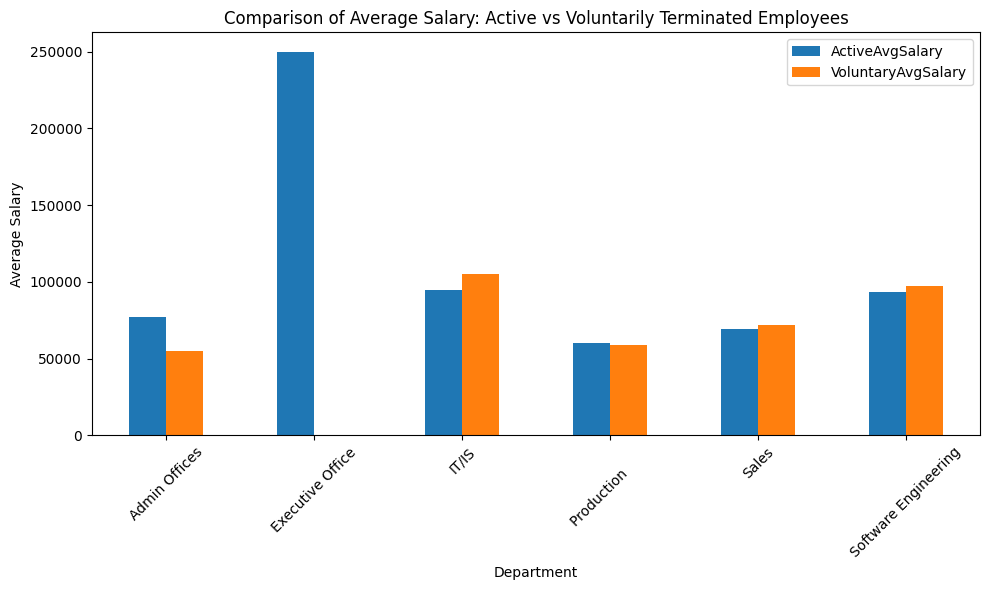

In [133]:
# 'Active' 상태인 직원들의 부서별 평균 급여
active_avg_salary = df[df['EmploymentStatus'] == 'Active'].groupby('Department')['Salary'].mean()

# 'Voluntarily Terminated' 상태인 직원들의 부서별 평균 급여
voluntary_avg_salary = df[df['EmploymentStatus'] == 'Voluntarily Terminated'].groupby('Department')['Salary'].mean()

# 두 평균을 비교하는 데이터프레임 생성
comparison_df = pd.DataFrame({
    'ActiveAvgSalary': active_avg_salary,
    'VoluntaryAvgSalary': voluntary_avg_salary
})

# 누락된 값이 있다면 처리 (예: 특정 부서에 'Voluntarily Terminated' 직원이 없을 경우)
comparison_df.fillna(0, inplace=True)

comparison_df.plot(kind='bar', figsize=(10, 6))

plt.title('Comparison of Average Salary: Active vs Voluntarily Terminated Employees')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()


- 재직중인 직원과 자발적 퇴사자의 평균 급여를 비교하면 자발적 퇴사자의 평균 급여가 더 높은 부서가 많다. IT/IS, Sales, Software Engineering의 경우 자발적 퇴사자의 평균 연봉이 더 높다.

### 5-1-4 통계검정

In [134]:
department_means = employee.groupby('Department')['Salary'].mean()
voluntary_resignation = employee[employee['EmploymentStatus'] == 'Voluntarily Terminated']
voluntary_resignation = voluntary_resignation.merge(department_means.rename('DeptMeanSalary'), on='Department')

model = ols('Salary ~ C(Department) + DeptMeanSalary', data=voluntary_resignation).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                      sum_sq    df          F        PR(>F)
C(Department)   9.724922e+08   4.0   2.092689  8.905502e-02
DeptMeanSalary  1.143379e+10   1.0  98.416648  9.469503e-16
Residual        9.642721e+09  83.0        NaN           NaN


- 부서별 평균 급여(DeptMeanSalary)는 급여에 대해 매우 유의미한 영향을 미치고 있으며, 이것이 개인의 급여를 결정하는 중요한 요소임을 시사한다.

### 5-1-5 부서별 퇴직자 수 분석

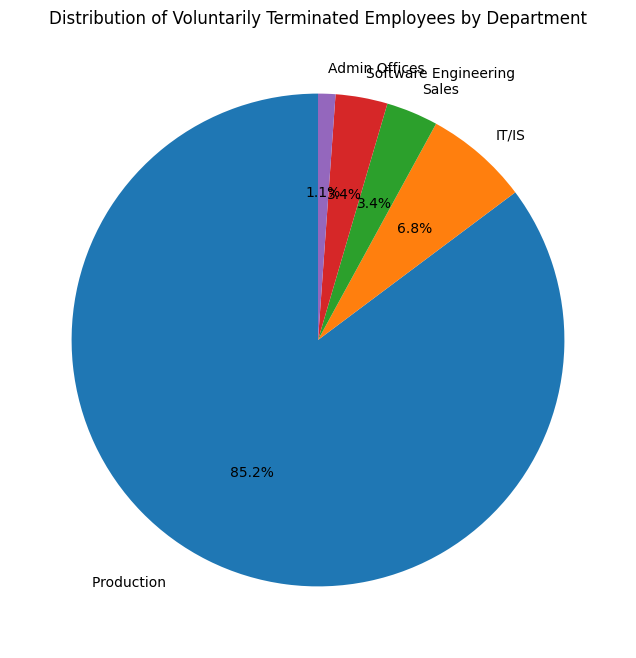

In [135]:
voluntarily_terminated_departments = employee[employee['EmploymentStatus']=='Voluntarily Terminated']['Department'].value_counts()
plt.figure(figsize=(8, 8))
voluntarily_terminated_departments.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Voluntarily Terminated Employees by Department')
plt.ylabel('')
plt.show()

In [136]:
voluntarily_terminated_departments

Production              75
IT/IS                    6
Sales                    3
Software Engineering     3
Admin Offices            1
Name: Department, dtype: int64

- 자발적 퇴사자 중 Production 부서가 가장 많음
- 위의 그래프에서 봤듯이 Production 부서는 자발적 퇴사자들의 평균 연봉이 재직자보다 낮으며, 부서별 평균 연봉도 매우 낮은 것을 확인할 수 있다.

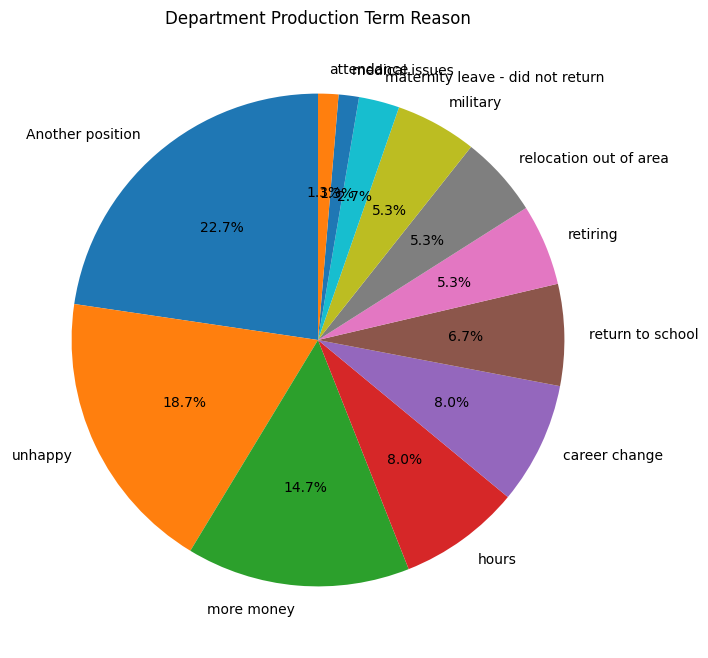

In [137]:
production = voluntary_resignation[voluntary_resignation['Department'] == 'Production       ']['TermReason'].value_counts()

plt.figure(figsize=(8, 8))
production.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Department Production Term Reason')
plt.ylabel('')
plt.show()

- 연봉을 더 받고 싶어서 나간 이유는 3위이다.
- 부서별 연봉이 낮다고 해서 퇴사한 것으로 보기 보단 다른 이유가 커보인다.
- 1순위인 직무 변환으로 옮긴 이유가 가장 크며, 이로 인해 회사생활이 힘들어 그만 둔 것으로도 볼 수 있을 것 같다. (unhappy가 2위)

#### 5-1-5-1 IT/IS, Sales, Software Engineering 부서는 연봉이 높은데도 불구하고 퇴직하는 이유는 무엇일까? (부서별 원인 파악)

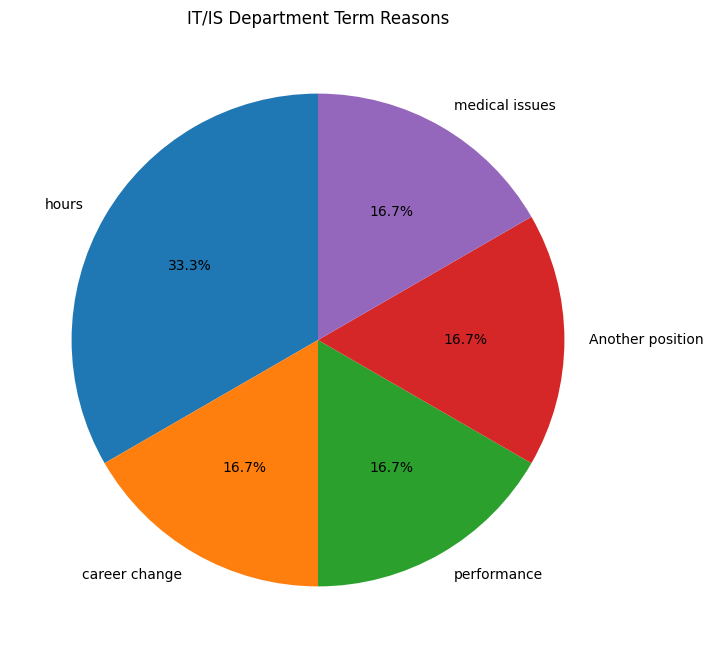

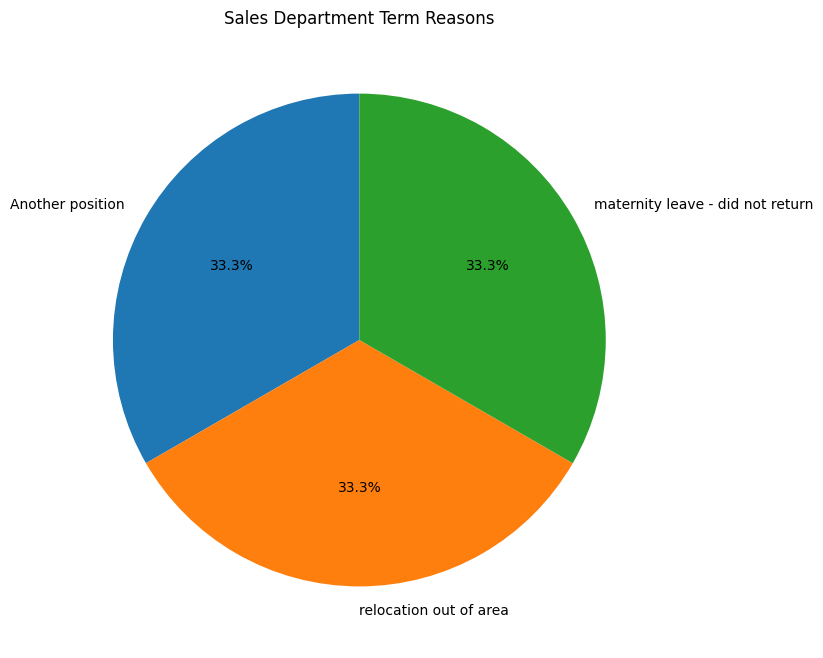

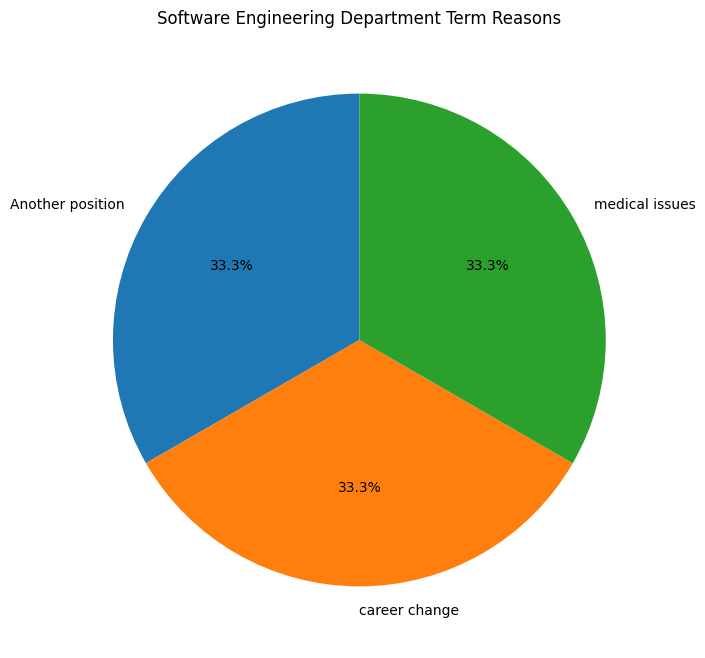

In [138]:
def pie_chart(df,department):
  fig, ax = plt.subplots(figsize=(8, 8))
  df.plot(kind='pie', autopct='%1.1f%%', startangle=90,ax=ax)
  ax.set_title(f'{department} Department Term Reasons')
  ax.set_ylabel('')
  plt.show()

dept = ['IT/IS','Sales','Software Engineering']
for d in dept :
  df = voluntary_resignation[voluntary_resignation['Department'] == d]['TermReason'].value_counts()
  pie_chart(df,d)

- IT/IS 부서의 경우 hours가 압도적이고 나머지 이유는 동일한 비율을 보인다. Hours가 나온 이유로 보아 부서 특성상 작업시간이 길어서 그런 것 같다.
- Sales Department 부서의 경우 Another position, relocation out of area, maternity leave- did not return 등 비율이 동일하게 나왔고, 퇴사 사유로 연봉과는 관련 없었다.
- Soft-Engineering의 경우도 Another position, career change, medical issues 등의 비율이 동일하게 나왔고 , 퇴사 사유로 연봉과는 관련 없었다.

### 5-1-6 결론

- 부서별 재직자와 자발적 퇴사자의 평균 연봉에는 차이가 있지만 그게 퇴사하는 원인은 아니다.
- 퇴사자가 가장 많은 부서인 Prodcution의 경우 연봉의 이유가 가장 큰 것이 아니었다. (이 부서로 옮겨져서 퇴사한 것일 수 있음)
- 재직자보다 평균 연봉이 높은 부서의 자발적 퇴사자의 경우도 연봉이 문제가 아니었다.
- 가설도 반만 맞고, 퇴사 원인에 연봉이 크게 영향을 끼친 것으로 보이지는 않는다.

In [139]:
# 나이와 연봉의 상관관계 분석

X = employee[['Age']]
y = employee['Salary']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.406
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.122
Time:                        03:52:42   Log-Likelihood:                -3406.4
No. Observations:                 295   AIC:                             6817.
Df Residuals:                     293   BIC:                             6824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.74e+04   7416.692      7.740      0.0

## 5-2 자발적 퇴사자의 연봉 분석

In [141]:
df = pd.read_csv('/content/drive/MyDrive/DATA/New_HR_dataset.csv')

In [142]:
resign = df[df['EmploymentStatus']=='Voluntarily Terminated']
resign['Age'].unique()

array([48, 35, 34, 50, 49, 46, 57, 53, 33, 59, 40, 42, 45, 72, 32, 68, 54,
       71, 51, 39, 47, 64, 37, 44, 55, 38, 41, 36, 60, 70, 58, 43, 65])

In [143]:
def age_bins(row):
  if 30 <= row <= 39 : return '30s'
  if 40 <= row <= 49 : return '40s'
  if 50 <= row <= 59 : return '50s'
  if 60 <= row <= 69 : return '60s'
  if 70 <= row <= 79 : return '70s'

resign['Age_Bins'] = df3['Age'].apply(age_bins)
resign['Age_Bins'].unique()

<ipython-input-143-4df88f3440e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resign['Age_Bins'] = df3['Age'].apply(age_bins)


array(['40s', '30s', '50s', '70s', '60s'], dtype=object)

<Axes: >

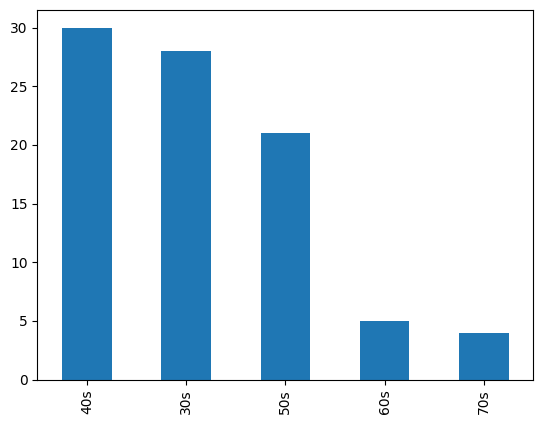

In [144]:
resign['Age_Bins'].value_counts().plot(kind='bar')

In [145]:
resign['Salary'].describe()

count        88.000000
mean      63949.204545
std       17012.771985
min       45115.000000
25%       53414.000000
50%       60512.000000
75%       68529.750000
max      148999.000000
Name: Salary, dtype: float64

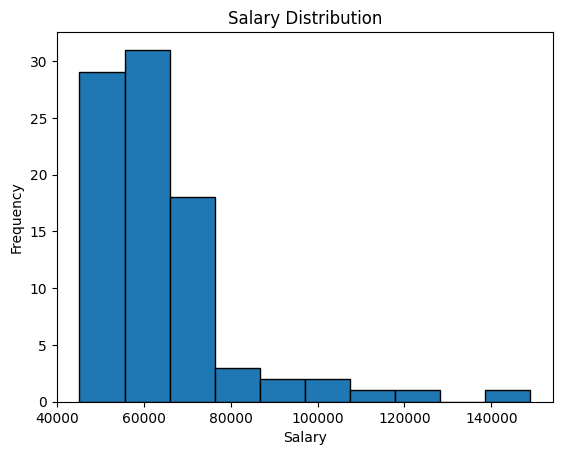

In [146]:
plt.hist(resign['Salary'], bins=10, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

- Salary는 40000 ~ 70000 달러 사이에 치중되어 있으며 특히 45000 ~ 55000 달러 사이의 값들이 가장 많다.

<ipython-input-147-c991d667184b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resign['Salary_Bins'] = df3['Salary'].apply(salary_bins)


<Axes: >

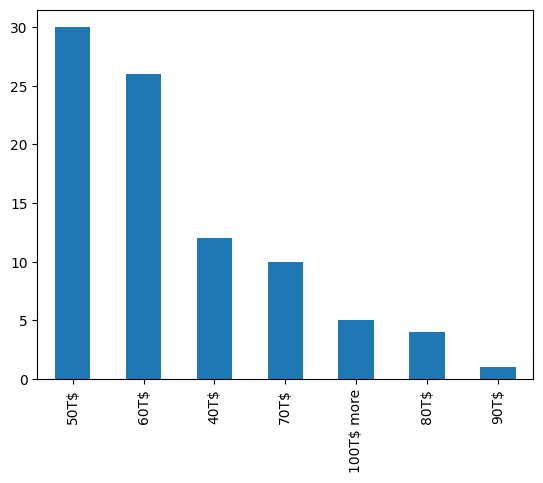

In [147]:
def salary_bins(row):
  if 40000 <= row < 50000 : return '40T$'
  if 50000 <= row < 60000 : return '50T$'
  if 60000 <= row < 70000 : return '60T$'
  if 70000 <= row < 80000 : return '70T$'
  if 80000 <= row < 90000 : return '80T$'
  if 90000 <= row < 100000 : return '90T$'
  if 100000 <= row < 150000 : return '100T$ more'

resign['Salary_Bins'] = df3['Salary'].apply(salary_bins)
resign['Salary_Bins'].value_counts().plot(kind='bar')

## 5-3 나이대별 연봉 비교

In [148]:
resign.groupby('Age_Bins')['Salary_Bins'].value_counts()

Age_Bins  Salary_Bins
30s       60T$           11
          50T$           10
          40T$            2
          70T$            2
          80T$            2
          90T$            1
40s       60T$           11
          50T$            8
          40T$            5
          100T$ more      3
          70T$            2
          80T$            1
50s       50T$            9
          40T$            4
          60T$            4
          70T$            3
          100T$ more      1
60s       100T$ more      1
          40T$            1
          50T$            1
          70T$            1
          80T$            1
70s       50T$            2
          70T$            2
Name: Salary_Bins, dtype: int64

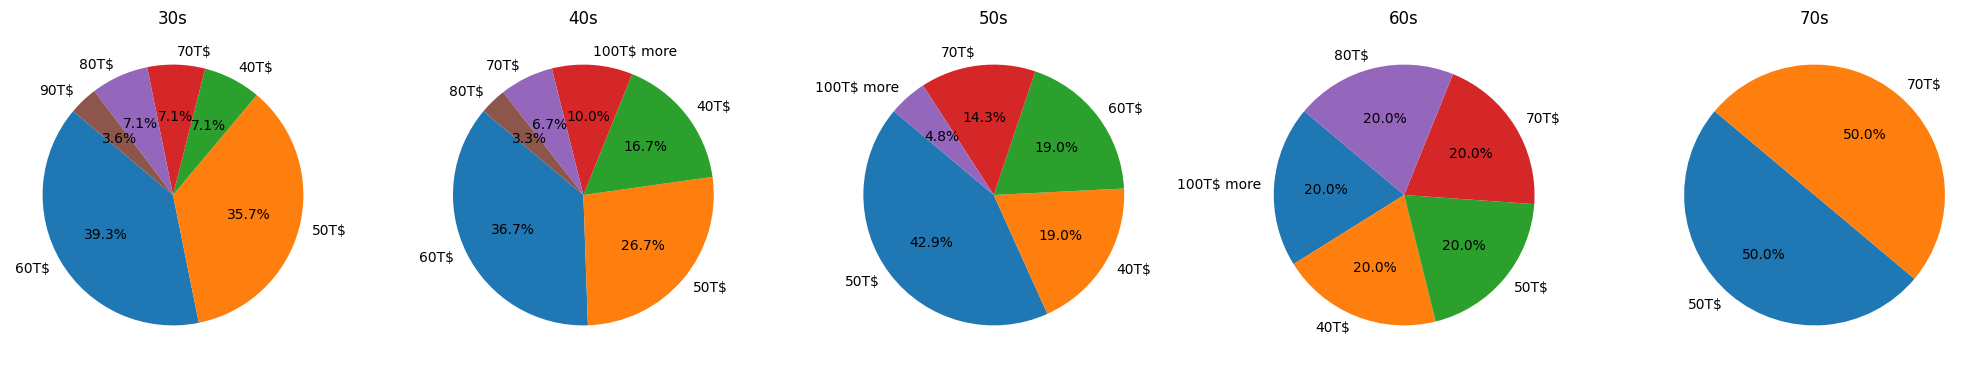

In [149]:
grouped = resign.groupby('Age_Bins')['Salary_Bins'].value_counts()

fig, axes = plt.subplots(1, len(grouped.index.levels[0]), figsize=(20, 10))

for i, (age_bin, values) in enumerate(grouped.groupby(level=0)):
    axes[i].pie(values, labels=values.index.get_level_values(1), autopct='%1.1f%%', startangle=140)
    axes[i].set_title(age_bin)

plt.tight_layout()
plt.show()

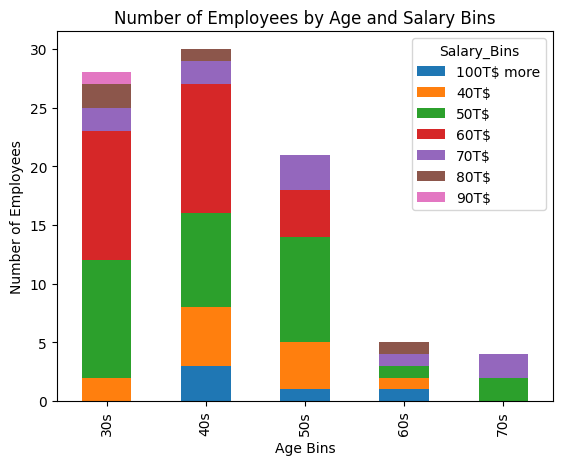

In [150]:
# 'Age_Bins' 별로 그룹화하고 'Salary_Bins'의 빈도수를 계산
grouped = resign.groupby(['Age_Bins', 'Salary_Bins']).size().unstack(fill_value=0)

# 막대 그래프로 시각화
grouped.plot(kind='bar', stacked=True)

# 그래프 제목 및 레이블 설정
plt.title('Number of Employees by Age and Salary Bins')
plt.xlabel('Age Bins')
plt.ylabel('Number of Employees')

# 그래프 표시
plt.show()


- 퇴사자가 가장 많은 3-50대의 경우 50000~60000달러 대의 연봉을 받는 것으로 보인다.
- 이는 30,40,50대에서 연봉의 변화가 많이 없는 것으로 보인다. (연차가 쌓여도 연봉 증가는 거의 없어보임)

## 5-4 통계성 검정

In [151]:
# 정규분포 검사
shapiro_test = stats.shapiro(resign['Salary'])
print("Shapiro-Wilk Test - Salary:")
print("Test statistic:", shapiro_test.statistic)
print("P-value:", shapiro_test.pvalue)
print()
shapiro_test = stats.shapiro(resign['Age'])
print("Shapiro-Wilk Test - Age:")
print("Test statistic:", shapiro_test.statistic)
print("P-value:", shapiro_test.pvalue)

Shapiro-Wilk Test - Salary:
Test statistic: 0.7963672876358032
P-value: 1.0976982656174528e-09

Shapiro-Wilk Test - Age:
Test statistic: 0.9211112260818481
P-value: 4.9344755097990856e-05


In [152]:
X = resign[['Age']]
y = resign['Salary']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6728
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.414
Time:                        03:57:16   Log-Likelihood:                -981.29
No. Observations:                  88   AIC:                             1967.
Df Residuals:                      86   BIC:                             1972.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.707e+04   8577.233      6.654      0.0

- Dependent Variable (종속 변수): Salary. 이 모델은 Age 변수를 사용하여 Salary를 예측하려고 시도

- R-squared: 0.008. 이 값은 모델이 데이터의 변동성 중 단지 0.8%만을 설명한다는 것을 의미. 이는 Age가 Salary를 설명하는 데 매우 제한적이라는 것을 나타낸다.

- Adj. R-squared: -0.004. 조정된 R-제곱 값은 표본 크기와 독립 변수의 수를 고려하여 R-제곱을 조정한 것. 이 값이 음수라는 것은 모델이 데이터를 설명하는 데 거의 기여하지 않음을 의미.

- F-statistic: 0.6728. 모델의 유의성을 검정하는데, p-value와 함께 해석

- Prob (F-statistic): 0.414. 이 p-value는 모델의 F-통계량이 유의미한지를 나타낸다. 일반적으로 0.05 이하의 값이 모델이 통계적으로 유의미하다는 것을 나타낸다. 여기서는 p-value가 0.414로, 모델이 통계적으로 유의미하지 않다는 것을 의미한다.

- 계수 (Coefficients):
  - const: Salary의 절편 값은 대략 57,070. 이것은 Age가 0일 때 예상되는 Salary의 값(비록 실제로 나이가 0인 사람의 급여를 예측하는 것은 논리적이지 않다).
  - Age: Age의 계수는 약 148.7348입니다. 이것은 나이가 한 살 증가할 때마다 급여가 평균적으로 148.73 달러 증가한다는 것을 의미. 그러나 이 계수의 p-value가 0.414로, Age 변수가 Salary에 미치는 영향이 통계적으로 유의미하지 않다는 것을 나타낸다.

- p-value (P>|t|): Age 변수의 p-value가 0.414로 유의 수준 0.05보다 크기 때문에, Age는 통계적으로 유의미한 예측 변수가 아니라고 결론지을 수 있다.

- Omnibus, Prob(Omnibus): 이 값들은 모델의 잔차들이 정규분포를 따르는지를 테스트합. Omnibus 통계량이 높고, Prob(Omnibus)의 p-value가 매우 낮기 때문에, 잔차들이 정규분포를 따르지 않을 가능성이 높다.

- **Skew (왜도)**와 Kurtosis (첨도): 이 값들은 잔차의 분포 형태를 나타낸다. 왜도는 분포의 비대칭성을, 첨도는 뾰족함 정도를 나타낸다. 왜도가 2.211로 분포가 오른쪽으로 긴 꼬리를 가지고, 첨도가 9.723으로 매우 뾰족한 분포를 가짐을 나타낸다.

- Durbin-Watson: 2.057. 이 값은 잔차가 독립적인지 여부를 평가하는데 사용되며, 2에 가까우므로 잔차 간에 자기상관이 없다는 것을 나타낸다.

- Jarque-Bera (JB), Prob(JB): 이 테스트는 잔차가 정규 분포를 따르는지 검정. JB의 p-value가 매우 낮으므로, 잔차가 정규 분포를 따르지 않을 가능성이 높다.

- Cond. No.: 223. 조건수(condition number)는 다중공선성(multicollinearity)의 정도를 나타내는 지표. 일반적으로 30을 초과하면 다중공선성을 의심할 수 있으며, 1000을 초과하면 심각한 문제가 있을 수 있다. 이 경우, 다중공선성은 문제가 되지 않는 것으로 보인다.









이 선형 회귀 모델은 'Age' 변수가 'Salary'를 예측하는 데 통계적으로 유의미한 영향을 주지 않는다는 것을 나타낸다. R-squared 값이 매우 낮고, 'Age'의 계수에 대한 p-value가 높으며, 모델의 F-statistic p-value도 0.05보다 훨씬 높다. 이는 'Age'가 'Salary'에 대한 변동성을 거의 설명하지 못함을 의미한다.

또한, 잔차 검정 결과 잔차가 정규 분포를 따르지 않을 가능성이 높은 것으로 나타나고 있다. 이는 모델의 가정 중 하나가 위반되었을 가능성을 시사하며, 모델의 예측력이나 신뢰성에 영향을 줄 수 있다.

이 모델을 바탕으로 'Age'만을 사용하여 'Salary'를 예측하는 것은 적절하지 않을 수 있다. 'Salary'를 더 잘 설명할 수 있는 다른 변수를 모델에 포함시키거나, 다른 종류의 통계 모델을 고려해보는 것이 필요하다.

### 5-5 결론

- 연차가 쌓인다고 해서 연봉(급여)이 올라가는 것으로 볼 수 없다. (명확한 선형관계가 없음)
- Age와 Salary사이에 관계가 명확하지 않다.
- Age가 Salary를 결정하는데 주요 요인이 아닐 수 있다.
- 앞서 퇴사자 나이대별 급여 그래프에서 30,40,50,60별 급여의 차이는 별로 나지 않았다.

# 6. 부서 선호도가 직원 퇴사율에 끼치는 영향


## 6-1 선호하지 않는 직무에 있을 시 퇴직할 경우가 더 높을 것이다.

In [153]:
total = df['Department'].value_counts()
termd = df[df['EmploymentStatus']!='Active']['Department'].value_counts()
termd_rate = (termd/total)*100
termd_rate = termd_rate.sort_values(ascending=False)
print(termd_rate)

Production              39.712919
Software Engineering    36.363636
Admin Offices           22.222222
IT/IS                   20.000000
Sales                   16.129032
Executive Office              NaN
Name: Department, dtype: float64


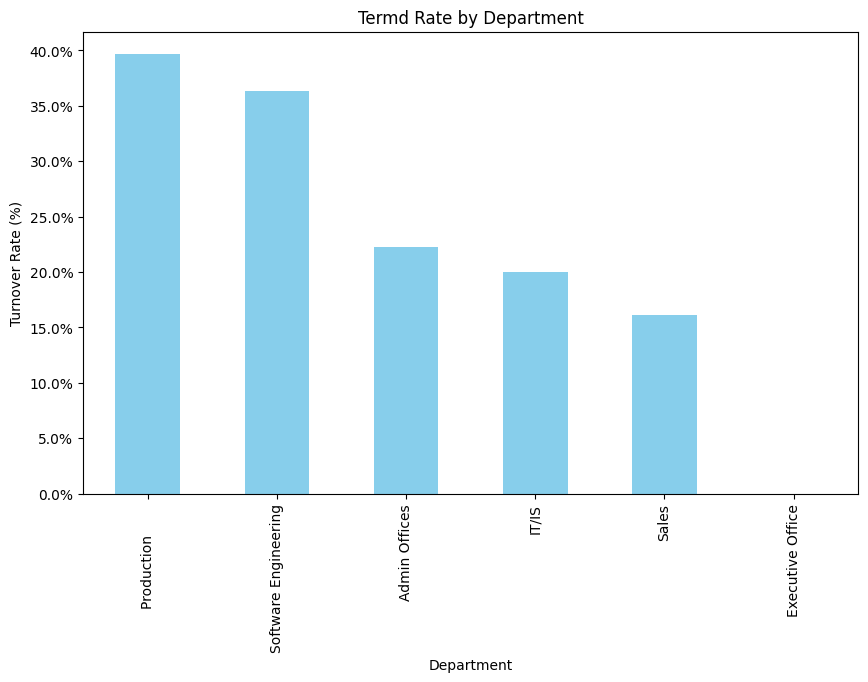

In [154]:
plt.figure(figsize=(10, 6))
termd_rate.plot(kind='bar', color='skyblue')
plt.title('Termd Rate by Department')
plt.xlabel('Department')
plt.ylabel('Turnover Rate (%)')

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
plt.show()

- Production, Software Engineering 부서 비율이 가장 높음

## 6-2 통계검정

In [155]:
contingency_table = pd.crosstab(df['EmploymentStatus'],df['Department'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared: 20.91836768169936
P-value: 0.0216700397694996
Degrees of Freedom: 10
Expected Frequencies:
[[5.99035370e+00 6.65594855e-01 3.32797428e+01 1.39109325e+02
  2.06334405e+01 7.32154341e+00]
 [4.63022508e-01 5.14469453e-02 2.57234727e+00 1.07524116e+01
  1.59485531e+00 5.65916399e-01]
 [2.54662379e+00 2.82958199e-01 1.41479100e+01 5.91382637e+01
  8.77170418e+00 3.11254019e+00]]


- H0(귀무가설) : 선호하지 않는 부서에 있을 시 퇴직할 경우가 거의 없을 것이다.
- H1(대립가설) : 선호하지 않는 부서에 있을 시 퇴직할 경우가 더 높을 것이다.
- p-value가 유의수준(0.05)보다 작다. 귀무가설 기각
- 가설 검정 성공 : 선호하지 않는 부서에 있을 시 퇴직할 경우가 더 높을 것이다.
- 부서와 재직상태 칼럼은 연관이 있다.

## 6-3 부서 선호하지 않는 이유분석


### 6-3-1 매니저


### 6-3-1-1 시각화

<Axes: >

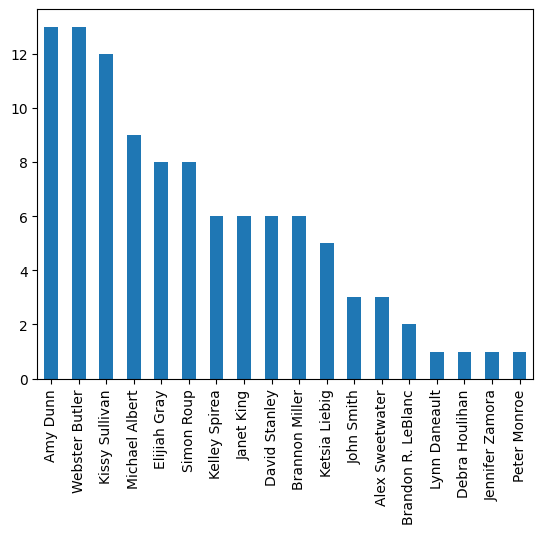

In [156]:
filter1 = df['EmploymentStatus'] != 'Active'
filter2 = df['Department'] == 'Production'
filter3 = df['Department'] == 'Software Engineering'

df[filter1]['ManagerName'].value_counts().plot(kind='bar')

- Amy Dunn, Webster Butler, Kissy Sullivan, Michael Albert, Elijiah Gray, Simon Roup이 매니저인 경우 그만둔 직원들이 많다.

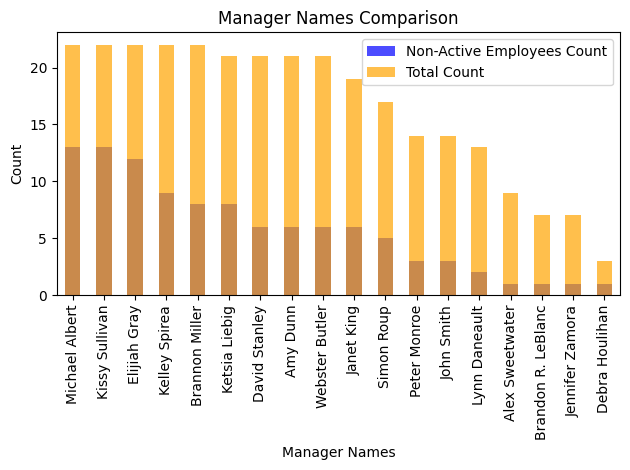

In [157]:
employee_leave_manager = df[filter1]['ManagerName'].unique()

manager_df1 = df[filter1]['ManagerName'].value_counts()
manager_df1.plot(kind='bar', color='blue', alpha=0.7, label='Non-Active Employees Count')

counts = df['ManagerName'].value_counts()
manager_df2 = counts[counts.index.isin(employee_leave_manager)]
manager_df2.plot(kind='bar', color='orange', alpha=0.7, label='Total Count')

plt.title('Manager Names Comparison')
plt.xlabel('Manager Names')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

- 앞에서 매니저가 Amy Dunn, Webster Butler, Kissy Sullivan, Michael Albert, Elijiah Gray, Simon Roup인 사람들이 퇴사한 사람들이 많았는데
- 매니저 당 책임지는 직원수를 보면 Michael Albert, Kissy Sullivan, Elijiah Gray의 경우 담당하는 직원수가 많다. 이들은 담당하는 직원수가 많아서 직원 개개인을 책임지는데 부족해보인다.

### 6-3-1-2 통계검정

In [158]:
filtered_df = df[df['ManagerName'].isin(employee_leave_manager)]
filtered_df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0              1       5            4                       0   62506  ...   
1              5       3            3                       0  104437  ...   
2              5       5            3                       0   64955  ...   
3              1       5            3                       0   64991  ...   
4              5       5            3                       0   50825  ...   
..           ...     ...          ...                     ...     ...  ...   
306            1       5            3                       0   65893  ...   
307            5       5            1                       0   48513  ...   
308            1       3            4                       0  220450  ...   
309            1       3            3                       0   89292  ...   
310            1       5            3                       0   45046  ...   

     PerformanceScore  EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0             Exceeds              4.60               5                    0   
1         Fully Meets              4.96               3                    6   
2         Fully Meets              3.02               3                    0   
3         Fully Meets              4.84               5                    0   
4         Fully Meets              5.00               4                    0   
..                ...               ...             ...                  ...   
306       Fully Meets              4.07               4                    0   
307               PIP              3.20               2                    0   
308           Exceeds              4.60               5                    6   
309       Fully Meets              5.00               3                    5   
310       Fully Meets              4.50               5                    0   

     LastPerformanceReview_Date DaysLateLast30 Absences Age    WD  \
0                     1/17/2019              0        1  40     0   
1                     2/24/2016              0       17  48   444   
2                     5/15/2012              0        3  35   447   
3                      1/3/2019              0       15  35     0   
4                      2/1/2016              0        2  34  1884   
..                          ...            ...      ...  ..   ...   
306                   2/28/2019              0       13  38     0   
307                    9/2/2015              5        4  41  2583   
308                   2/21/2019              0       16  44     0   
309                    2/1/2019              0       11  44     0   
310                   1/30/2019              0        2  45     0   

    LastAssessedDate  
0                  0  
1                113  
2                132  
3                  0  
4                218  
..               ...  
306                0  
307               27  
308                0  
309                0  
310                0  

[297 rows x 39 columns]

In [159]:
contingency_table = pd.crosstab(filtered_df['EmploymentStatus'],filtered_df['Department'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared: 17.0781986923976
P-value: 0.02930502568361023
Degrees of Freedom: 8
Expected Frequencies:
[[  5.1986532   24.69360269 135.81481481  20.14478114   7.14814815]
 [  0.43097643   2.04713805  11.25925926   1.67003367   0.59259259]
 [  2.37037037  11.25925926  61.92592593   9.18518519   3.25925926]]


- H0(귀무가설) : 담당 매니저는 퇴사원인에 영향을 끼치지 않을 것이다.
- H1(대립가설) : 담당 매니저는 퇴사원인에 영향을 끼칠 것이다.
- p-value, 유의수준(0.05)보다 적음, 귀무가설 기각
- 담당 매니저는 퇴사원인에 영향을 끼친다.

<Axes: ylabel='Department'>

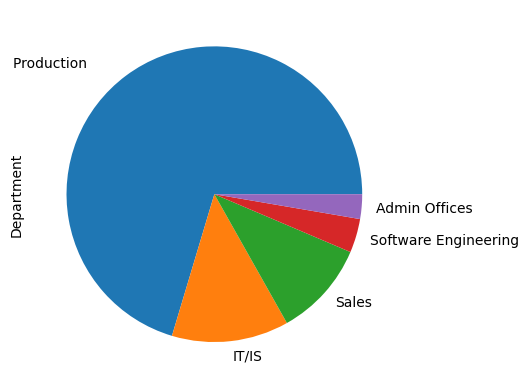

In [160]:
df[df['ManagerName'].isin(employee_leave_manager)]['Department'].value_counts().plot(kind='pie')

- 퇴사자가 많은 매니저들이 속한 부서도 마찬가지로 Production이 압도적이다.
- Production 부서인 경우 퇴사 원인에 "매니저"도 영향을 많이 끼친다.

### 6-3-2 프로젝트 참여수


#### 6-3-2-1 시각화

In [161]:
filter = df['EmploymentStatus'] != 'Active'
total = df.groupby('Department')['SpecialProjectsCount'].value_counts()
total_filter = df[filter].groupby('Department')['SpecialProjectsCount'].value_counts()
print(total)
print()
print(total_filter)

Department            SpecialProjectsCount
Admin Offices         4                         3
                      5                         2
                      0                         1
                      2                         1
                      3                         1
                      6                         1
Executive Office      0                         1
IT/IS                 6                        18
                      5                        16
                      7                        12
                      4                         2
                      8                         2
Production            0                       207
                      1                         1
                      3                         1
Sales                 0                        31
Software Engineering  4                         4
                      5                         3
                      6                         2
       

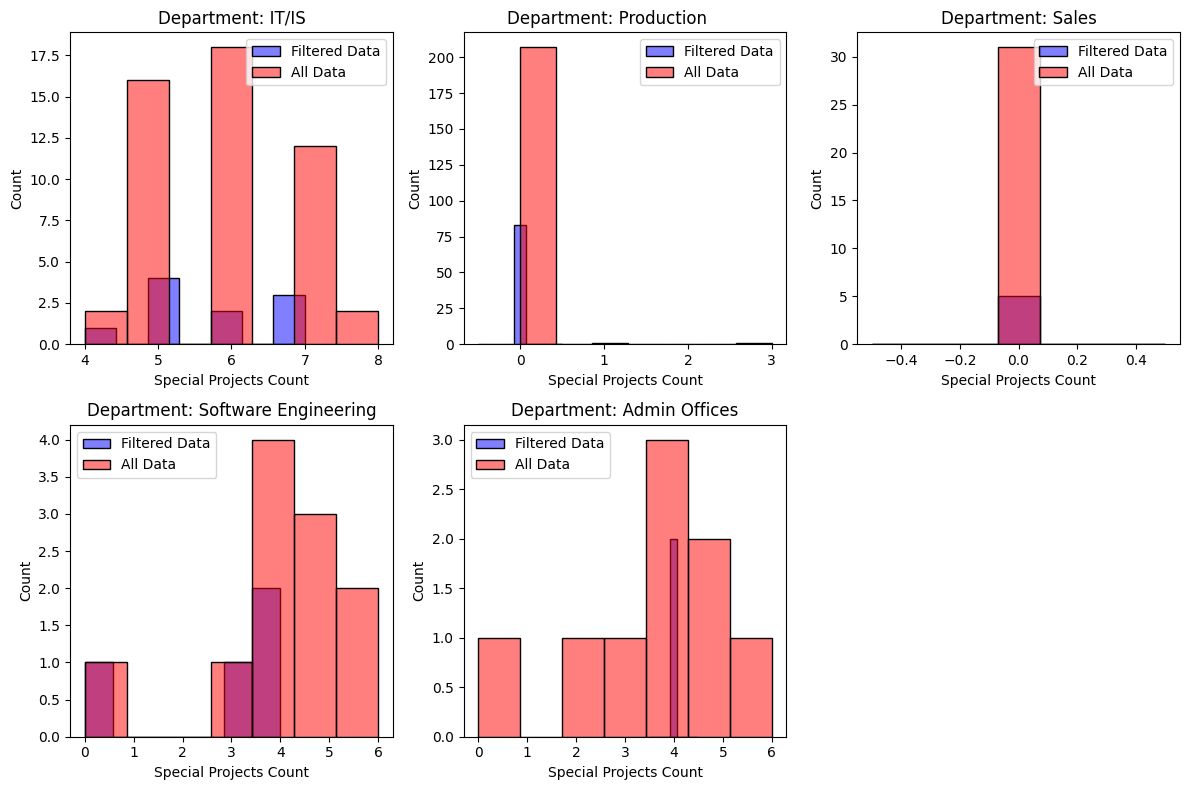

In [162]:
filter = df['EmploymentStatus'] != 'Active'
filtered_data = df[filter]

departments = filtered_data['Department'].unique()

plt.figure(figsize=(12, 8))

for i, department in enumerate(departments, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=filtered_data[filtered_data['Department'] == department],
                 x='SpecialProjectsCount', bins=7, color='blue', alpha=0.5, label='Filtered Data')
    sns.histplot(data=df[df['Department'] == department],
                 x='SpecialProjectsCount', bins=7, color='red', alpha=0.5, label='All Data')
    plt.title(f'Department: {department}')
    plt.xlabel('Special Projects Count')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

#### 6-3-2-2 통계검정

In [163]:
data = df[['Department','EmploymentStatus','SpecialProjectsCount']]
cross_tab = pd.crosstab(index=data['Department'], columns=data['EmploymentStatus'], values=data['SpecialProjectsCount'], aggfunc='count')

chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared: nan
P-value: nan
Degrees of Freedom: 10
Expected Frequencies:
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


- 프로젝트 참여수 0이 너무 많아서 결과가 안나오거나, 매우 작은 값으로 인해 실패했을 가능성이 있다.

In [164]:
data = df[['SpecialProjectsCount','EmploymentStatus']]
cross_tab = pd.crosstab(index=data['EmploymentStatus'], columns=data['SpecialProjectsCount'])

chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared: 32.01926326351089
P-value: 0.009942207617639054
Degrees of Freedom: 16
Expected Frequencies:
[[1.60408360e+02 6.65594855e-01 6.65594855e-01 1.99678457e+00
  5.99035370e+00 1.39774920e+01 1.39774920e+01 7.98713826e+00
  1.33118971e+00]
 [1.23987138e+01 5.14469453e-02 5.14469453e-02 1.54340836e-01
  4.63022508e-01 1.08038585e+00 1.08038585e+00 6.17363344e-01
  1.02893891e-01]
 [6.81929260e+01 2.82958199e-01 2.82958199e-01 8.48874598e-01
  2.54662379e+00 5.94212219e+00 5.94212219e+00 3.39549839e+00
  5.65916399e-01]]


- H0(귀무가설) : 프로젝트 참여수가 퇴사하는데 영향을 끼치지 않았을 것이다.
- H1(대립가설) : 프로젝트 참여수가 퇴사하는데 영향을 끼쳤을 것이다.
- p-value, 유의수준(0.05)보다 작은 값으로 귀무가설을 기각한다.
- 프로젝트 참여수가 퇴사하는데 영향을 끼쳤다.
- 퇴사를 가장 많이 하는 부서인 Production의 경우 거의 프로젝트에 참여한 적이 없는 것으로 나타난다.

**원인**

In [165]:
filtered_data.groupby('Department')['TermReason'].value_counts()

Department            TermReason                      
Admin Offices         career change                        1
                      no-call, no-show                     1
IT/IS                 hours                                2
                      no-call, no-show                     2
                      performance                          2
                      Another position                     1
                      Learned that he is a gangster        1
                      career change                        1
                      medical issues                       1
Production            Another position                    17
                      unhappy                             14
                      more money                          11
                      career change                        6
                      hours                                6
                      attendance                           5
                      return t

## 6-4 직무 선호하지 않는 이유 분석


### 6-4-1 가설 : 선호하지 않는 직무에 있을 시 퇴직할 경우가 더 높을 것이다.

#### 6-4-1-1 직무별 퇴사비율

In [166]:
df['Position'] = df['Position'].replace('Data Analyst ', 'Data Analyst')
position_list = df[df['EmploymentStatus']!='Active']['Position'].unique()

total_pos = df['Position'].value_counts()
filter_pos = total_pos[total_pos.index.isin(position_list)]

termd_pos = df[df['EmploymentStatus']!='Active']['Position'].value_counts()
termd_rate_pos = (termd_pos/filter_pos)*100
termd_rate_pos = termd_rate_pos.sort_values(ascending=False)
print(termd_rate_pos)

Enterprise Architect        100.000000
Principal Data Architect    100.000000
Administrative Assistant     66.666667
Database Administrator       60.000000
IT Manager - DB              50.000000
Sr. DBA                      50.000000
Production Technician II     45.614035
Software Engineer            40.000000
Production Technician I      37.956204
Production Manager           35.714286
Sales Manager                33.333333
Data Analyst                 25.000000
Network Engineer             20.000000
Area Sales Manager           14.814815
Name: Position, dtype: float64


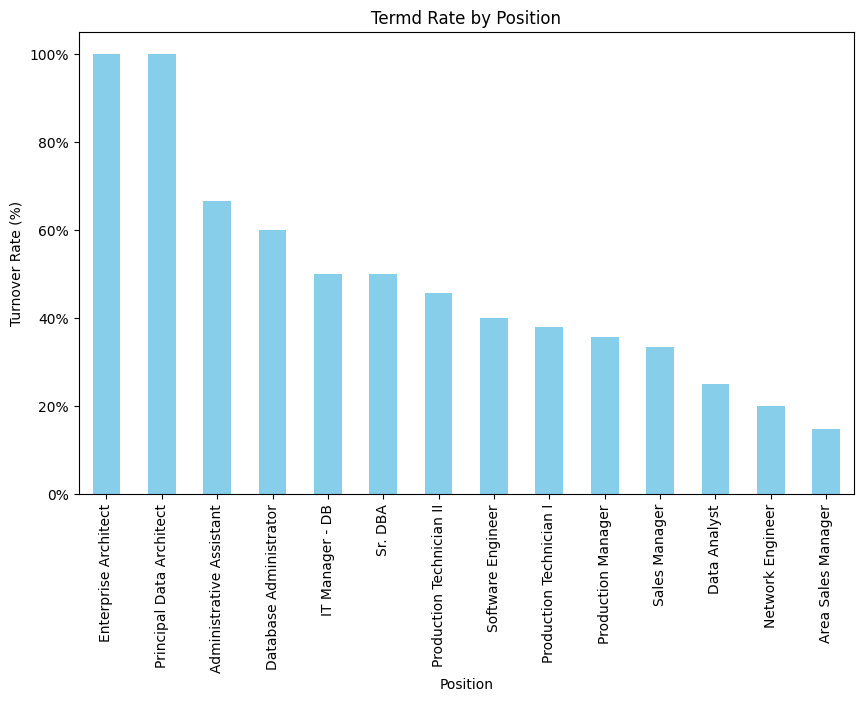

In [167]:
plt.figure(figsize=(10, 6))
termd_rate_pos.plot(kind='bar', color='skyblue')
plt.title('Termd Rate by Position')
plt.xlabel('Position')
plt.ylabel('Turnover Rate (%)')

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
plt.show()

- Enterprise Architect, Principal Data Architect은 퇴사 확률이 100%로 나왔다.
- IT/IS(+Data) 퇴사 확률이 높았고, Production Technician 2, Productino Technician 1도 퇴사율이 35% 이상 나왔다.
- IT/IS 부서의 퇴사 비율은 높지 않지만, IT/IS에 있는 직무는 퇴사율이 높은 것을 보인다.
- 앞서 부서별 퇴사율과 그 부서에 해당하는 직무별 퇴사율 비슷한 것 같다.

**퇴사율 100% 나온 직무의 직원, 연봉, 나이, 담당 매니저 확인**

In [168]:
filter1 = df['EmploymentStatus'] != 'Active'
filter2 = df['Position'] == 'Enterprise Architect'
filter3 = df['Position'] == 'Principal Data Architect'

people1 = df[filter1 & filter2][['Employee_Name','Age','Department','ManagerName','ManagerID']]
people2 = df[filter1 & filter3][['Employee_Name','Age','Department','ManagerName','ManagerID']]

print(people1)
print(people2)

   Employee_Name  Age Department ManagerName  ManagerID
25  Booth, Frank   59      IT/IS  Simon Roup        4.0
        Employee_Name  Age Department ManagerName  ManagerID
239  Roehrich, Bianca   50      IT/IS  Simon Roup        4.0


- 둘다 50대이고 같은 매니저, 같은 부서에 속해있다.

#### 6-4-1-1 직무별 퇴사 원인

In [169]:
filtered_data.groupby('Position')['TermReason'].value_counts()

Position                  TermReason                      
Administrative Assistant  career change                        1
                          no-call, no-show                     1
Area Sales Manager        Another position                     1
                          Fatal attraction                     1
                          attendance                           1
                          relocation out of area               1
Data Analyst              performance                          1
Data Analyst              hours                                1
Database Administrator    no-call, no-show                     2
                          performance                          1
Enterprise Architect      Learned that he is a gangster        1
IT Manager - DB           hours                                1
Network Engineer          medical issues                       1
Principal Data Architect  Another position                     1
Production Manager        Anoth

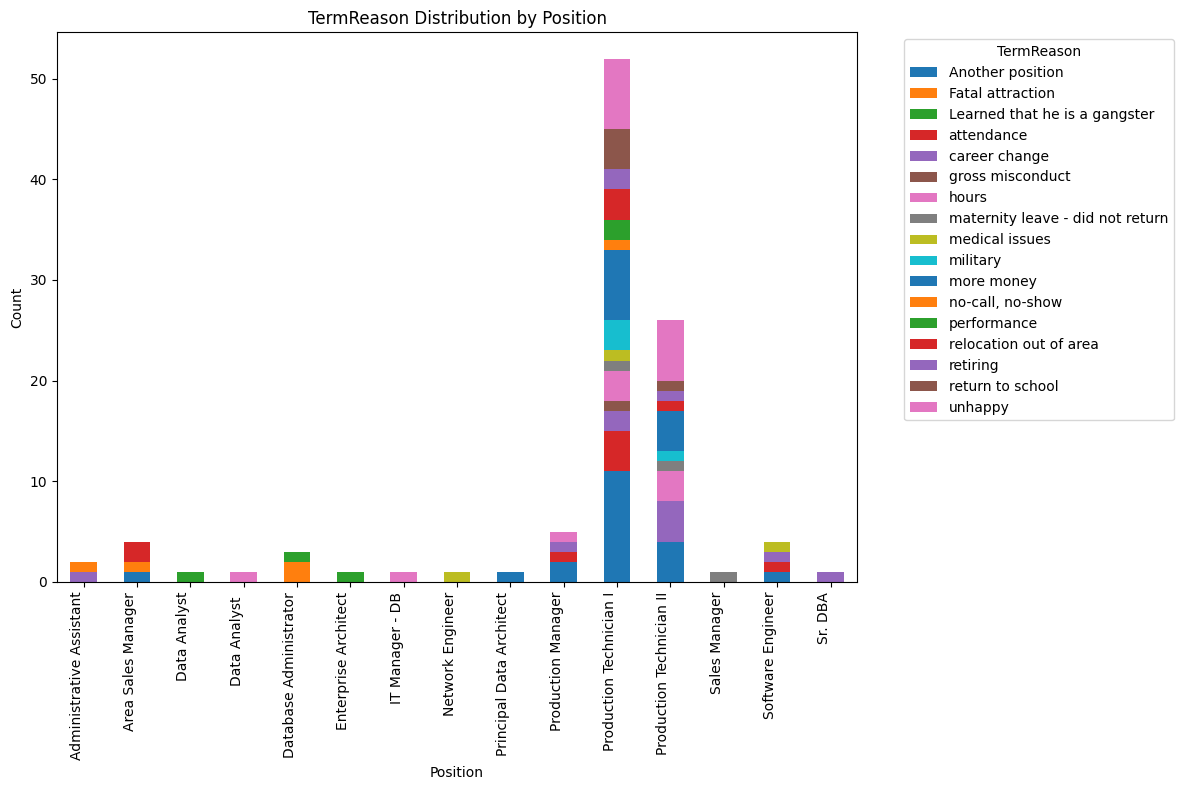

In [170]:
position_term_reason_counts = filtered_data.groupby(['Position', 'TermReason']).size().unstack(fill_value=0)

position_term_reason_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('TermReason Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='TermReason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 6-4-2 통계검정

In [171]:
data = df[['Position','EmploymentStatus']]
cross_tab = pd.crosstab(index=data['EmploymentStatus'], columns=data['Position'])

chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared: 95.82471577023564
P-value: 0.0022601615471363463
Degrees of Freedom: 60
Expected Frequencies:
[[1.99678457e+00 1.99678457e+00 1.79710611e+01 2.66237942e+00
  6.65594855e-01 6.65594855e-01 5.32475884e+00 6.65594855e-01
  3.32797428e+00 6.65594855e-01 6.65594855e-01 6.65594855e-01
  6.65594855e-01 1.33118971e+00 6.65594855e-01 6.65594855e-01
  5.32475884e+00 3.32797428e+00 6.65594855e-01 6.65594855e-01
  9.31832797e+00 9.11864952e+01 3.79389068e+01 1.99678457e+00
  1.99678457e+00 6.65594855e-01 6.65594855e+00 6.65594855e-01
  1.33118971e+00 1.33118971e+00 3.32797428e+00]
 [1.54340836e-01 1.54340836e-01 1.38906752e+00 2.05787781e-01
  5.14469453e-02 5.14469453e-02 4.11575563e-01 5.14469453e-02
  2.57234727e-01 5.14469453e-02 5.14469453e-02 5.14469453e-02
  5.14469453e-02 1.02893891e-01 5.14469453e-02 5.14469453e-02
  4.11575563e-01 2.57234727e-01 5.14469453e-02 5.14469453e-02
  7.20257235e-01 7.04823151e+00 2.93247588e+00 1.54340836e-01
  1.54340836e-01 5.14469453e-02 5.14469

- H0(귀무가설) : 직무가 재직상태에 영향을 끼쳤을 것이다.
- H1(대립가설) : 직무가 재직상태에 영향을 끼쳤을 것이다.
- p-value, 유의수준(0.05)보다 작음. 귀무가설 기각
- 직무가 재직상태에 영향을 끼쳤다.

# 7. 근무시간의 유연성과 퇴사율 사이의 관계

## 7-1 가설 : 회사에서 멀리사는 경우, 근처에서 사는 경우보다 퇴사율이 더 높을 것이다.


In [172]:
df['State'].value_counts()

MA    276
CT      6
TX      3
VT      2
UT      1
AZ      1
ND      1
OR      1
MT      1
NV      1
ID      1
KY      1
NC      1
FL      1
GA      1
CO      1
NY      1
PA      1
RI      1
NH      1
TN      1
IN      1
OH      1
CA      1
WA      1
AL      1
VA      1
ME      1
Name: State, dtype: int64

In [173]:
filter1 = df['EmploymentStatus'] == 'Active'
filter2 = df['EmploymentStatus'] == 'Voluntarily Terminated'

active_state = df[filter1]['State'].value_counts()
voluntary_state = df[filter2]['State'].value_counts()
Termed_state = df[~filter1]['State'].value_counts()

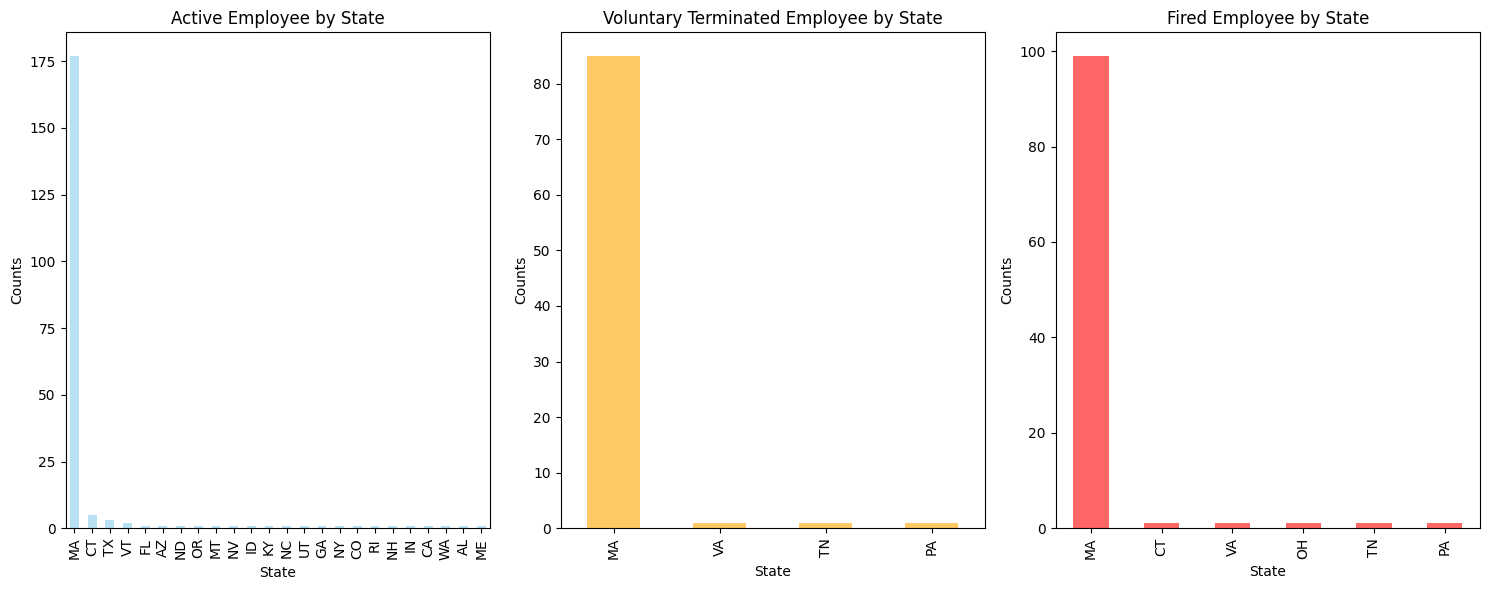

In [174]:
def draw_bar_chart(data, color, title, ax):
    data.plot(kind='bar', color=color, alpha=0.6, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('State')
    ax.set_ylabel('Counts')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

draw_bar_chart(active_state, 'skyblue', 'Active Employee by State', axes[0])
draw_bar_chart(voluntary_state, 'orange', 'Voluntary Terminated Employee by State', axes[1])
draw_bar_chart(Termed_state, 'red', 'Fired Employee by State', axes[2])

plt.tight_layout()
plt.show()

- 재직중인 직원과 자발적 퇴사자 둘다 MA 지역에 많이 살고 있고, 그 외 지역도 소수가 살고 있음
- 그래프로 보아 직원이 살고 있는 State와 퇴사는 관련이 없어보인다.
- 퇴사원인들을 살폈을 때도 주거지에 대한 원인은 없었다.

## 7-2 통계검정

In [175]:
from scipy.stats import chi2_contingency

data = df[['State','EmploymentStatus']]
cross_tab = pd.crosstab(index=data['EmploymentStatus'], columns=data['State'])

chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared: 42.95752698694569
P-value: 0.8598656822619374
Degrees of Freedom: 54
Expected Frequencies:
[[6.65594855e-01 6.65594855e-01 6.65594855e-01 6.65594855e-01
  3.99356913e+00 6.65594855e-01 6.65594855e-01 6.65594855e-01
  6.65594855e-01 6.65594855e-01 1.83704180e+02 6.65594855e-01
  6.65594855e-01 6.65594855e-01 6.65594855e-01 6.65594855e-01
  6.65594855e-01 6.65594855e-01 6.65594855e-01 6.65594855e-01
  6.65594855e-01 6.65594855e-01 6.65594855e-01 1.99678457e+00
  6.65594855e-01 6.65594855e-01 1.33118971e+00 6.65594855e-01]
 [5.14469453e-02 5.14469453e-02 5.14469453e-02 5.14469453e-02
  3.08681672e-01 5.14469453e-02 5.14469453e-02 5.14469453e-02
  5.14469453e-02 5.14469453e-02 1.41993569e+01 5.14469453e-02
  5.14469453e-02 5.14469453e-02 5.14469453e-02 5.14469453e-02
  5.14469453e-02 5.14469453e-02 5.14469453e-02 5.14469453e-02
  5.14469453e-02 5.14469453e-02 5.14469453e-02 1.54340836e-01
  5.14469453e-02 5.14469453e-02 1.02893891e-01 5.14469453e-02]
 [2.82958199e-01 2.8295819

- H0(귀무가설) : 직원의 거주지(State)는 퇴사원인에 영향을 미치지 않는다.
- H1(대립가설) : 직원의 거주지(State)는 퇴사원인에 영향을 미쳤을 것이다.
- p-value, 유의수준(0.05)보다 크다
- 귀무가설 기각 못함
- 따라서 직원의 거주지(State)는 퇴사원인에 영향을 끼치지 않는다.